# CHAPTER 1: DEFINITIONS OF THE PROBLEM STATEMENT AND EXPLORATORY DATA ANALYSIS
___

## **Introduction to `Delhivery`**

DELHIVERY WIKIPEDIA:

> `Delhivery` (stylized as DELHIVErY) is an `Indian logistics and supply chain company`, based in `Gurugram`. It was founded in `2011` by `Sahil Barua, Mohit Tandon, Bhavesh Manglani, Suraj Saharan, and Kapil Bharati`. 

> The company has over `85 fulfillment centers`, `24 automated sort centers`, `70 hubs`, `7,500+ partner centers`, and `3,000+ direct delivery centers`, as of 2021. 

> About `two-thirds` of its revenue comes from providing `third-party logistics and delivery services to e-commerce companies`.

> `Delhivery` is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the `operating system for commerce`, through a combination of `world-class infrastructure`, `logistics operations` of the highest quality, and `cutting-edge engineering and technology` capabilities.

## **Problem Definition and Objectives** 

> The Data team of `Delhivery` builds intelligence and capabilities. Using this data analysis,  Data team wants to widen the gap between the `quality`, `efficiency`, and `profitability` of their business versus their `competitors`.

> The company wants to understand and process the data coming out of `data engineering pipelines`:

* `Clean, sanitize and manipulate` data to get `useful features` out of raw fields

* Make sense out of the raw data and help the data science team to build `forecasting models` on it

## **Dataset**

### Importing the required Libraries

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import bernoulli,binom,norm,expon,geom,poisson,lognorm,boxcox
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind,ttest_rel,f_oneway,chi2_contingency,kruskal
import math
import io
import warnings
import re
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
pd.set_option("display.max_columns",100)

### Importing the dataset `delhivery_data.csv`

In [114]:
delhivery = pd.read_csv("delhivery_data.csv")

> The company collected data from `data engineering pipelines`. It is `RAW Data`

In [115]:
delhivery.head()

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time                 od_end_time  \
0  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
1  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
2  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
3  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
4  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   

   start_scan_to_end_scan  is_cutoff  cutoff_factor  \
0                    86.0       True              9   
1                    86.0       True             18   
2                    86.0       True             27   
3                    86.0       True             36   
4                    86.0      False             39   

             cutoff_timestamp  actual_distance_to_destination  actual_time  \
0         2018-09-20 04:27:55                       10.435660         14.0   
1         2018-09-20 04:17:55                       18.936842         24.0   
2  2018-09-20 04:01:19.505586                       27.637279         40.0   
3         2018-09-20 03:39:57                       36.118028         62.0   
4         2018-09-20 03:33:55                       39.386040         68.0   

   osrm_time  osrm_distance    factor  segment_actual_time  segment_osrm_time  \
0       11.0        11.9653  1.272727                 14.0               11.0   
1       20.0        21.7243  1.200000                 10.0                9.0   
2       28.0        32.5395  1.428571                 16.0                7.0   
3       40.0        45.5620  1.550000                 21.0               12.0   
4       44.0        54.2181  1.545455                  6.0                5.0   

   segment_osrm_distance  segment_factor  
0                11.9653        1.272727  
1                 9.7590        1.111111  
2                10.8152        2.285714  
3                13.0224        1.750000  
4                 3.9153        1.200000

### Details regarding each column in dataset

|column names|Regarding information of column|
|--------|-----------------------|
|data|tells whether the data is testing or training data|
|trip_creation_time|Timestamp of trip creation|
|route_schedule_uuid|Unique Id for a particular route schedule|
|route_type|Transportation Type|
|1. route_type: FTL|Full Truck Load-FTL Shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way|
|2. route_type: Carting|Handling system consisting of small vehicles(carts)|
|trip_uuid|Unique ID given to a particular trip (A trip may include different source and destination centers)|
|source_center|Source ID of trip origin|
|source_name|Source Name of trip origin|
|destination_center|Destination ID|
|destination_name|Destination Name|
|od_start_time|Trip start time|
|od_end_time|Trip end time|
|start_scan_to_end_scan|Time taken to deliver from source to destination|
|is_cutoff|Unknown field|
|cutoff_factor|Unknown field|
|cutoff_timestamp|Unknown field|
|actual_distance_to_destination|Distance in Kms between source and destination ware house|
|actual_time|Actual time taken to complete the delivery(Cumulative)|
|osrm_time|An open-source routing engine time calculator which computes the shortest path between paths in a given map (Includes usual traffic, distance through major and minor roads)  and gives the time(Cumulative)|
|osrm_distance|An open source routing engine which computes the shortest path between points in a given map(Includes usual traffic, distance through major and minor roads)(Cumulative)|
|factor|Unknown field (actual_time/osrm_time)|
|segment_actual_time|This is a segment time. Time taken by the subset of the package delivery|
|segment_osrm_time|This is the OSRM segment time. Time taken by the subset of the package delivery|
|segment_osrm_distance|This is the OSRM distance. Distance covered by subset of package delivery|
|segment_factor|Unknown field (segment_actual_time/segment_osrm_time)|

## **Analysing Basic Metrics of Raw data**

### Number of rows, columns, datatypes

In [116]:
#Number of rows and columns
print("Number of rows: {},\nNumber of columns: {}".format(delhivery.shape[0],delhivery.shape[1]))

Number of rows: 144867,
Number of columns: 24


In [117]:
delhivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

### Convert `trip_creation_time`,`od_start_time`,`od_end_time`,`cut_off_timestamp` to `datetime` data type.

In [118]:
Columns_to_convert_as_datetime = ["trip_creation_time","od_start_time","od_end_time","cutoff_timestamp"]
delhivery[Columns_to_convert_as_datetime] = delhivery[Columns_to_convert_as_datetime].astype("datetime64[ns]")
#Checking datatypes
delhivery.dtypes

data                                      object
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                                object
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
is_cutoff                                   bool
cutoff_factor                              int64
cutoff_timestamp                  datetime64[ns]
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
factor                                   float64
segment_actual_time 

### nunique and unique

In [119]:
#number of unique values in each column of given dataset
for i in delhivery.columns:
    print(i,":",delhivery[i].nunique())

data : 2
trip_creation_time : 14817
route_schedule_uuid : 1504
route_type : 2
trip_uuid : 14817
source_center : 1508
source_name : 1498
destination_center : 1481
destination_name : 1468
od_start_time : 26369
od_end_time : 26369
start_scan_to_end_scan : 1915
is_cutoff : 2
cutoff_factor : 501
cutoff_timestamp : 93180
actual_distance_to_destination : 144515
actual_time : 3182
osrm_time : 1531
osrm_distance : 138046
factor : 45641
segment_actual_time : 747
segment_osrm_time : 214
segment_osrm_distance : 113799
segment_factor : 5675


Observations:

> nunique values of `route_schedule_uuid, source_center, source_name, destination_center, destination_name` are in same range (around 1500s). So there should be some relation between these columns

In [120]:
#unique values of columns whose nunique < 10
for i in delhivery.columns:
    if delhivery[i].nunique() < 10:
        print(i,sorted(delhivery[i].unique()),"",sep = "\n")

data
['test', 'training']

route_type
['Carting', 'FTL']

is_cutoff
[False, True]



### Range of Numerical Columns

In [121]:
num_cols = []
for i in delhivery.columns:
    if (delhivery[i].dtype in ["float64","int64"]):
        num_cols.append(i)
print("Numerical columns:",num_cols)
print("Number of numerical columns:",len(num_cols))

Numerical columns: ['start_scan_to_end_scan', 'cutoff_factor', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'segment_factor']
Number of numerical columns: 11


In [122]:
#Minimum and Maximum value for all Numerical Columns
for i in num_cols:
    print(f"Maximum of {i}",delhivery[i].max())
    print(f"Minimum of {i}",delhivery[i].min())
    print()

Maximum of start_scan_to_end_scan 7898.0
Minimum of start_scan_to_end_scan 20.0

Maximum of cutoff_factor 1927
Minimum of cutoff_factor 9

Maximum of actual_distance_to_destination 1927.4477046975032
Minimum of actual_distance_to_destination 9.00004535977208

Maximum of actual_time 4532.0
Minimum of actual_time 9.0

Maximum of osrm_time 1686.0
Minimum of osrm_time 6.0

Maximum of osrm_distance 2326.1991000000003
Minimum of osrm_distance 9.0082

Maximum of factor 77.38709677419355
Minimum of factor 0.144

Maximum of segment_actual_time 3051.0
Minimum of segment_actual_time -244.0

Maximum of segment_osrm_time 1611.0
Minimum of segment_osrm_time 0.0

Maximum of segment_osrm_distance 2191.4037000000003
Minimum of segment_osrm_distance 0.0

Maximum of segment_factor 574.25
Minimum of segment_factor -23.444444444444443



In [123]:
#memory used by each column
delhivery.memory_usage()

Index                                 132
data                              1158936
trip_creation_time                1158936
route_schedule_uuid               1158936
route_type                        1158936
trip_uuid                         1158936
source_center                     1158936
source_name                       1158936
destination_center                1158936
destination_name                  1158936
od_start_time                     1158936
od_end_time                       1158936
start_scan_to_end_scan            1158936
is_cutoff                          144867
cutoff_factor                     1158936
cutoff_timestamp                  1158936
actual_distance_to_destination    1158936
actual_time                       1158936
osrm_time                         1158936
osrm_distance                     1158936
factor                            1158936
segment_actual_time               1158936
segment_osrm_time                 1158936
segment_osrm_distance             

### Statistical Summary

In [124]:
warnings.filterwarnings("ignore")
delhivery.describe(include = "all")


data          trip_creation_time  \
count     144867                      144867   
unique         2                       14817   
top     training  2018-09-28 05:23:15.359220   
freq      104858                         101   
first        NaN  2018-09-12 00:00:16.535741   
last         NaN  2018-10-03 23:59:42.701692   
mean         NaN                         NaN   
std          NaN                         NaN   
min          NaN                         NaN   
25%          NaN                         NaN   
50%          NaN                         NaN   
75%          NaN                         NaN   
max          NaN                         NaN   

                                      route_schedule_uuid route_type  \
count                                              144867     144867   
unique                                               1504          2   
top     thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...        FTL   
freq                                                 1812      99660   
first                                                 NaN        NaN   
last                                                  NaN        NaN   
mean                                                  NaN        NaN   
std                                                   NaN        NaN   
min                                                   NaN        NaN   
25%                                                   NaN        NaN   
50%                                                   NaN        NaN   
75%                                                   NaN        NaN   
max                                                   NaN        NaN   

                      trip_uuid source_center                    source_name  \
count                    144867        144867                         144574   
unique                    14817          1508                           1498   
top     trip-153811219535896559  IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
freq                        101         23347                          23347   
first                       NaN           NaN                            NaN   
last                        NaN           NaN                            NaN   
mean                        NaN           NaN                            NaN   
std                         NaN           NaN                            NaN   
min                         NaN           NaN                            NaN   
25%                         NaN           NaN                            NaN   
50%                         NaN           NaN                            NaN   
75%                         NaN           NaN                            NaN   
max                         NaN           NaN                            NaN   

       destination_center               destination_name  \
count              144867                         144606   
unique               1481                           1468   
top          IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
freq                15192                          15192   
first                 NaN                            NaN   
last                  NaN                            NaN   
mean                  NaN                            NaN   
std                   NaN                            NaN   
min                   NaN                            NaN   
25%                   NaN                            NaN   
50%                   NaN                            NaN   
75%                   NaN                            NaN   
max                   NaN                            NaN   

                     od_start_time                 od_end_time  \
count                       144867                      144867   
unique                       26369                       26369   
top     2018-09-21 18:37:09.322207  2018-09-24 09:59:15.691618   
freq                            81                          81   
first   2018-09-12 00:00:16.535741  20

## **Delete Unwanted columns from Raw Data**

In [125]:
Unwanted_cols = ["data","is_cutoff","cutoff_factor","cutoff_timestamp","factor","segment_factor"]
delhivery.drop(Unwanted_cols,axis = 1,inplace = True)
print("Number of remained columns:",len(delhivery.columns))

Number of remained columns: 18


## **Missing Value Detection and Handling on Raw data**

In [126]:
delhivery.isna().sum()

trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

Null values are present in only two columns: `source_name` and `destination_name` 

In [127]:
delhivery.dropna(inplace=True)
delhivery.isna().sum()

trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

# CHAPTER 2: FEATURE CREATION NEW

## **Extraction of City, Place, Code and State from `source_name` column**

### Visual Inspection of `source_name` column to find its different formats

In [128]:
delhivery["source_name"].nunique()

1496

In [129]:
#list of all unique source names. Open in text editor to view all the source_names
print(list(delhivery["source_name"].unique()))

['Anand_VUNagar_DC (Gujarat)', 'Khambhat_MotvdDPP_D (Gujarat)', 'Bhiwandi_Mankoli_HB (Maharashtra)', 'LowerParel_CP (Maharashtra)', 'Bangalore_Nelmngla_H (Karnataka)', 'Bengaluru_Bomsndra_HB (Karnataka)', 'Ludhiana_GillChwk_DC (Punjab)', 'Jagraon_DC (Punjab)', 'Raikot_DC (Punjab)', 'Junagadh_DPC (Gujarat)', 'Veraval_DC (Gujarat)', 'Kodinar_NCplxDPP_D (Gujarat)', 'Una_Mamlatdr_DC (Gujarat)', 'Talala_SsnRdDPP_D (Gujarat)', 'Sonipat_Kundli_H (Haryana)', 'Roorkee_IOTCEncl_L (Uttarakhand)', 'Haridwar (Uttarakhand)', 'MAA_Poonamallee_HB (Tamil Nadu)', 'Ludhiana_MilrGanj_HB (Punjab)', 'Jalandhar_DPC (Punjab)', 'Gurgaon_Begumpur_CP (Haryana)', 'Jaipur_Hub (Rajasthan)', 'Ajmer_FoySGRRD_I (Rajasthan)', 'Pali_Nayagaon_I (Rajasthan)', 'Jodhpur_Basni_I (Rajasthan)', 'Hyderabad_Chikdply_C (Telangana)', 'Bhopal_Trnsport_H (Madhya Pradesh)', 'Kanpur_Central_H_6 (Uttar Pradesh)', 'Auraiya_AryaNagr_D (Uttar Pradesh)', 'Etawah_MhraChng_D (Uttar Pradesh)', 'Gurgaon_Bilaspur_HB (Haryana)', 'Ahmedabad_East_

On Visual Inspection, source states are enclosed in brackets and available for all the rows But Different formats of city,place and code are available.
<br><br>
following formats of source_names should be properly dealt using REGEX:

1. 'Anand_VUNagar_DC' : city_place_code (state)
2. 'LowerParel_CP' : place_code (state) 
<br> `LowerParel is a place in Mumbai`
3. 'Jagraon_DC' : city_code (state) 
<br> `Jagraon is a city of Punjab`
4. 'Ahmedabad_East_H_1' : city_place_code_code
<br> `3 'underscores' are present in some source_names`
5. 'AMD_Memnagar' : `city_place (state)`
6. 'Darbhanga' : `city (state)`
7. 'Mumbai Hub' : `city code`
8. 'Mumbai Mahim' : `city place`
9. 'Ganga Nagar_DC' : `(pla ce)_code`
10. 'Noida_Sec 02_DPC' : `city_(pla ce)_code`
11. 'Bhopal_Old City' : `city_(pla ce)`
12. 'Bhopal MP Nagar' : `city (pla ce)`
13. 'HBR Layout PC' : `city place code`
14. 'Mumbai_Kalyan West _Dc' : `city_(pla ce) _code`
15. 'PNQ Vadgaon Sheri DPC' : `city (pla ce) code`
16. 'Bhubaneshwar_Nayapalli' : `city_place`
17. 'GZB_Mohan_Nagar_DPC' : `city_(pl_ace)_code`
18. 'Bangalore_East_I_20' : `city_place_(co_de)`
19. 'Darbhanga' : `city`

### Extract `source_state` from `source_name` and Subtract `source_state` from `source_name`

#### Extract `source_state`

In [130]:
#Extract state using regex : string inside brackets () and contains a-z,A-z," ",& 
delhivery["source_state"] = delhivery["source_name"].str.extract(pat = "\(([a-zA-Z &]*)\)")

In [131]:
#checking all the unique states extracted
delhivery["source_state"].unique()

array(['Gujarat', 'Maharashtra', 'Karnataka', 'Punjab', 'Haryana',
       'Uttarakhand', 'Tamil Nadu', 'Rajasthan', 'Telangana',
       'Madhya Pradesh', 'Uttar Pradesh', 'Himachal Pradesh', 'Kerala',
       'Andhra Pradesh', 'Bihar', 'Jharkhand', 'Assam', 'West Bengal',
       'Orissa', 'Delhi', 'Jammu & Kashmir', 'Chandigarh', 'Chhattisgarh',
       'Goa', 'Pondicherry', 'Dadra and Nagar Haveli',
       'Arunachal Pradesh', 'Nagaland', 'Meghalaya', 'Tripura', 'Mizoram'],
      dtype=object)

In [132]:
# No Null Values in Source states
delhivery["source_state"].isna().sum()

0

#### Subtract `source_state` from `source_name`

In [133]:
#Extract state using regex : substring upto " (" 
delhivery["source_name"] = delhivery["source_name"].str.extract(pat = "(.*) \(")

In [134]:
# No null values in reduced source_name
delhivery["source_name"].isna().sum()

0

### Extract `city` from reduced `source_name`

#### Extract city

In [135]:
# Extract starting first substring upto "_" or " "
def extract_city(df):
    if df.__contains__("_"):
        s = re.search(r"(.*?)_.*",df)
        return s.group(1)
    else:
        return df.split(" ")[0]

In [136]:
delhivery["source_city"] = delhivery["source_name"].apply(lambda x: extract_city(x))

In [137]:
print(list(delhivery["source_city"].unique()))

['Anand', 'Khambhat', 'Bhiwandi', 'LowerParel', 'Bangalore', 'Bengaluru', 'Ludhiana', 'Jagraon', 'Raikot', 'Junagadh', 'Veraval', 'Kodinar', 'Una', 'Talala', 'Sonipat', 'Roorkee', 'Haridwar', 'MAA', 'Jalandhar', 'Gurgaon', 'Jaipur', 'Ajmer', 'Pali', 'Jodhpur', 'Hyderabad', 'Bhopal', 'Kanpur', 'Auraiya', 'Etawah', 'Ahmedabad', 'Surat', 'Nanded', 'Loha', 'Gangakher', 'Parli', 'Ambajogai', 'Mumbai', 'Loharu', 'ChrkhiDdri', 'Boisar', 'Dahanu', 'Hapur', 'Bangana', 'Nadaun', 'Balotra', 'Pokhran', 'Phalodi', 'Mehsana', 'Unjha', 'Patan', 'Bhabhar', 'AMD', 'Aluva', 'Cochin', 'Pune', 'Solapur', 'Kakinada', 'Tuni', 'Purnia', 'Supaul', 'Saharsa', 'Madhepura', 'Triveninganj', 'Visakhapatnam', 'Anakapalle', 'Narsiptnm', 'Ranchi', 'Ramgarh', 'Hazaribag', 'JhumriTlya', 'Beawar', 'Bilara', 'Bijainagar', 'Kekri', 'Nasirabad', 'Bhuvanagiri', 'Mothkur', 'Thirumalagiri', 'Madhupur', 'Khammam', 'Kodad', 'Guwahati', 'Morbi', 'Wankaner', 'BLR', 'Kolkata', 'Bhubaneshwar', 'Alwar', 'Bharatpur', 'Weir', 'Kherli'

In [138]:
delhivery["source_city"].isna().sum()

0

#### Replace the 3 letter cities with original city names

In [139]:
delhivery[delhivery["source_city"].str.len()<=3]["source_city"].unique()

array(['Una', 'MAA', 'AMD', 'BLR', 'Del', 'GZB', 'GGN', 'CCU', 'FBD',
       'Cjb', 'PNQ', 'Goa', 'HBR', 'Amd', 'BOM', 'Pen', 'NOI', 'Blr',
       'OK', 'Amb', 'Hyd', 'Mau', 'Wai'], dtype=object)

> `Una, Goa, Pen, Amb, Mau and Wai` are valid 3 letter cities

> Remaining all should be modified with original names

In [140]:
delhivery[delhivery["source_city"].str.len()<=3]["source_name"].unique()

array(['Una_Mamlatdr_DC', 'MAA_Poonamallee_HB', 'AMD_Memnagar',
       'BLR_JPNagar_Pc', 'Del_Okhla_PC', 'GZB_Mohan_Nagar_DPC',
       'AMD_Rakhial', 'GGN_DPC', 'CCU_New Alipore_DPC',
       'FBD_Balabhgarh_DPC', 'Cjb_Kovaipudur_Dc', 'Cjb_West_Dc',
       'PNQ Vadgaon Sheri DPC', 'Goa_ZuariNgr_IP', 'Goa_Hub',
       'CCU_Beliaghata_DPC', 'HBR Layout PC', 'CCU_Hub',
       'Amd_Chandkheda_Dc', 'BOM_Sakinaka_RP', 'Pen_BljiMrkt_D',
       'CCU_DumDum_DPC', 'PNQ Pashan DPC', 'CCU_Beleghta_CP',
       'Goa_Margao_Dc', 'NOI_RPC', 'Blr_Domlur', 'Goa_Ponda_Dc', 'OK_RPC',
       'CCU_Lake Avenue_DPC', 'Amb_Adrshngr_D', 'Hyd_Trimulgherry_Dc',
       'PNQ Rahatani DPC', 'Hyd_Uppal_Dc', 'Hyd_Chandanagar_Dc',
       'Mau_BaliaMod_D', 'Goa_Mapusa', 'Hyd_LB-Nagar_Dc',
       'Wai_Central_DPP_3'], dtype=object)

In [141]:
# Frame the original city names using web browsing and inspecting source_names
original_city_names = {
    "MAA" : "Chennai",
    "AMD" : "Ahmedabad",
    "BLR" : "Bengaluru",
    "Del" : "Delhi",
    "GZB" : "Ghaziabad",
    "GGN" : "Gurgaon",
    "CCU" : "Kolkata",
    "FBD" : "Faridabad",
    "Cjb" : "Coimbatore",
    "PNQ" : "Pune",
    "HBR" : "Bengaluru",
    "Amd" : "Ahmedabad",
    "BOM" : "Mumbai",
    "NOI" : "Delhi",
    "Blr" : "Bengaluru",
    "OK"  : "Delhi",
    "Hyd" : "Hyderabad"
}

In [142]:
def replace_3letter_cities(df):
    if (len(df)<=3) and (df in original_city_names.keys()):
        return original_city_names[df]
    elif (df == "Bangalore"):
        return "Bengaluru"  # Bangolore is modified to Bengalure
    elif (df == "LowerParel"):
        return "Mumbai"     # LowerParel is a place in Mumbai
    else:
        return df
        

In [143]:
delhivery["source_city"] = delhivery["source_city"].apply(lambda x: replace_3letter_cities(x))

In [144]:
delhivery[delhivery["source_city"].str.len()<=3]["source_city"].unique()
# All of these are valid 3 letter cities

array(['Una', 'Goa', 'Pen', 'Amb', 'Mau', 'Wai'], dtype=object)

### Extract `source_place` and `source_code`

In [145]:
# Extract place and code from source name (should identify all different types of formats available)
def extract_place_code(df):
    if (" " in df):
        N = len(df.split(" "))
        if (N == 1): # format: Darbhanga
            return (df,"NULL")
        elif (N == 2):
            if ("_" not in df): 
                if bool(re.match(r"^([a-zA-Z0-9]*) ([a-zA-Z0-9]{0,3})$",df)): 
                # format: Mumbai Hub
                    s = re.match(r"^([a-zA-Z0-9]*) ([a-zA-Z0-9]{0,3})$",df)
                    return (s.group(1),s.group(2))
                elif bool(re.match(r"^([a-zA-Z0-9]*) ([a-zA-Z0-9]{4,})$",df)): 
                # format: Mumbai Mahim
                    s = re.match(r"^([a-zA-Z0-9]*) ([a-zA-Z0-9]{4,})$",df)
                    return (s.group(2),"NULL")
            else:   
                if bool(re.match(r"^([a-zA-Z0-9]*) ([a-zA-Z0-9]*)_([a-zA-Z0-9]*)$",df)):
                # format: Ganga Nagar_DC
                    s = re.match(r"^([a-zA-Z0-9]*) ([a-zA-Z0-9]*)_([a-zA-Z0-9]*)$",df)
                    return (s.group(1)+"_"+s.group(2),s.group(3))
                elif bool(re.match(r"^([a-zA-Z0-9]*)_([a-zA-Z0-9]*) ([a-zA-Z0-9]*)_([a-zA-Z0-9]{0,3})$",df)):
                # format: CCU_New Alipore_DPC, Noida_Sec 02_DPC
                    s = re.match(r"^([a-zA-Z0-9]*)_([a-zA-Z0-9]*) ([a-zA-Z0-9]*)_([a-zA-Z0-9]{0,3})$",df)
                    return (s.group(2)+"_"+s.group(3),s.group(4))
                elif bool(re.match(r"^([a-zA-Z0-9]*)_([a-zA-Z0-9]*) ([a-zA-Z0-9]*)",df)):
                # format: Bhopal_Kolar Mandakni, Bhopal_Old City
                    s = re.match(r"^([a-zA-Z0-9]*)_([a-zA-Z0-9]*) ([a-zA-Z0-9]*)",df)
                    return (s.group(2)+"_"+s.group(3),"NULL")
        elif (N == 3):
            if ("_" not in df):
                if bool(re.match(r"^([a-zA-Z0-9]*) ([a-zA-Z0-9]*) ([a-zA-Z0-9]{4,})$",df)): 
                # format: Bhopal MP Nagar
                    s = re.match(r"^([a-zA-Z0-9]*) ([a-zA-Z0-9]*) ([a-zA-Z0-9]{4,})$",df)
                    return (s.group(2)+"_"+s.group(3),"NULL")
                if bool(re.match(r"^([a-zA-Z0-9]*) ([a-zA-Z0-9]*) ([a-zA-Z0-9]{0,3})$",df)): 
                # format: HBR Layout PC
                    s = re.match(r"^([a-zA-Z0-9]*) ([a-zA-Z0-9]*) ([a-zA-Z0-9]{0,3})$",df)
                    return (s.group(2),s.group(3))
            else:
                if bool(re.match(r"^([a-zA-Z0-9]*)_([a-zA-Z0-9]*) ([a-zA-Z0-9]*)\s?_([a-zA-Z0-9]{0,3})$",df)):
                # format: Mumbai_Kalyan West _Dc
                    s = re.match(r"^([a-zA-Z0-9]*)_([a-zA-Z0-9]*) ([a-zA-Z0-9]*)\s?_([a-zA-Z0-9]{0,3})$",df)
                    return (s.group(2)+"_"+s.group(3),s.group(4))
        elif (N == 4):
            if ("_" not in df):
                if bool(re.match(r"^([a-zA-Z0-9]*) ([a-zA-Z0-9]*) ([a-zA-Z0-9]*) ([a-zA-Z0-9]*)$",df)): 
                # format: PNQ Vadgaon Sheri DPC
                    s = re.match(r"^([a-zA-Z0-9]*) ([a-zA-Z0-9]*) ([a-zA-Z0-9]*) ([a-zA-Z0-9]*)$",df)
                    return (s.group(2)+"_"+s.group(3),s.group(4))
                
    elif bool(re.match(r"^([a-zA-Z0-9]*)_([a-zA-Z0-9]*)_([a-zA-Z0-9]{0,3})$",df)): # format: Anand_VUNagar_DC
        s = re.match(r"^([a-zA-Z0-9]*)_([a-zA-Z0-9]*)_([a-zA-Z0-9]{0,3})$",df)
        return (s.group(2),s.group(3))
    elif bool(re.match(r"^([a-zA-Z0-9]*)_([a-zA-Z0-9\-]{0,3})$",df)): 
        # format: LowerParel_CP
        s = re.match(r"^([a-zA-Z0-9]*)_([a-zA-Z0-9\-]{0,3})$",df)
        return (s.group(1),s.group(2))
    elif bool(re.match(r"\b([a-zA-Z0-9]{0,3})_([a-zA-Z0-9]*)\b",df)): 
        # format: AMD_Memnagar
        s = re.match(r"\b([a-zA-Z0-9]{0,3})_([a-zA-Z0-9]*)\b",df)
        return (s.group(2),"NULL")
    elif bool(re.match(r"\b([a-zA-Z0-9]*)_([a-zA-Z0-9]{4,})\b",df)): 
        # format: Bhubaneshwar_Nayapalli
        s = re.match(r"\b([a-zA-Z0-9]*)_([a-zA-Z0-9]{4,})\b",df)
        return (s.group(2),"NULL")
    elif bool(re.match(r"^([a-zA-Z0-9]*)_([a-zA-Z0-9]*)_([a-zA-Z0-9]{4,})_([a-zA-Z0-9]{0,3})$",df)): 
        # format: GZB_Mohan_Nagar_DPC
        s = re.match(r"^([a-zA-Z0-9]*)_([a-zA-Z0-9]*)_([a-zA-Z0-9]{4,})_([a-zA-Z0-9]{0,3})$",df)
        return (s.group(2)+"_"+s.group(3),s.group(4))
    elif bool(re.match(r"^([a-zA-Z0-9]*)_([a-zA-Z0-9]*)_([a-zA-Z0-9]{0,3})_([a-zA-Z0-9]{0,3})$",df)): 
        # format: Bangalore_East_I_20
        s = re.match(r"^([a-zA-Z0-9]*)_([a-zA-Z0-9]*)_([a-zA-Z0-9]{0,3})_([a-zA-Z0-9]{0,3})$",df)
        return (s.group(2),s.group(3)+"_"+s.group(4))
    elif (len(df.split(" ")) == 1): # format: Darbhanga
        return (df,"NULL")
    return ("NULL","NULL")

In [146]:
s = delhivery["source_name"].apply(lambda x: extract_place_code(x))
delhivery[["source_place","source_code"]] = pd.DataFrame(s.tolist(),index = delhivery.index)

In [147]:
print(list(delhivery["source_place"].unique()))

['VUNagar', 'MotvdDPP', 'Mankoli', 'LowerParel', 'Nelmngla', 'Bomsndra', 'GillChwk', 'Jagraon', 'Raikot', 'Junagadh', 'Veraval', 'NCplxDPP', 'Mamlatdr', 'SsnRdDPP', 'Kundli', 'IOTCEncl', 'Haridwar', 'Poonamallee', 'MilrGanj', 'Jalandhar', 'Begumpur', 'Jaipur', 'FoySGRRD', 'Nayagaon', 'Basni', 'Chikdply', 'Trnsport', 'Central', 'AryaNagr', 'MhraChng', 'Bilaspur', 'East', 'Surat', 'Aswningr', 'SivjiCWK', 'Busstand', 'JirgeNgr', 'BnsllNgr', 'MaladWest', 'Hoodi', 'BstndDPP', 'PuranDPP', 'OstwlEmp', 'KetyDPP', 'Swargash', 'Bhaleti', 'Ward6', 'BsnoiHPL', 'SttinDPP', 'PalikDPP', 'Panchot', 'Unjha', 'TirupDPP', 'Memnagar', 'Peedika', 'Chtrpuza', 'Tathawde', 'Kakinada', 'Eaglvari', 'SadrHsptl', 'Gangjala', 'Krishnpr', 'Gajuwaka', 'Kothuru', 'Wardno8', 'Ranchi', 'HotelPrk', 'BodomBzr', 'RadhaCpx', 'Beawar', 'LxmntDPP', 'Uppal', 'HBColny', 'Mainroad', 'Xroad', 'Sitarmrd', 'NSTRoad', 'VidyaNgr', 'Mumbai', 'Guwahati', 'Morbi', 'JivanDPP', 'JPNagar', 'KGAirprt', 'Dankuni', 'Bhubaneshwar', 'NraynDPP'

In [148]:
# source_code with less than 5 letters are considered as VALID
print(list(delhivery["source_code"].unique()))

['DC', 'D', 'HB', 'CP', 'H', 'DPC', 'L', 'NULL', 'Hub', 'I', 'C', 'H_6', 'H_1', 'HUB', 'IP', 'D_2', 'I_2', 'H_2', 'D_1', 'DPP_2', 'DPP_1', 'I_7', 'Pc', 'I_1', 'I_4', 'R_8', 'PC', 'I_21', 'D_15', 'DPP_4', 'Dc', 'DPP_3', 'H_4', 'V', 'D_4', 'D_7', 'I_3', 'P', 'M', 'RP', 'D_3', 'L_8', 'I_20', 'D_9', 'R_11', 'RPC', 'D_5', 'NAD', 'D_12', 'D_8', 'Old', 'Goa', 'D_20', 'D_10']


In [149]:
delhivery["source_code"].value_counts().iloc[:10]

HB     41097
D      29962
H      26863
I       8420
Hub     6315
DC      4261
DPC     2860
IP      2768
H_1     2536
HUB     2189
Name: source_code, dtype: int64

In [150]:
delhivery.head()

trip_creation_time  \
0 2018-09-20 02:35:36.476840   
1 2018-09-20 02:35:36.476840   
2 2018-09-20 02:35:36.476840   
3 2018-09-20 02:35:36.476840   
4 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center       source_name destination_center  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC       IND388620AAB   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC       IND388620AAB   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC       IND388620AAB   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC       IND388620AAB   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC       IND388620AAB   

                destination_name              od_start_time  \
0  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32.418600   
1  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32.418600   
2  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32.418600   
3  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32.418600   
4  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32.418600   

                 od_end_time  start_scan_to_end_scan  \
0 2018-09-20 04:47:45.236797                    86.0   
1 2018-09-20 04:47:45.236797                    86.0   
2 2018-09-20 04:47:45.236797                    86.0   
3 2018-09-20 04:47:45.236797                    86.0   
4 2018-09-20 04:47:45.236797                    86.0   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                       10.435660         14.0       11.0        11.9653   
1                       18.936842         24.0       20.0        21.7243   
2                       27.637279         40.0       28.0        32.5395   
3                       36.118028         62.0       40.0        45.5620   
4                       39.386040         68.0       44.0        54.2181   

   segment_actual_time  segment_osrm_time  segment_osrm_distance source_state  \
0                 14.0               11.0                11.9653      Gujarat   
1                 10.0                9.0                 9.7590      Gujarat   
2                 16.0                7.0                10.8152      Gujarat   
3                 21.0               12.0                13.0224      Gujarat   
4                  6.0                5.0                 3.9153      Gujarat   

  source_city source_place source_code  
0       Anand      VUNagar          DC  
1       Anand      VUNagar          DC  
2       Anand      VUNagar          DC  
3       Anand      VUNagar          DC  
4       Anand      VUNagar          DC

## **Extraction of City, Place, Code and State from `destination_name` column**

### Visual Inspection of `destination_name` column to find its different formats

In [151]:
delhivery["destination_name"].nunique()

1466

In [152]:
#list of all unique destination names. Open in text editor to view all the destination_names
print(list(delhivery["destination_name"].unique()))

['Khambhat_MotvdDPP_D (Gujarat)', 'Anand_Vaghasi_IP (Gujarat)', 'Pune_Tathawde_H (Maharashtra)', 'Mumbai_Chndivli_PC (Maharashtra)', 'Bengaluru_Bomsndra_HB (Karnataka)', 'Aluva_Peedika_H (Kerala)', 'Jagraon_DC (Punjab)', 'Raikot_DC (Punjab)', 'Ludhiana_MilrGanj_HB (Punjab)', 'Bengaluru_Bnnrghta_L (Karnataka)', 'Junagadh_keshod_DC (Gujarat)', 'Kodinar_NCplxDPP_D (Gujarat)', 'Una_Mamlatdr_DC (Gujarat)', 'Talala_SsnRdDPP_D (Gujarat)', 'Junagadh_DPC (Gujarat)', 'Roorkee_IOTCEncl_L (Uttarakhand)', 'Haridwar (Uttarakhand)', 'Rishikesh_DC (Uttarakhand)', 'Chennai_Hub (Tamil Nadu)', 'Jalandhar_DPC (Punjab)', 'Amritsar_DPC (Punjab)', 'Gurgaon_Bilaspur_P (Haryana)', 'Ajmer_FoySGRRD_I (Rajasthan)', 'Pali_Nayagaon_I (Rajasthan)', 'Jodhpur_Basni_I (Rajasthan)', 'Piparcity_BsstdDPP_D (Rajasthan)', 'Hyderabad_Shamshbd_P (Telangana)', 'Kanpur_Central_H_6 (Uttar Pradesh)', 'Auraiya_AryaNagr_D (Uttar Pradesh)', 'Etawah_MhraChng_D (Uttar Pradesh)', 'Gurgaon_Bilaspur_HB (Haryana)', 'Bengaluru_Hoodi_IP (Ka

### Extract `destination_state` from `destination_name` and Subtract `destination_state` from `destination_name`

#### Extract `destination_state`

In [153]:
#Extract state using regex : string inside brackets () and contains a-z,A-z," ",& 
delhivery["destination_state"] = delhivery["destination_name"].str.extract(pat = "\(([a-zA-Z &]*)\)")

In [154]:
#checking all the unique states extracted
delhivery["destination_state"].unique()

array(['Gujarat', 'Maharashtra', 'Karnataka', 'Kerala', 'Punjab',
       'Uttarakhand', 'Tamil Nadu', 'Haryana', 'Rajasthan', 'Telangana',
       'Uttar Pradesh', 'Delhi', 'Himachal Pradesh', 'Andhra Pradesh',
       'Bihar', 'Jharkhand', 'Assam', 'Orissa', 'West Bengal',
       'Jammu & Kashmir', 'Madhya Pradesh', 'Chandigarh', 'Chhattisgarh',
       'Goa', 'Pondicherry', 'Arunachal Pradesh',
       'Dadra and Nagar Haveli', 'Meghalaya', 'Tripura', 'Mizoram',
       'Daman & Diu', 'Nagaland'], dtype=object)

In [155]:
# No Null Values in destination states
delhivery["destination_state"].isna().sum()

0

#### Subtract `destination_state` from `destination_name`

In [156]:
#Extract state using regex : substring upto " (" 
delhivery["destination_name"] = delhivery["destination_name"].str.extract(pat = "(.*) \(")

In [157]:
# No null values in reduced destination_name
delhivery["destination_name"].isna().sum()

0

### Extract `city` from reduced `destination_name`

#### Extract city

In [158]:
delhivery["destination_city"] = delhivery["destination_name"].apply(lambda x: extract_city(x))

In [159]:
print(list(delhivery["destination_city"].unique()))

['Khambhat', 'Anand', 'Pune', 'Mumbai', 'Bengaluru', 'Aluva', 'Jagraon', 'Raikot', 'Ludhiana', 'Junagadh', 'Kodinar', 'Una', 'Talala', 'Roorkee', 'Haridwar', 'Rishikesh', 'Chennai', 'Jalandhar', 'Amritsar', 'Gurgaon', 'Ajmer', 'Pali', 'Jodhpur', 'Piparcity', 'Hyderabad', 'Kanpur', 'Auraiya', 'Etawah', 'Delhi', 'Surat', 'Loha', 'Gangakher', 'Parli', 'Ambajogai', 'Jhajjar', 'ChrkhiDdri', 'Dahanu', 'Boisar', 'GZB', 'Bhota', 'Chandigarh', 'Barmer', 'Phalodi', 'Unjha', 'Patan', 'Bhabhar', 'Radhanpur', 'AMD', 'Ahmedabad', 'Cochin', 'Kunnathund', 'Solapur', 'Tuni', 'Rajamundry', 'Supaul', 'Saharsa', 'Madhepura', 'Triveninganj', 'Purnia', 'Anakapalle', 'Narsiptnm', 'Visakhapatnam', 'Ramgarh', 'Hazaribag', 'JhumriTlya', 'Beawar', 'Bilara', 'Badnaur', 'Kekri', 'Nasirabad', 'Bhuvanagiri', 'Mothkur', 'Thirumalagiri', 'Dhanbad', 'Kodad', 'Kusumnchi', 'Bhiwandi', 'Ambabadi', 'Guwahati', 'Wankaner', 'Rajkot', 'Bangalore', 'Bhubaneshwar', 'Bharatpur', 'Bayana', 'Kherli', 'Alwar', 'Bagnan', 'Kolaghat',

In [160]:
delhivery["destination_city"].isna().sum()

0

#### Replace the 3 letter cities with original city names

In [161]:
delhivery[delhivery["destination_city"].str.len()<=3]["destination_city"].unique()

array(['Una', 'GZB', 'AMD', 'CCU', 'PNQ', 'OK', 'FBD', 'BLR', 'GGN',
       'Del', 'MAA', 'Amd', 'Goa', 'HBR', 'Cjb', 'Pen', 'Wai', 'KN',
       'NOI', 'Mau', 'Hyd'], dtype=object)

> `Una, Goa, Pen, Amb, Mau and Wai` are valid 3 letter cities

> Remaining all should be modified with original names

In [162]:
delhivery[delhivery["destination_city"].str.len()<=3]["destination_name"].unique()

array(['Una_Mamlatdr_DC', 'GZB_Mohan_Nagar_DPC', 'AMD_Memnagar',
       'CCU_Beliaghata_DPC', 'PNQ Pashan DPC', 'OK_RPC',
       'FBD_Balabhgarh_DPC', 'BLR_JPNagar_Pc', 'GGN_DPC', 'Del_Okhla_PC',
       'CCU_DumDum_DPC', 'MAA_Poonamallee_HB', 'CCU_Lake Avenue_DPC',
       'PNQ Vadgaon Sheri DPC', 'Amd_Chandkheda_Dc', 'Goa_Margao_Dc',
       'Goa_Hub', 'HBR Layout PC', 'BLR_HSR_Layout_PC',
       'Cjb_Kovaipudur_Dc', 'Pen_BljiMrkt_D', 'Wai_Central_DPP_3',
       'CCU_New Alipore_DPC', 'PNQ Rahatani DPC', 'AMD_Satellite',
       'KN_RPC', 'Del_B_RPC', 'Goa_ZuariNgr_IP', 'NOI_RPC',
       'Mau_BaliaMod_D', 'Hyd_Trimulgherry_Dc', 'Goa_Ponda_Dc', 'CCU_Hub',
       'Goa_Mapusa', 'Hyd_LB-Nagar_Dc', 'Cjb_West_Dc'], dtype=object)

In [163]:
# Frame the original city names using web browsing and inspecting source_names
original_city_names = {
    "MAA" : "Chennai",
    "AMD" : "Ahmedabad",
    "BLR" : "Bengaluru",
    "Del" : "Delhi",
    "GZB" : "Ghaziabad",
    "GGN" : "Gurgaon",
    "CCU" : "Kolkata",
    "FBD" : "Faridabad",
    "Cjb" : "Coimbatore",
    "PNQ" : "Pune",
    "HBR" : "Bengaluru",
    "Amd" : "Ahmedabad",
    "BOM" : "Mumbai",
    "NOI" : "Delhi",
    "Blr" : "Bengaluru",
    "OK"  : "Delhi",
    "Hyd" : "Hyderabad",
    "KN"  : "Delhi"  
}

In [164]:
delhivery["destination_city"] = delhivery["destination_city"].apply(lambda x: replace_3letter_cities(x))

In [165]:
delhivery[delhivery["destination_city"].str.len()<=3]["destination_city"].unique()
# All of these are valid 3 letter cities

array(['Una', 'Goa', 'Pen', 'Wai', 'Mau'], dtype=object)

### Extract `destination_place` and `destination_code`

In [166]:
s = delhivery["destination_name"].apply(lambda x: extract_place_code(x))
delhivery[["destination_place","destination_code"]] = pd.DataFrame(s.tolist(),index = delhivery.index)

In [167]:
print(list(delhivery["destination_place"].unique()))

['MotvdDPP', 'Vaghasi', 'Tathawde', 'Chndivli', 'Bomsndra', 'Peedika', 'Jagraon', 'Raikot', 'MilrGanj', 'Bnnrghta', 'keshod', 'NCplxDPP', 'Mamlatdr', 'SsnRdDPP', 'Junagadh', 'IOTCEncl', 'Haridwar', 'Rishikesh', 'Chennai', 'Jalandhar', 'Amritsar', 'Bilaspur', 'FoySGRRD', 'Nayagaon', 'Basni', 'BsstdDPP', 'Shamshbd', 'Central', 'AryaNagr', 'MhraChng', 'Hoodi', 'Wazirpur', 'Surat', 'SivjiCWK', 'Busstand', 'JirgeNgr', 'BnsllNgr', 'Mayapuri', 'Jhajjar', 'PuranDPP', 'KetyDPP', 'OstwlEmp', 'Mohan_Nagar', 'BpassDPP', 'Mehmdpur', 'Peenya', 'Nehru3PL', 'PalikDPP', 'Unjha', 'TirupDPP', 'Santalpr', 'Mumbai', 'Memnagar', 'East', 'Chtrpuza', 'Pringla', 'Eaglvari', 'AtoNgrRd', 'SadrHsptl', 'Gangjala', 'Krishnpr', 'Kothuru', 'Wardno8', 'Gajuwaka', 'HotelPrk', 'BodomBzr', 'RadhaCpx', 'Beawar', 'BhmrdDPP', 'LxmntDPP', 'HBColny', 'Mainroad', 'Xroad', 'Uppal', 'Kalynpur', 'VidyaNgr', 'SKRoad', 'Mankoli', 'Ambabadi', 'Sixmile', 'JivanDPP', 'PedakRd', 'Sanpada', 'Nelmngla', 'Banshkri', 'Bhubaneshwar', 'Kenge

In [168]:
# destination_code with less than 5 letters are considered as VALID
print(list(delhivery["destination_code"].unique()))

['D', 'IP', 'H', 'PC', 'HB', 'DC', 'L', 'DPC', 'NULL', 'Hub', 'P', 'I', 'H_6', 'HUB', 'D_2', 'H_1', 'I_2', 'D_1', 'H_2', 'DPP_2', 'I_1', 'D_3', 'R_8', 'I_4', 'RPC', 'GW', 'Pc', 'DPP_1', 'I_7', 'DPP_4', 'I_21', 'D_9', 'DPP_3', 'Dc', 'H_4', 'C', 'D_5', 'D_12', 'M', 'L_8', 'D_10', 'D_7', 'I_3', 'CP', 'I_20', 'INT', 'L_23', 'Goa', 'D_8', 'Old']


In [169]:
delhivery["destination_code"].value_counts().iloc[:10]

H      34572
HB     30803
D      26415
I      10539
Hub     7445
DC      5010
DPC     4854
IP      3887
L       2827
H_1     2734
Name: destination_code, dtype: int64

In [170]:
delhivery[delhivery["destination_code"] == "NULL"]["destination_name"].unique()

array(['Haridwar', 'AMD_Memnagar', 'Guwahati_Sixmile', 'Darbhanga',
       'Amdavad_East', 'Erode', 'Janakpuri', 'Patiala', 'Palwal',
       'Nalasopara', 'Bareilly', 'Karnal', 'Bhopal MP Nagar', 'Jaipur',
       'Bhopal_Kolar Mandakni', 'Meerut', 'Dehradun', 'Guwahati_North',
       'Bidar', 'Jabalpur', 'Chandigarh_Mohali', 'Vadodara',
       'Delhi_Bhogal', 'Hospet', 'Shillong', 'Lucknow_Indira Nagar',
       'AMD_Satellite', 'Aurangabad', 'Vishakhapatnam', 'Gurgaon_Manesar',
       'Faridabad', 'Ghaziabad_Patel Nagar', 'Guwahati_Chandmari',
       'Pilani', 'Chennai_Royapuram', 'Delhi_Barwala', 'Salem',
       'Varanasi', 'Bhopal_Old City', 'Pune Balaji Nagar',
       'Noida_Sec-83_DC', 'Chennai_Potheri', 'Lucknow_Aliganj', 'Udupi',
       'Gurgaon_Kadipur', 'Chandigarh', 'Rohtak', 'Mumbai Antop Hill',
       'Chennai_Poonamallee', 'Panipat', 'Vijayawada', 'Agra',
       'Goa_Mapusa', 'Hyd_LB-Nagar_Dc', 'Surat_Pandesra_Gateway',
       'Delhi_Lajwanti', 'Delhi_Shahdara', 'Mumbai_Kal

In [171]:
delhivery.head()

trip_creation_time  \
0 2018-09-20 02:35:36.476840   
1 2018-09-20 02:35:36.476840   
2 2018-09-20 02:35:36.476840   
3 2018-09-20 02:35:36.476840   
4 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center       source_name destination_center  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC       IND388620AAB   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC       IND388620AAB   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC       IND388620AAB   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC       IND388620AAB   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC       IND388620AAB   

      destination_name              od_start_time                od_end_time  \
0  Khambhat_MotvdDPP_D 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
1  Khambhat_MotvdDPP_D 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
2  Khambhat_MotvdDPP_D 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
3  Khambhat_MotvdDPP_D 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
4  Khambhat_MotvdDPP_D 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                    86.0                       10.435660         14.0   
1                    86.0                       18.936842         24.0   
2                    86.0                       27.637279         40.0   
3                    86.0                       36.118028         62.0   
4                    86.0                       39.386040         68.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0       11.0        11.9653                 14.0               11.0   
1       20.0        21.7243                 10.0                9.0   
2       28.0        32.5395                 16.0                7.0   
3       40.0        45.5620                 21.0               12.0   
4       44.0        54.2181                  6.0                5.0   

   segment_osrm_distance source_state source_city source_place source_code  \
0                11.9653      Gujarat       Anand      VUNagar          DC   
1                 9.7590      Gujarat       Anand      VUNagar          DC   
2                10.8152      Gujarat       Anand      VUNagar          DC   
3                13.0224      Gujarat       Anand      VUNagar          DC   
4                 3.9153      Gujarat       Anand      VUNagar          DC   

  destination_state destination_city destination_place destination_code  
0           Gujarat         Khambhat          MotvdDPP                D  
1           Gujarat         Khambhat          MotvdDPP                D  
2           Gujarat         Khambhat          MotvdDPP                D  
3           Gujarat         Khambhat          MotvdDPP                D  
4           Gujarat         Khambhat          MotvdDPP                D

## **Extract month, year and day from Trip_creation_time**

In [172]:
delhivery["trip_year"] = delhivery["trip_creation_time"].dt.year
delhivery["trip_month"] = delhivery["trip_creation_time"].dt.month
delhivery["trip_day"] = delhivery["trip_creation_time"].dt.day
delhivery["trip_time"] = delhivery["trip_creation_time"].dt.time
delhivery["trip_hour"] = delhivery["trip_creation_time"].dt.hour
delhivery["trip_week"] = delhivery["trip_creation_time"].dt.isocalendar().week
delhivery["trip_day_of_week"] = delhivery["trip_creation_time"].dt.day_of_week


In [173]:
delhivery.dtypes

trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                                object
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
segment_actual_time                      float64
segment_osrm_time                        float64
segment_osrm_distance                    float64
source_state                              object
source_city                               object
source_place        

## **Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required**

In [174]:
delhivery["od_start_to_end"] = (delhivery["od_end_time"]-delhivery["od_start_time"]).dt.total_seconds()/60

In [175]:
delhivery.columns

Index(['trip_creation_time', 'route_schedule_uuid', 'route_type', 'trip_uuid',
       'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'source_state',
       'source_city', 'source_place', 'source_code', 'destination_state',
       'destination_city', 'destination_place', 'destination_code',
       'trip_year', 'trip_month', 'trip_day', 'trip_time', 'trip_hour',
       'trip_week', 'trip_day_of_week', 'od_start_to_end'],
      dtype='object')

In [176]:

delhivery.head()

trip_creation_time  \
0 2018-09-20 02:35:36.476840   
1 2018-09-20 02:35:36.476840   
2 2018-09-20 02:35:36.476840   
3 2018-09-20 02:35:36.476840   
4 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center       source_name destination_center  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC       IND388620AAB   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC       IND388620AAB   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC       IND388620AAB   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC       IND388620AAB   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC       IND388620AAB   

      destination_name              od_start_time                od_end_time  \
0  Khambhat_MotvdDPP_D 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
1  Khambhat_MotvdDPP_D 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
2  Khambhat_MotvdDPP_D 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
3  Khambhat_MotvdDPP_D 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
4  Khambhat_MotvdDPP_D 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                    86.0                       10.435660         14.0   
1                    86.0                       18.936842         24.0   
2                    86.0                       27.637279         40.0   
3                    86.0                       36.118028         62.0   
4                    86.0                       39.386040         68.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0       11.0        11.9653                 14.0               11.0   
1       20.0        21.7243                 10.0                9.0   
2       28.0        32.5395                 16.0                7.0   
3       40.0        45.5620                 21.0               12.0   
4       44.0        54.2181                  6.0                5.0   

   segment_osrm_distance source_state source_city source_place source_code  \
0                11.9653      Gujarat       Anand      VUNagar          DC   
1                 9.7590      Gujarat       Anand      VUNagar          DC   
2                10.8152      Gujarat       Anand      VUNagar          DC   
3                13.0224      Gujarat       Anand      VUNagar          DC   
4                 3.9153      Gujarat       Anand      VUNagar          DC   

  destination_state destination_city destination_place destination_code  \
0           Gujarat         Khambhat          MotvdDPP                D   
1           Gujarat         Khambhat          MotvdDPP                D   
2           Gujarat         Khambhat          MotvdDPP                D   
3           Gujarat         Khambhat          MotvdDPP                D   
4           Gujarat         Khambhat          MotvdDPP                D   

   trip_year  trip_month  trip_day        trip_time  trip_hour  trip_week  \
0       2018           9        20  02:35:36.476840          2         38   
1       2018           9        20  02:35:36.476840          2         38   
2       2018           9        20  02:35:36.476840          2         38   
3       2018           9        20  02:35:36.476840          2         38   
4       2018           9        20  02:35:36.476840          2         38   

   trip_day_of_week  od_start_to_end  
0                 3        86.213637  
1                 3        86.213637  
2                 3        86.213637  
3                 3        86.21363

# CHAPTER 3: MERGING OF ROWS AND AGGREGATION OF FIELDS

## **Grouping by `trip_uuid`, `source_center`, `destination_center`**

In [177]:
delhivery.info()
# No null values after feature extraction

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   trip_creation_time              144316 non-null  datetime64[ns]
 1   route_schedule_uuid             144316 non-null  object        
 2   route_type                      144316 non-null  object        
 3   trip_uuid                       144316 non-null  object        
 4   source_center                   144316 non-null  object        
 5   source_name                     144316 non-null  object        
 6   destination_center              144316 non-null  object        
 7   destination_name                144316 non-null  object        
 8   od_start_time                   144316 non-null  datetime64[ns]
 9   od_end_time                     144316 non-null  datetime64[ns]
 10  start_scan_to_end_scan          144316 non-null  float64

In [178]:
delhivery.head(10)

trip_creation_time  \
0 2018-09-20 02:35:36.476840   
1 2018-09-20 02:35:36.476840   
2 2018-09-20 02:35:36.476840   
3 2018-09-20 02:35:36.476840   
4 2018-09-20 02:35:36.476840   
5 2018-09-20 02:35:36.476840   
6 2018-09-20 02:35:36.476840   
7 2018-09-20 02:35:36.476840   
8 2018-09-20 02:35:36.476840   
9 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
5  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
6  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
7  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
8  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
9  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center          source_name  \
0  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC   
1  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC   
2  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC   
3  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC   
4  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC   
5  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D   
6  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D   
7  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D   
8  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D   
9  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D   

  destination_center     destination_name              od_start_time  \
0       IND388620AAB  Khambhat_MotvdDPP_D 2018-09-20 03:21:32.418600   
1       IND388620AAB  Khambhat_MotvdDPP_D 2018-09-20 03:21:32.418600   
2       IND388620AAB  Khambhat_MotvdDPP_D 2018-09-20 03:21:32.418600   
3       IND388620AAB  Khambhat_MotvdDPP_D 2018-09-20 03:21:32.418600   
4       IND388620AAB  Khambhat_MotvdDPP_D 2018-09-20 03:21:32.418600   
5       IND388320AAA     Anand_Vaghasi_IP 2018-09-20 04:47:45.236797   
6       IND388320AAA     Anand_Vaghasi_IP 2018-09-20 04:47:45.236797   
7       IND388320AAA     Anand_Vaghasi_IP 2018-09-20 04:47:45.236797   
8       IND388320AAA     Anand_Vaghasi_IP 2018-09-20 04:47:45.236797   
9       IND388320AAA     Anand_Vaghasi_IP 2018-09-20 04:47:45.236797   

                 od_end_time  start_scan_to_end_scan  \
0 2018-09-20 04:47:45.236797                    86.0   
1 2018-09-20 04:47:45.236797                    86.0   
2 2018-09-20 04:47:45.236797                    86.0   
3 2018-09-20 04:47:45.236797                    86.0   
4 2018-09-20 04:47:45.236797                    86.0   
5 2018-09-20 06:36:55.627764                   109.0   
6 2018-09-20 06:36:55.627764                   109.0   
7 2018-09-20 06:36:55.627764                   109.0   
8 2018-09-20 06:36:55.627764                   109.0   
9 2018-09-20 06:36:55.627764                   109.0   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                       10.435660         14.0       11.0        11.9653   
1                       18.936842         24.0       20.0        21.7243   
2                       27.637279         40.0       28.0        32.5395   
3                       36.118028         62.0       40.0        45.5620   
4                       39.386040         68.0       44.0        54.2181   
5                       10.403038         15.0       11.0        12.1171   
6                       18.045481         44.0       17.0        21.2890   
7                       28.061896         65.0       29.0        35.8252   
8                       38.939167         76.0       39.0        47.1900   
9                       43.595802

## **Aggregation of columns at `segment level`**

Following dictionary shows the aggregation type used for specific columns

### `Segment Level` Aggregation

In [179]:
delhivery['segment_primary_key'] =delhivery['trip_uuid'] +delhivery['source_center'] +delhivery['destination_center']

In [180]:
delhivery.columns

Index(['trip_creation_time', 'route_schedule_uuid', 'route_type', 'trip_uuid',
       'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'source_state',
       'source_city', 'source_place', 'source_code', 'destination_state',
       'destination_city', 'destination_place', 'destination_code',
       'trip_year', 'trip_month', 'trip_day', 'trip_time', 'trip_hour',
       'trip_week', 'trip_day_of_week', 'od_start_to_end',
       'segment_primary_key'],
      dtype='object')

In [181]:
segment_aggregation_dict = {
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    'destination_center' : 'last',
    'destination_name' : 'last',
    'od_start_time' : 'first',
    'od_end_time' : 'last',
    'start_scan_to_end_scan' : 'first',
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'last',
    'osrm_time' : 'last',
    'osrm_distance' : 'last',
    'segment_actual_time' : 'sum',
    'segment_osrm_distance' : 'sum',
    'segment_osrm_time' : 'sum',
    'source_state'  : "first",
    'source_city'  : "first",
    'source_place'  : "first",
    'source_code'  : "first",
    'destination_state' :   "last",
    'destination_city'   : "last",
    'destination_place'   : "last",
    'destination_code'   : "last",
    'trip_year'  : "first",
    'trip_month'  : "first",
    'trip_day'  : "first",
    'trip_time'  : "first",
    'trip_hour'  : "first",
    'trip_week'  : "first",
    'trip_day_of_week'  : "first",
    'od_start_to_end'  : "first"    
}

In [182]:
segment = delhivery.groupby('segment_primary_key').agg(segment_aggregation_dict).reset_index()
segment = segment.sort_values(by=['trip_uuid','od_start_time'], ascending=True).reset_index()

In [183]:
segment = segment.drop("index",axis = 1)

In [184]:
segment.head()

segment_primary_key         trip_creation_time  \
0  trip-153671041653548748IND462022AAAIND209304AAA 2018-09-12 00:00:16.535741   
1  trip-153671041653548748IND209304AAAIND000000ACB 2018-09-12 00:00:16.535741   
2  trip-153671042288605164IND572101AAAIND561203AAB 2018-09-12 00:00:22.886430   
3  trip-153671042288605164IND561203AABIND562101AAA 2018-09-12 00:00:22.886430   
4  trip-153671043369099517IND562132AAAIND000000ACB 2018-09-12 00:00:33.691250   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...        FTL   
1  thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...        FTL   
2  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...    Carting   
3  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...    Carting   
4  thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...        FTL   

                 trip_uuid source_center            source_name  \
0  trip-153671041653548748  IND462022AAA      Bhopal_Trnsport_H   
1  trip-153671041653548748  IND209304AAA     Kanpur_Central_H_6   
2  trip-153671042288605164  IND572101AAA      Tumkur_Veersagr_I   
3  trip-153671042288605164  IND561203AAB  Doddablpur_ChikaDPP_D   
4  trip-153671043369099517  IND562132AAA   Bangalore_Nelmngla_H   

  destination_center       destination_name              od_start_time  \
0       IND209304AAA     Kanpur_Central_H_6 2018-09-12 00:00:16.535741   
1       IND000000ACB    Gurgaon_Bilaspur_HB 2018-09-12 16:39:46.858469   
2       IND561203AAB  Doddablpur_ChikaDPP_D 2018-09-12 00:00:22.886430   
3       IND562101AAA  Chikblapur_ShntiSgr_D 2018-09-12 02:03:09.655591   
4       IND000000ACB    Gurgaon_Bilaspur_HB 2018-09-12 00:00:33.691250   

                 od_end_time  start_scan_to_end_scan  \
0 2018-09-12 16:39:46.858469                   999.0   
1 2018-09-13 13:40:23.123744                  1260.0   
2 2018-09-12 02:03:09.655591                   122.0   
3 2018-09-12 03:01:59.598855                    58.0   
4 2018-09-14 03:40:17.106733                  3099.0   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                     5082.046634        830.0      388.0       544.8027   
1                     3778.765471        732.0      329.0       446.5496   
2                      186.897974         96.0       42.0        56.9116   
3                       53.310332         47.0       26.0        28.1994   
4                    66437.911988       2736.0     1528.0      2072.8556   

   segment_actual_time  segment_osrm_distance  segment_osrm_time  \
0                820.0               649.8528              474.0   
1                728.0               670.6205              534.0   
2                 95.0                55.9899               39.0   
3                 46.0                28.1995               26.0   
4               2700.0              2227.5270             1710.0   

     source_state source_city source_place source_code destination_state  \
0  Madhya Pradesh      Bhopal     Trnsport           H     Uttar Pradesh   
1   Uttar Pradesh      Kanpur      Central         H_6           Haryana   
2       Karnataka      Tumkur     Veersagr           I         Karnataka   
3       Karnataka  Doddablpur     ChikaDPP           D         Karnataka   
4       Karnataka   Bengaluru     Nelmngla           H           Haryana   

  destination_city destination_place destination_code  trip_year  trip_month  \
0           Kanpur           Central              H_6       2018           9   
1          Gurgaon          Bilaspur               HB       2018           9   
2       Doddablpur          ChikaDPP                D       2018           9   
3       Chikblapur          ShntiSgr                D       2018           9   
4          Gurgaon          Bilaspur               HB       2018           9   

   trip_day        trip_time  trip_hour  trip_week  trip_day_of_week  \
0        12  00:00:16.535741          0         37                 2   
1       

In [185]:
segment[segment["trip_uuid"] == "trip-153741093647649320"]

segment_primary_key  \
10370  trip-153741093647649320IND388121AAAIND388620AAB   
10371  trip-153741093647649320IND388620AABIND388320AAA   

              trip_creation_time  \
10370 2018-09-20 02:35:36.476840   
10371 2018-09-20 02:35:36.476840   

                                     route_schedule_uuid route_type  \
10370  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
10371  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                     trip_uuid source_center          source_name  \
10370  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC   
10371  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D   

      destination_center     destination_name              od_start_time  \
10370       IND388620AAB  Khambhat_MotvdDPP_D 2018-09-20 03:21:32.418600   
10371       IND388320AAA     Anand_Vaghasi_IP 2018-09-20 04:47:45.236797   

                     od_end_time  start_scan_to_end_scan  \
10370 2018-09-20 04:47:45.236797                    86.0   
10371 2018-09-20 06:36:55.627764                   109.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
10370                      132.513850         68.0       44.0        54.2181   
10371                      139.045383        102.0       45.0        53.2334   

       segment_actual_time  segment_osrm_distance  segment_osrm_time  \
10370                 67.0                49.4772               44.0   
10371                100.0                53.2334               44.0   

      source_state source_city source_place source_code destination_state  \
10370      Gujarat       Anand      VUNagar          DC           Gujarat   
10371      Gujarat    Khambhat     MotvdDPP           D           Gujarat   

      destination_city destination_place destination_code  trip_year  \
10370         Khambhat          MotvdDPP                D       2018   
10371            Anand           Vaghasi               IP       2018   

       trip_month  trip_day        trip_time  trip_hour  trip_week  \
10370           9        20  02:35:36.476840          2         38   
10371           9        20  02:35:36.476840          2         38   

       trip_day_of_week  od_start_to_end  
10370                 3        86.213637  
10371                 3       109.173183

In [186]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   segment_primary_key             26222 non-null  object        
 1   trip_creation_time              26222 non-null  datetime64[ns]
 2   route_schedule_uuid             26222 non-null  object        
 3   route_type                      26222 non-null  object        
 4   trip_uuid                       26222 non-null  object        
 5   source_center                   26222 non-null  object        
 6   source_name                     26222 non-null  object        
 7   destination_center              26222 non-null  object        
 8   destination_name                26222 non-null  object        
 9   od_start_time                   26222 non-null  datetime64[ns]
 10  od_end_time                     26222 non-null  datetime64[ns]
 11  st

### `Trip level` or `Order level` Aggregation

In [187]:
trip_aggregation_dict = {
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    'destination_center' : 'last',
    'destination_name' : 'last',
    'od_start_time' : 'first',
    'od_end_time' : 'last',
    'start_scan_to_end_scan' : 'sum',
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',
    'segment_actual_time' : 'sum',
    'segment_osrm_distance' : 'sum',
    'segment_osrm_time' : 'sum',
    'source_state'  : "first",
    'source_city'  : "first",
    'source_place'  : "first",
    'source_code'  : "first",
    'destination_state' :   "last",
    'destination_city'   : "last",
    'destination_place' : "last",
    'destination_code'   : "last",
    'trip_year'  : "first",
    'trip_month'  : "first",
    'trip_day'  : "first",
    'trip_time'  : "first",
    'trip_hour'  : "first",
    'trip_week'  : "first",
    'trip_day_of_week'  : "first",
    'od_start_to_end'  : "sum"    
}

In [188]:
trip = delhivery.groupby('trip_uuid').agg(trip_aggregation_dict).reset_index()
trip = trip.sort_values(by=['od_start_time'], ascending=True).reset_index()

In [189]:
trip = trip.drop("index",axis = 1)

In [190]:
trip.head()

trip_uuid         trip_creation_time  \
0  trip-153671041653548748 2018-09-12 00:00:16.535741   
1  trip-153671042288605164 2018-09-12 00:00:22.886430   
2  trip-153671043369099517 2018-09-12 00:00:33.691250   
3  trip-153671046011330457 2018-09-12 00:01:00.113710   
4  trip-153671052974046625 2018-09-12 00:02:09.740725   

                                 route_schedule_uuid route_type source_center  \
0  thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...        FTL  IND462022AAA   
1  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...    Carting  IND572101AAA   
2  thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...        FTL  IND562132AAA   
3  thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...    Carting  IND400072AAB   
4  thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...        FTL  IND583101AAA   

            source_name destination_center       destination_name  \
0     Bhopal_Trnsport_H       IND000000ACB    Gurgaon_Bilaspur_HB   
1     Tumkur_Veersagr_I       IND562101AAA  Chikblapur_ShntiSgr_D   
2  Bangalore_Nelmngla_H       IND160002AAC  Chandigarh_Mehmdpur_H   
3            Mumbai Hub       IND401104AAA       Mumbai_MiraRd_IP   
4            Bellary_Dc       IND583101AAA             Bellary_Dc   

               od_start_time                od_end_time  \
0 2018-09-12 00:00:16.535741 2018-09-13 13:40:23.123744   
1 2018-09-12 00:00:22.886430 2018-09-12 03:01:59.598855   
2 2018-09-12 00:00:33.691250 2018-09-14 17:34:55.442454   
3 2018-09-12 00:01:00.113710 2018-09-12 01:41:29.809822   
4 2018-09-12 00:02:09.740725 2018-09-12 12:00:30.683231   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                 43659.0                     8860.812105      15682.0   
1                   906.0                      240.208306        399.0   
2                248631.0                    68163.502238     112225.0   
3                   200.0                       28.529648         82.0   
4                  1586.0                      239.007304        556.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_distance  \
0     7787.0     10577.7647               1548.0              1320.4733   
1      210.0       269.4308                141.0                84.1894   
2    65768.0     89447.2488               3308.0              2545.2678   
3       24.0        31.6475                 59.0                19.8766   
4      207.0       266.2914                340.0               146.7919   

   segment_osrm_time    source_state source_city source_place source_code  \
0             1008.0  Madhya Pradesh      Bhopal     Trnsport           H   
1               65.0       Karnataka      Tumkur     Veersagr           I   
2             1941.0       Karnataka   Bengaluru     Nelmngla           H   
3               16.0     Maharashtra      Mumbai       Mumbai         Hub   
4              115.0       Karnataka     Bellary      Bellary          Dc   

  destination_state destination_city destination_place destination_code  \
0           Haryana          Gurgaon          Bilaspur               HB   
1         Karnataka       Chikblapur          ShntiSgr                D   
2            Punjab       Chandigarh          Mehmdpur                H   
3       Maharashtra           Mumbai            MiraRd               IP   
4         Karnataka          Bellary           Bellary               Dc   

   trip_year  trip_month  trip_day        trip_time  trip_hour  trip_week  \
0       2018           9        12  00:00:16.535741          0         37   
1       2018           9        12  00:00:22.886430          0         37   
2       2018           9        12  00:00:33.691250          0         37   
3       2018           9        12  00:01:00.113710          0         37   
4       2018           9        12  00:02:09.740725          0         37   

   trip_day_of_week  od_start_to_end  
0                 2     43680.492537  
1                 2       913.174079  
2                 2    2486

# CHAPTER 4: NULL VALUE & OUTLIER TREATMENT

## **Outlier Detection**

### Convert columns to respective `data types`

In [191]:
cat_cols = ['route_schedule_uuid', 'route_type', 'trip_uuid',
       'source_center', 'source_name', 'destination_center',
       'destination_name','source_state',
       'source_city', 'source_place', 'source_code', 'destination_state',
       'destination_city', 'destination_place', 'destination_code',
       'trip_year', 'trip_month', 'trip_day', 'trip_time', 'trip_hour',
       'trip_week', 'trip_day_of_week']
num_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance','od_start_to_end']
time_cols = ['trip_creation_time','od_start_time', 'od_end_time']

In [192]:
# Convert columns to respective data types
for col in cat_cols:
   delhivery[col] =delhivery[col].astype('object')
   segment[col] =segment[col].astype('object')
   trip[col] =trip[col].astype('object')

In [193]:
delhivery.dtypes

trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                                object
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
segment_actual_time                      float64
segment_osrm_time                        float64
segment_osrm_distance                    float64
source_state                              object
source_city                               object
source_place        

### Detection of  NullValues

In [194]:
trip.isna().sum()

trip_uuid                         0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_distance             0
segment_osrm_time                 0
source_state                      0
source_city                       0
source_place                      0
source_code                       0
destination_state                 0
destination_city                  0
destination_place                 0
destination_code                  0
trip_year                         0
trip_month                  

### Descriptive Statistics

In [195]:
trip.describe(include = "all")

trip_uuid          trip_creation_time  \
count                     14787                       14787   
unique                    14787                       14787   
top     trip-153671041653548748  2018-09-12 00:00:16.535741   
freq                          1                           1   
first                       NaN  2018-09-12 00:00:16.535741   
last                        NaN  2018-10-03 23:59:42.701692   
mean                        NaN                         NaN   
std                         NaN                         NaN   
min                         NaN                         NaN   
25%                         NaN                         NaN   
50%                         NaN                         NaN   
75%                         NaN                         NaN   
max                         NaN                         NaN   

                                      route_schedule_uuid route_type  \
count                                               14787      14787   
unique                                               1497          2   
top     thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...    Carting   
freq                                                   53       8906   
first                                                 NaN        NaN   
last                                                  NaN        NaN   
mean                                                  NaN        NaN   
std                                                   NaN        NaN   
min                                                   NaN        NaN   
25%                                                   NaN        NaN   
50%                                                   NaN        NaN   
75%                                                   NaN        NaN   
max                                                   NaN        NaN   

       source_center          source_name destination_center  \
count          14787                14787              14787   
unique           865                  865                951   
top     IND000000ACB  Gurgaon_Bilaspur_HB       IND000000ACB   
freq             937                  937                813   
first            NaN                  NaN                NaN   
last             NaN                  NaN                NaN   
mean             NaN                  NaN                NaN   
std              NaN                  NaN                NaN   
min              NaN                  NaN                NaN   
25%              NaN                  NaN                NaN   
50%              NaN                  NaN                NaN   
75%              NaN                  NaN                NaN   
max              NaN                  NaN                NaN   

           destination_name               od_start_time  \
count                 14787                       14787   
unique                  951                       14787   
top     Gurgaon_Bilaspur_HB  2018-09-12 00:00:16.535741   
freq                    813                           1   
first                   NaN  2018-09-12 00:00:16.535741   
last                    NaN  2018-10-04 20:15:07.233819   
mean                    NaN                         NaN   
std                     NaN                         NaN   
min                     NaN                         NaN   
25%                     NaN                         NaN   
50%                     NaN                         NaN   
75%                     NaN                         NaN   
max                     NaN                         NaN   

                       od_end_time  start_scan_to_end_scan  \
count                        14787            14787.000000   
unique                       14787                     NaN   
top     2018-09-13 13:40:23.123744                     NaN   
freq                             1                     NaN   
first   2018-09-12 00:50:10.814399                     NaN   
last    2018-10-08 03:00:24.353479

### Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis

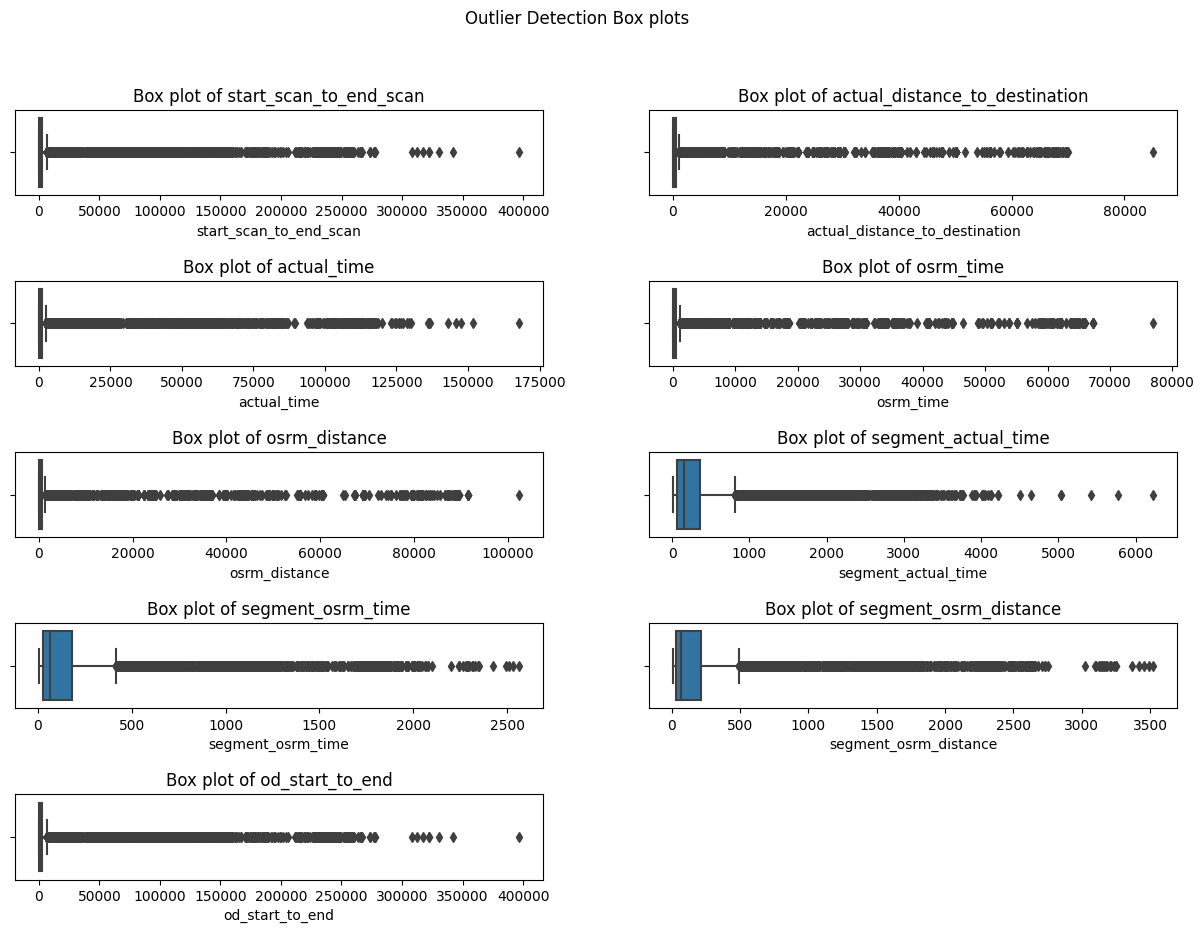

In [196]:
#Box plot for each numerical column
fig = plt.figure(figsize = (15,10))
plt.suptitle("Outlier Detection Box plots")
k = 1
for i in num_cols:
    plt.subplot(math.ceil(len(num_cols)/2),2,k)
    plt.title(f"Box plot of {i}")
    k += 1
    sns.boxplot(data=trip, x = i,orient="h")
plt.subplots_adjust(hspace = 1)
plt.show()

So many outliers are present in every numerical column

In [197]:
# # understanding the distribution for numerical variables
# fig = plt.figure(figsize = (15,25))
# plt.suptitle("Outlier Detection Box plots")
# k = 1
# for i in num_cols:
#     plt.subplot(math.ceil(len(num_cols)/2),2,k)
#     plt.title(f"Box plot of {i}")
#     k += 1
#     sns.histplot(data = trip, x= i, kde = True)
# plt.subplots_adjust(hspace = 1)
# plt.tight_layout()
# plt.show()

Normal distribution is not available in above graphs

## **Handle the outliers using the IQR method Bounding to whiskers method**

In [198]:
s = np.where(trip["od_start_to_end"]<6445.853574162498,trip["od_start_to_end"],6445.853574162498)

In [199]:
#create a function to find outliers using IQR (Statistical way)
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    upper_whisker = q3+1.5*IQR
    lower_whisker = q1-1.5*IQR
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    print("number of outliers =", (len(outliers)))
    print("max outlier value =", (outliers.max()))
    print("min outlier value =", (outliers.min()))
    print("Inter Quartile range =",IQR)
    print("upper_whisker =", upper_whisker)
    print("lower whisker =", lower_whisker)
    return (upper_whisker,lower_whisker)

Outliers statistics of start_scan_to_end_scan column
number of outliers = 2020
max outlier value = 396800.0
min outlier value = 6432.0
Inter Quartile range = 2408.0
upper_whisker = 6426.0
lower whisker = -3206.0
Removing the outliers of start_scan_to_end_scan by bounding the outliers to upper and lower whiskers


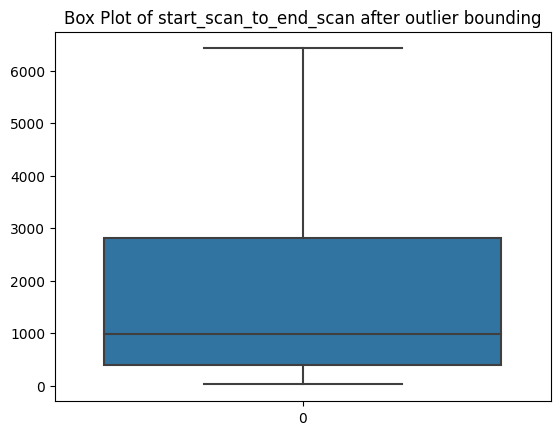


Outliers statistics of actual_distance_to_destination column
number of outliers = 2124
max outlier value = 85110.88509258961
min outlier value = 1077.5324053322074
Inter Quartile range = 411.02649797873073
upper_whisker = 1077.1463380366472
lower whisker = -566.9596538782756
Removing the outliers of actual_distance_to_destination by bounding the outliers to upper and lower whiskers


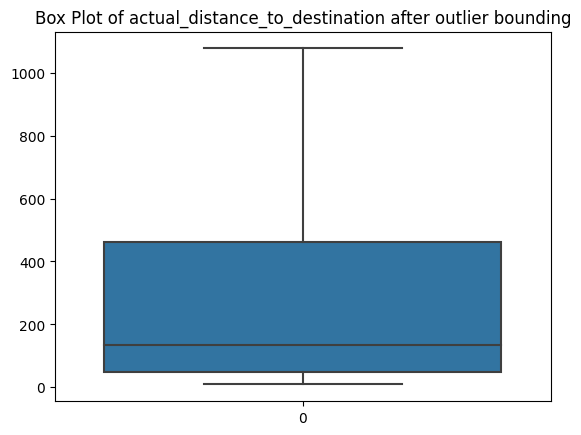


Outliers statistics of actual_time column
number of outliers = 2069
max outlier value = 167920.0
min outlier value = 2435.0
Inter Quartile range = 917.0
upper_whisker = 2434.5
lower whisker = -1233.5
Removing the outliers of actual_time by bounding the outliers to upper and lower whiskers


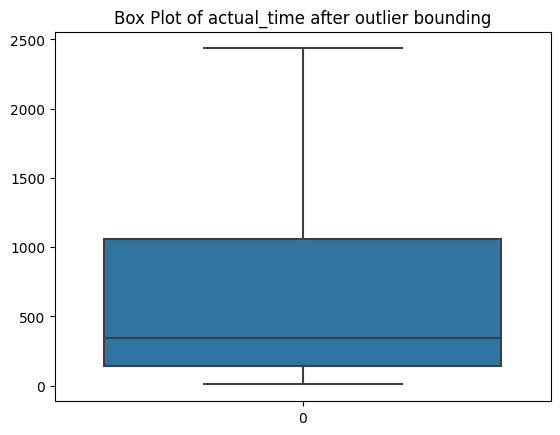


Outliers statistics of osrm_time column
number of outliers = 1958
max outlier value = 76953.0
min outlier value = 1185.0
Inter Quartile range = 449.5
upper_whisker = 1184.75
lower whisker = -613.25
Removing the outliers of osrm_time by bounding the outliers to upper and lower whiskers


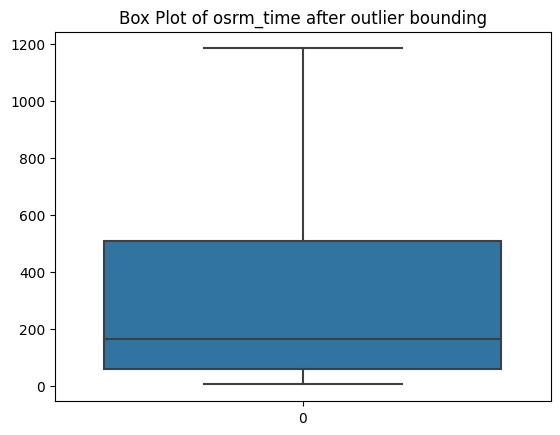


Outliers statistics of osrm_distance column
number of outliers = 2073
max outlier value = 102415.868
min outlier value = 1412.7296999999999
Inter Quartile range = 538.3198500000001
upper_whisker = 1411.435175
lower whisker = -741.8442250000002
Removing the outliers of osrm_distance by bounding the outliers to upper and lower whiskers


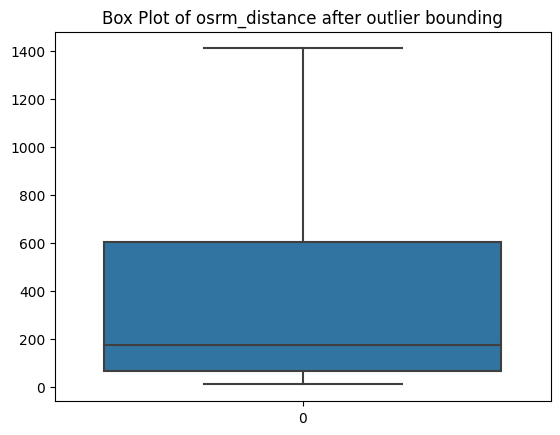


Outliers statistics of segment_actual_time column
number of outliers = 1644
max outlier value = 6230.0
min outlier value = 813.0
Inter Quartile range = 298.0
upper_whisker = 811.0
lower whisker = -381.0
Removing the outliers of segment_actual_time by bounding the outliers to upper and lower whiskers


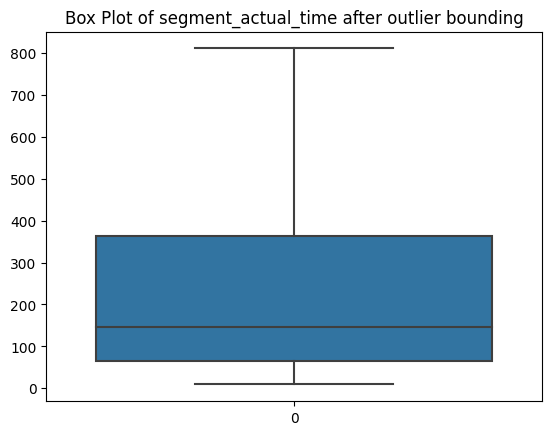


Outliers statistics of segment_osrm_time column
number of outliers = 1485
max outlier value = 2564.0
min outlier value = 416.0
Inter Quartile range = 154.0
upper_whisker = 415.0
lower whisker = -201.0
Removing the outliers of segment_osrm_time by bounding the outliers to upper and lower whiskers


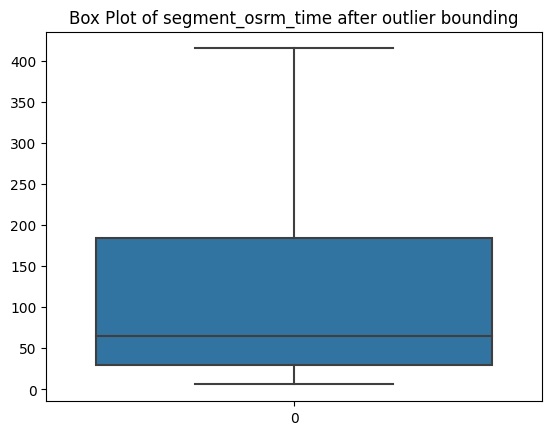


Outliers statistics of segment_osrm_distance column
number of outliers = 1550
max outlier value = 3523.6324
min outlier value = 493.5402
Inter Quartile range = 183.98174999999998
upper_whisker = 492.533225
lower whisker = -243.393775
Removing the outliers of segment_osrm_distance by bounding the outliers to upper and lower whiskers


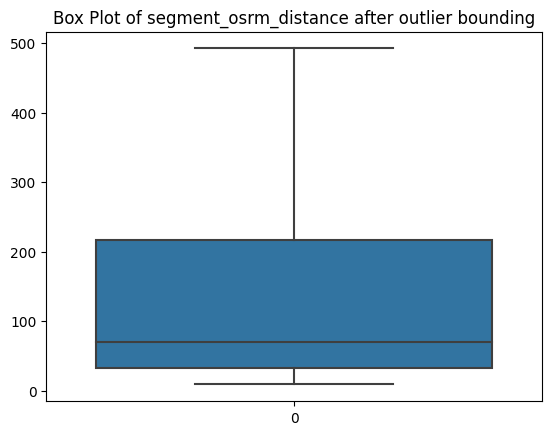


Outliers statistics of od_start_to_end column
number of outliers = 2018
max outlier value = 396834.6929945834
min outlier value = 6450.666158716666
Inter Quartile range = 2415.1538249583327
upper_whisker = 6445.853574162498
lower whisker = -3214.7617256708327
Removing the outliers of od_start_to_end by bounding the outliers to upper and lower whiskers


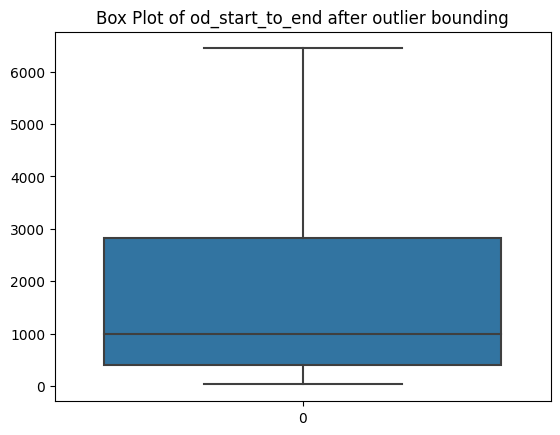

In [200]:
for i in num_cols:
    print(f"Outliers statistics of {i} column")
    upper_whisker,lower_whisker = find_outliers_IQR(trip[i])
    trip[i] = np.where(trip[i] < upper_whisker, 
                            np.where(trip[i] >= lower_whisker,
                                                trip[i],0),
                                                upper_whisker)
    print(f"Removing the outliers of {i} by bounding the outliers to upper and lower whiskers")
    plt.title(f"Box Plot of {i} after outlier bounding")
    sns.boxplot(data = trip[i])
    plt.show()
    print()

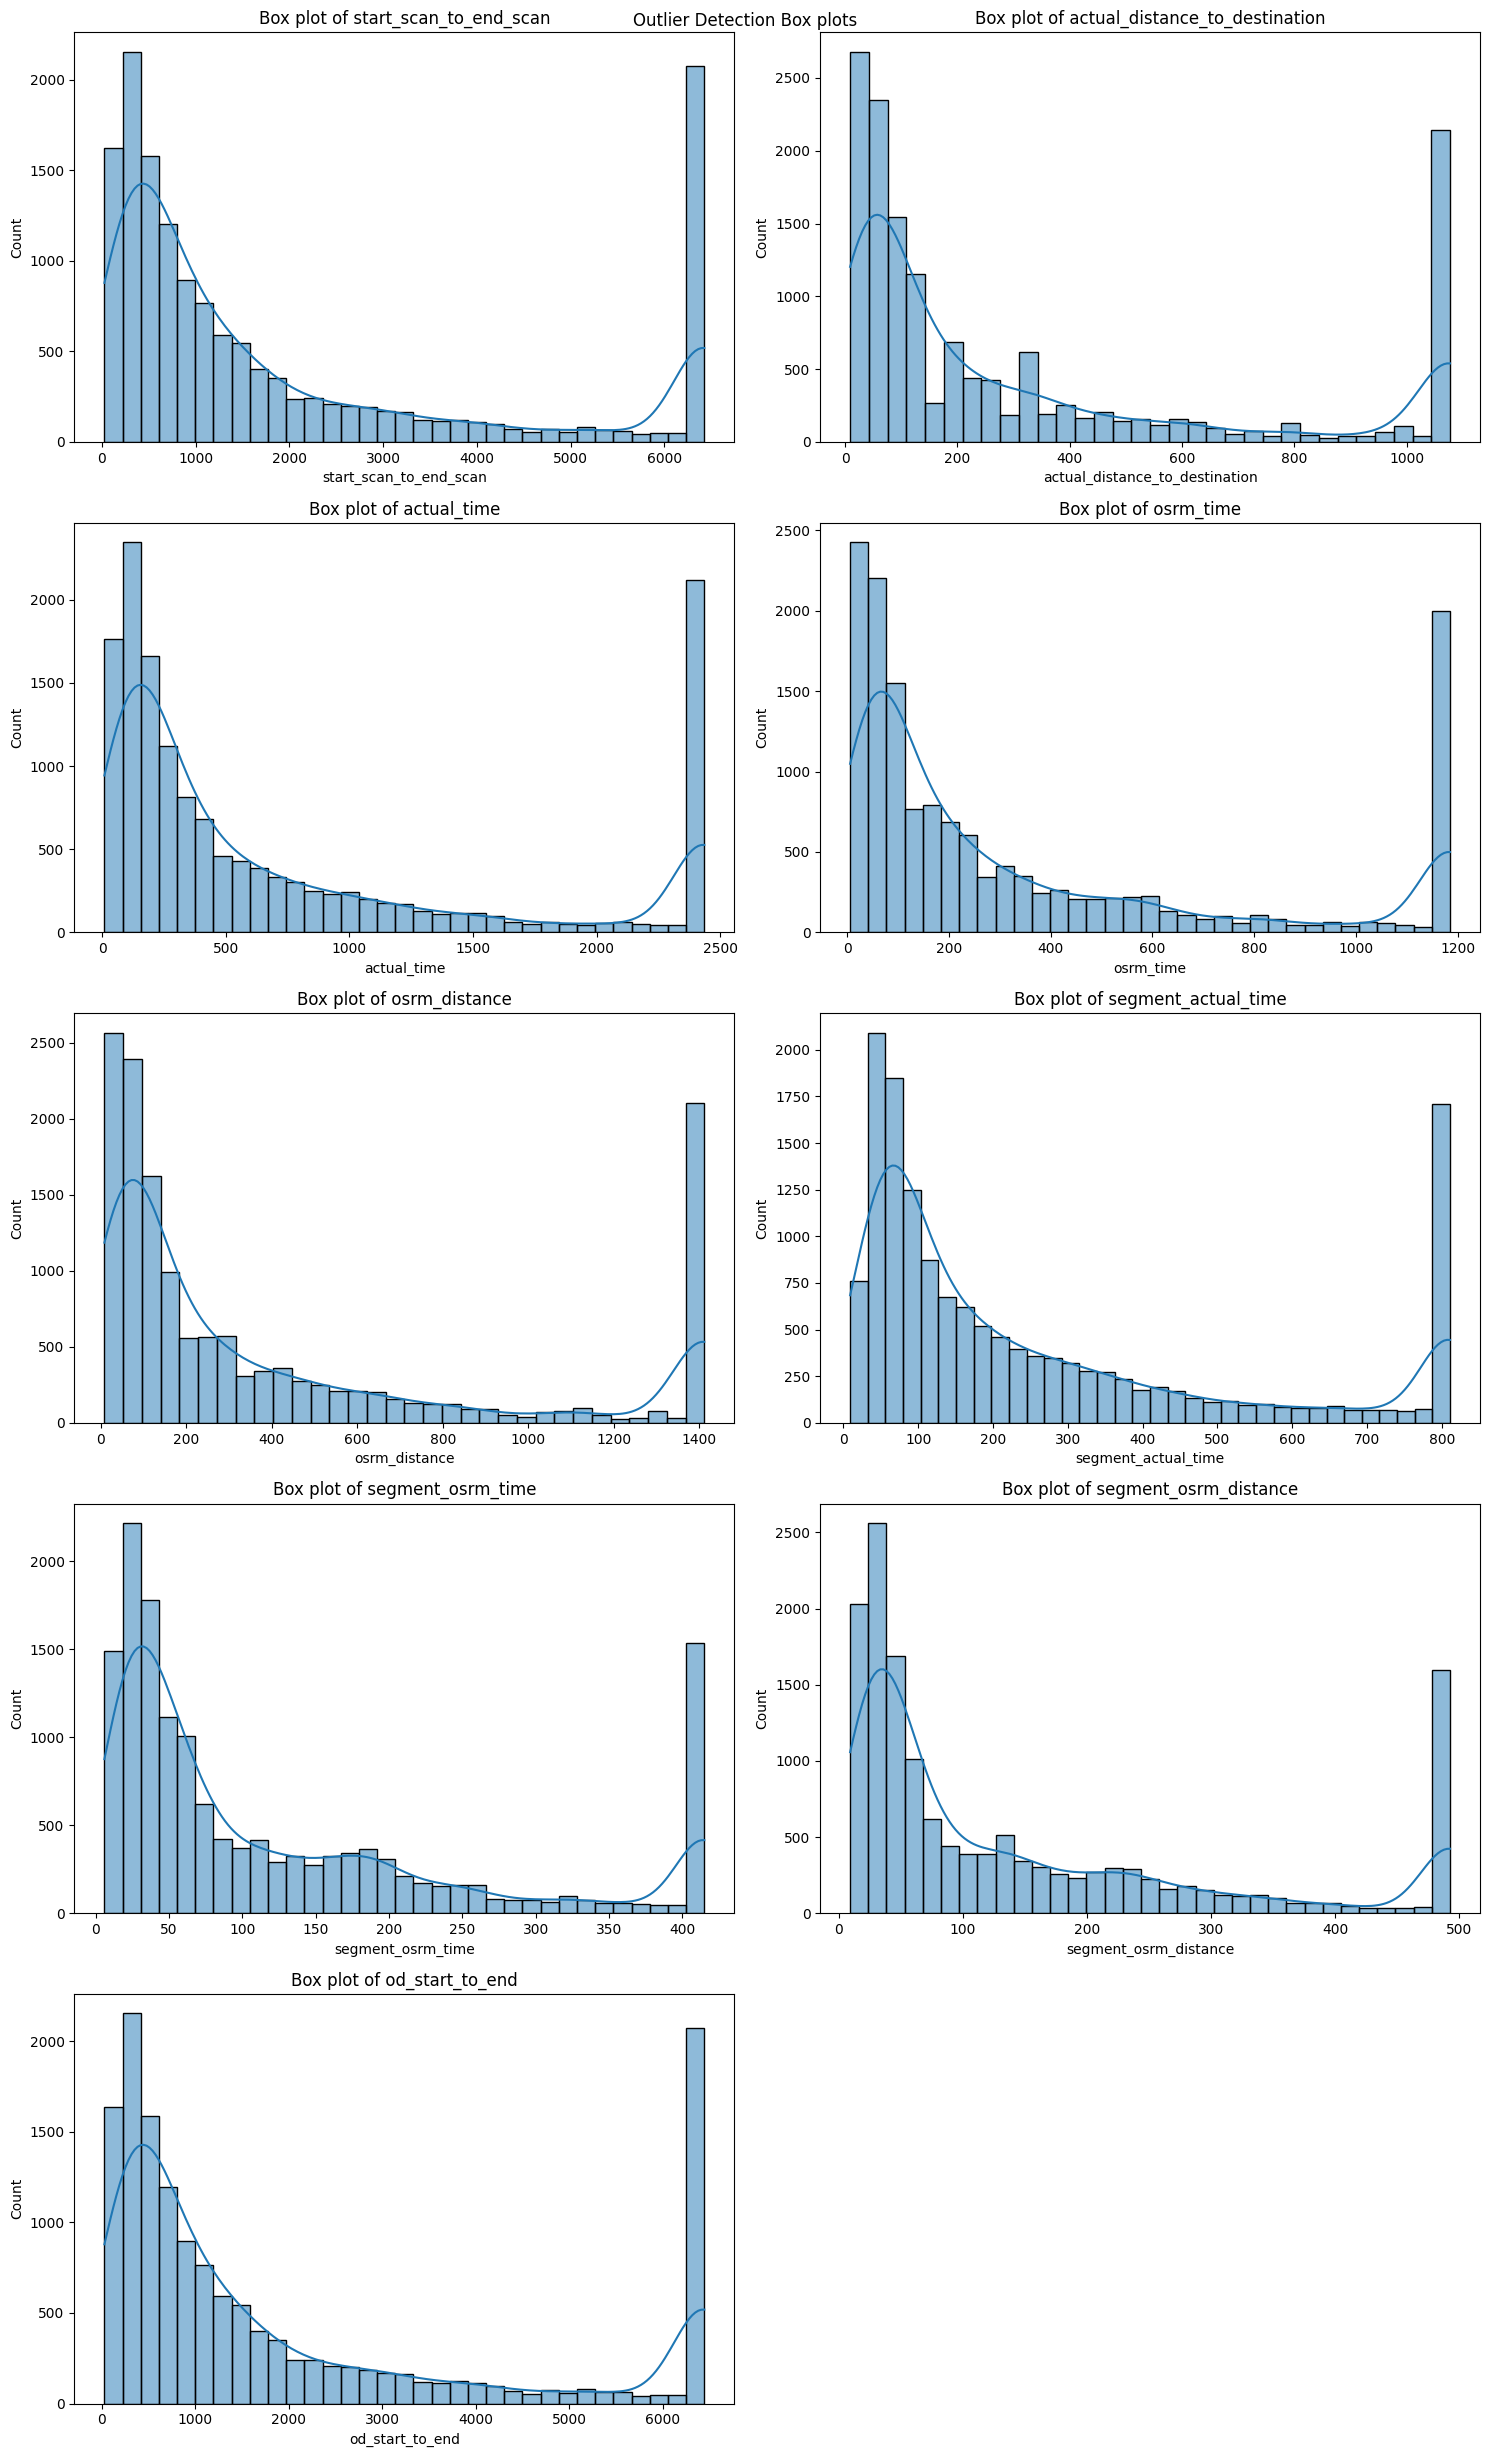

In [201]:
# understanding the distribution for numerical variables
fig = plt.figure(figsize = (15,25))
plt.suptitle("Outlier Detection Box plots")
k = 1
for i in num_cols:
    plt.subplot(math.ceil(len(num_cols)/2),2,k)
    plt.title(f"Box plot of {i}")
    k += 1
    sns.histplot(data = trip, x= i, kde = True)
plt.subplots_adjust(hspace = 1)
plt.tight_layout()
plt.show()

## Correlation analysis

<Axes: >

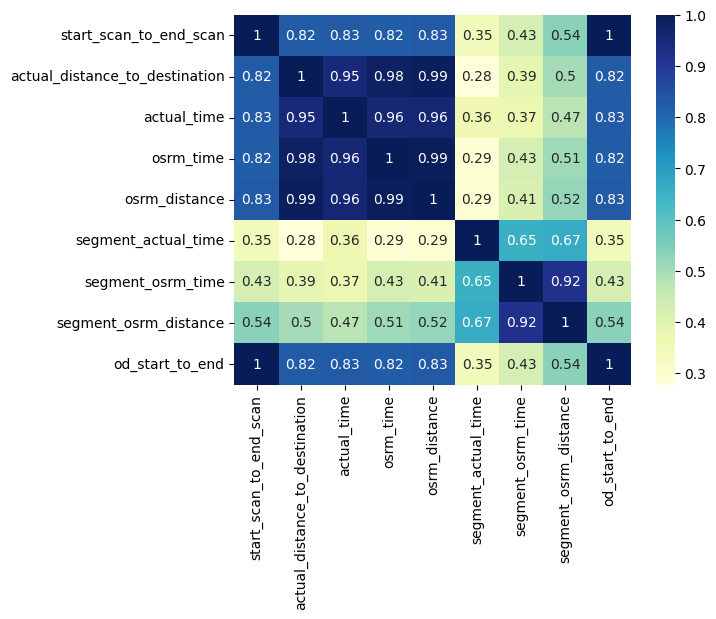

In [202]:
sns.heatmap(delhivery.corr(method = "spearman"), cmap="YlGnBu", annot=True)

<Axes: >

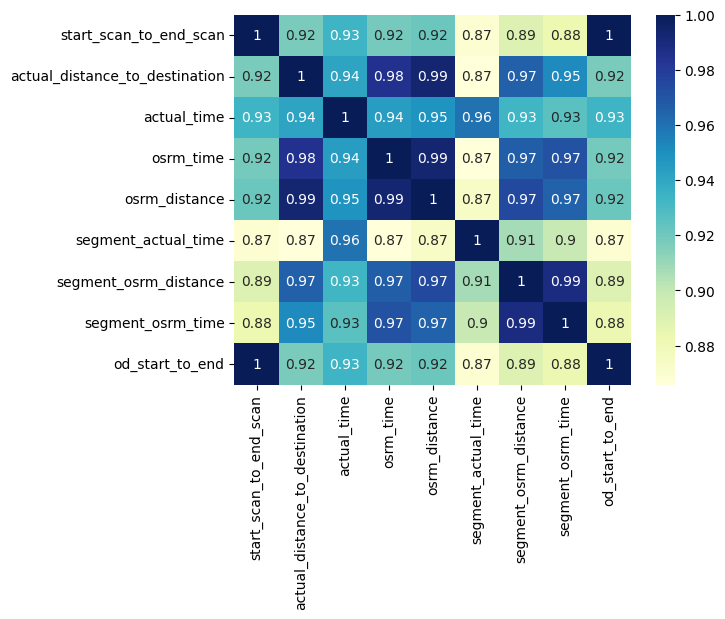

In [203]:
sns.heatmap(trip.corr(method = "spearman"), cmap="YlGnBu", annot=True)

> Improvement in correlation can be observed from pearson to spearman.

> High correlation observed among all columns(0.88 to 1)

# CHAPTER 5: COMPARISON & VISUALIZATION OF TIME AND DISTANCE FIELDS

In [204]:
trip["source_city_place"] = trip["source_city"]+"_"+trip["source_place"]

In [205]:
trip["destination_city_place"] = trip["destination_city"]+"_"+trip["destination_place"]

In [206]:
time_fields = ['trip_year', 'trip_month', 'trip_day', 'trip_time', 'trip_hour',
       'trip_week', 'trip_day_of_week']
place_fields = ['source_state','destination_state',
       'source_city','destination_city', 'source_city_place','destination_city_place', 'source_code', 'destination_code']

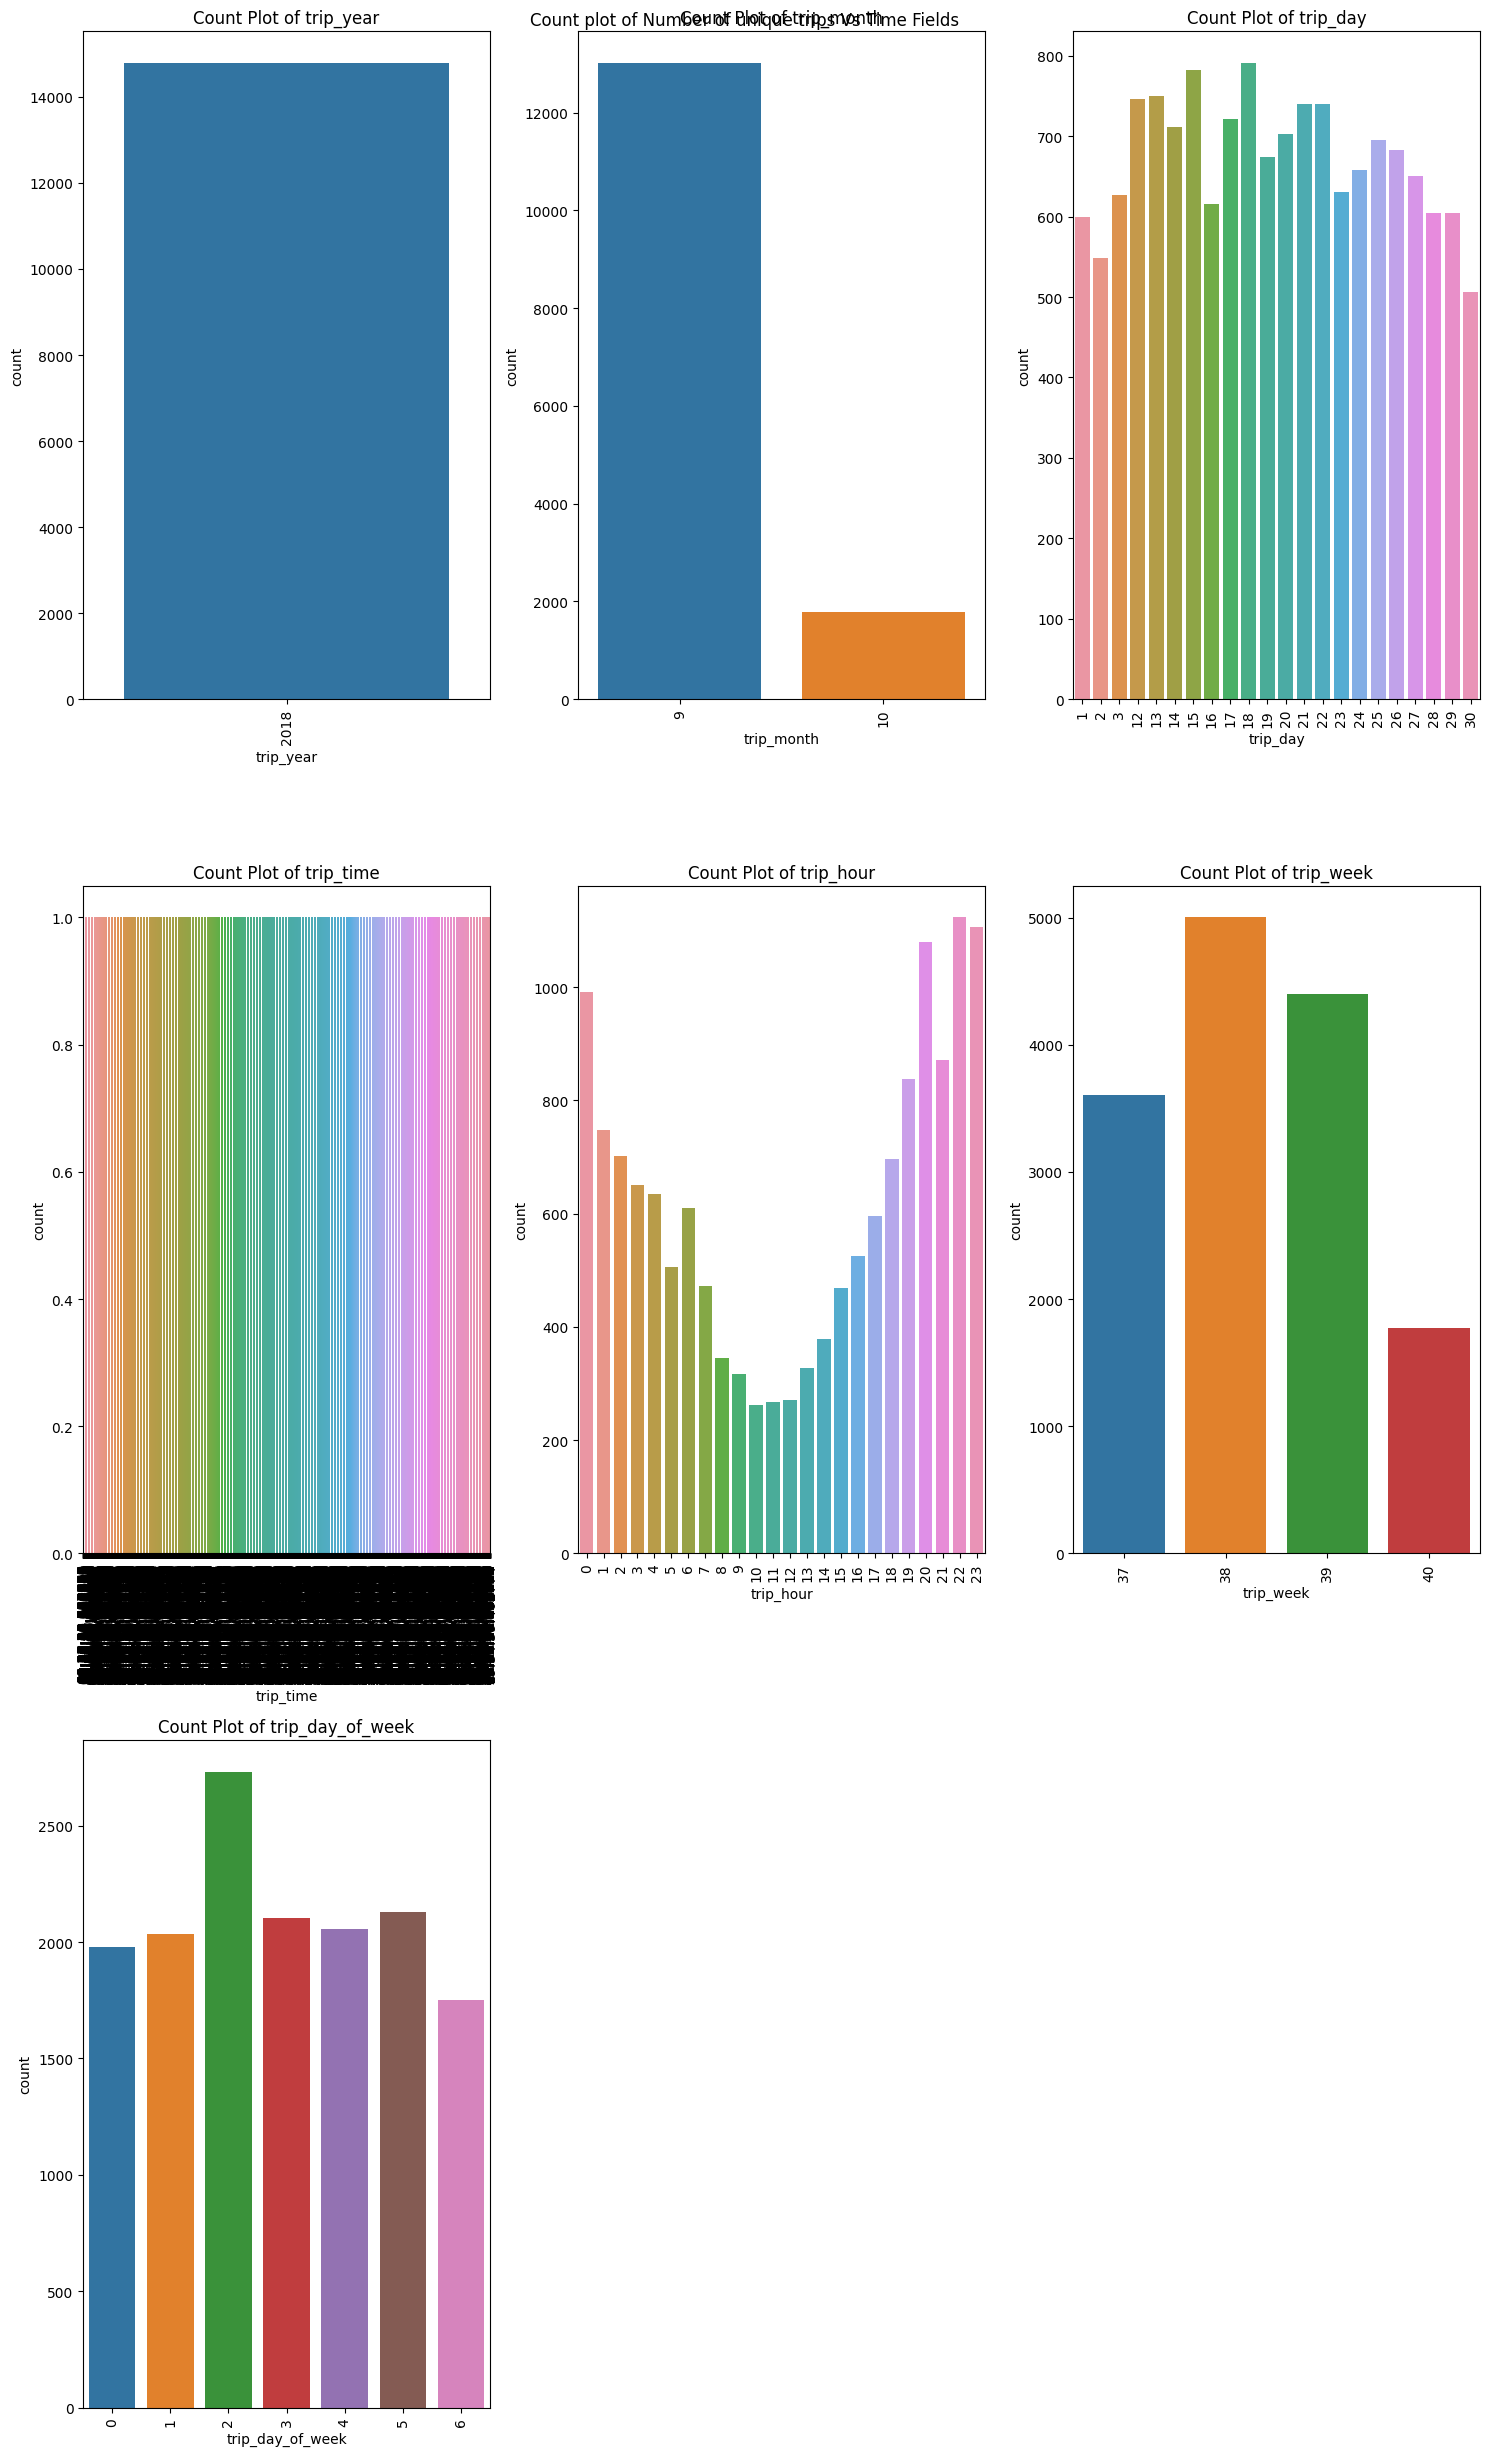

In [207]:
# understanding the number of trips (unique orders) Vs Time fields
fig = plt.figure(figsize = (15,25))
plt.suptitle("Count plot of Number of unique trips Vs Time Fields")
k = 1
for i in time_fields:
    plt.subplot(math.ceil(len(time_fields)/3),3,k)
    plt.title(f"Count Plot of {i}")
    plt.xticks(rotation = 90)
    k += 1
    sns.countplot(data = trip, x= i)
plt.subplots_adjust(hspace = 1)
plt.subplots_adjust(top=0.92)
plt.tight_layout()
plt.show()

Observations:

> Only 2018 year, september and october data available

> with respect to trip hour, during afternoons, less number of orders are registered

> with respect to trip day of the week, Day 2: Monday registers more number of orders.

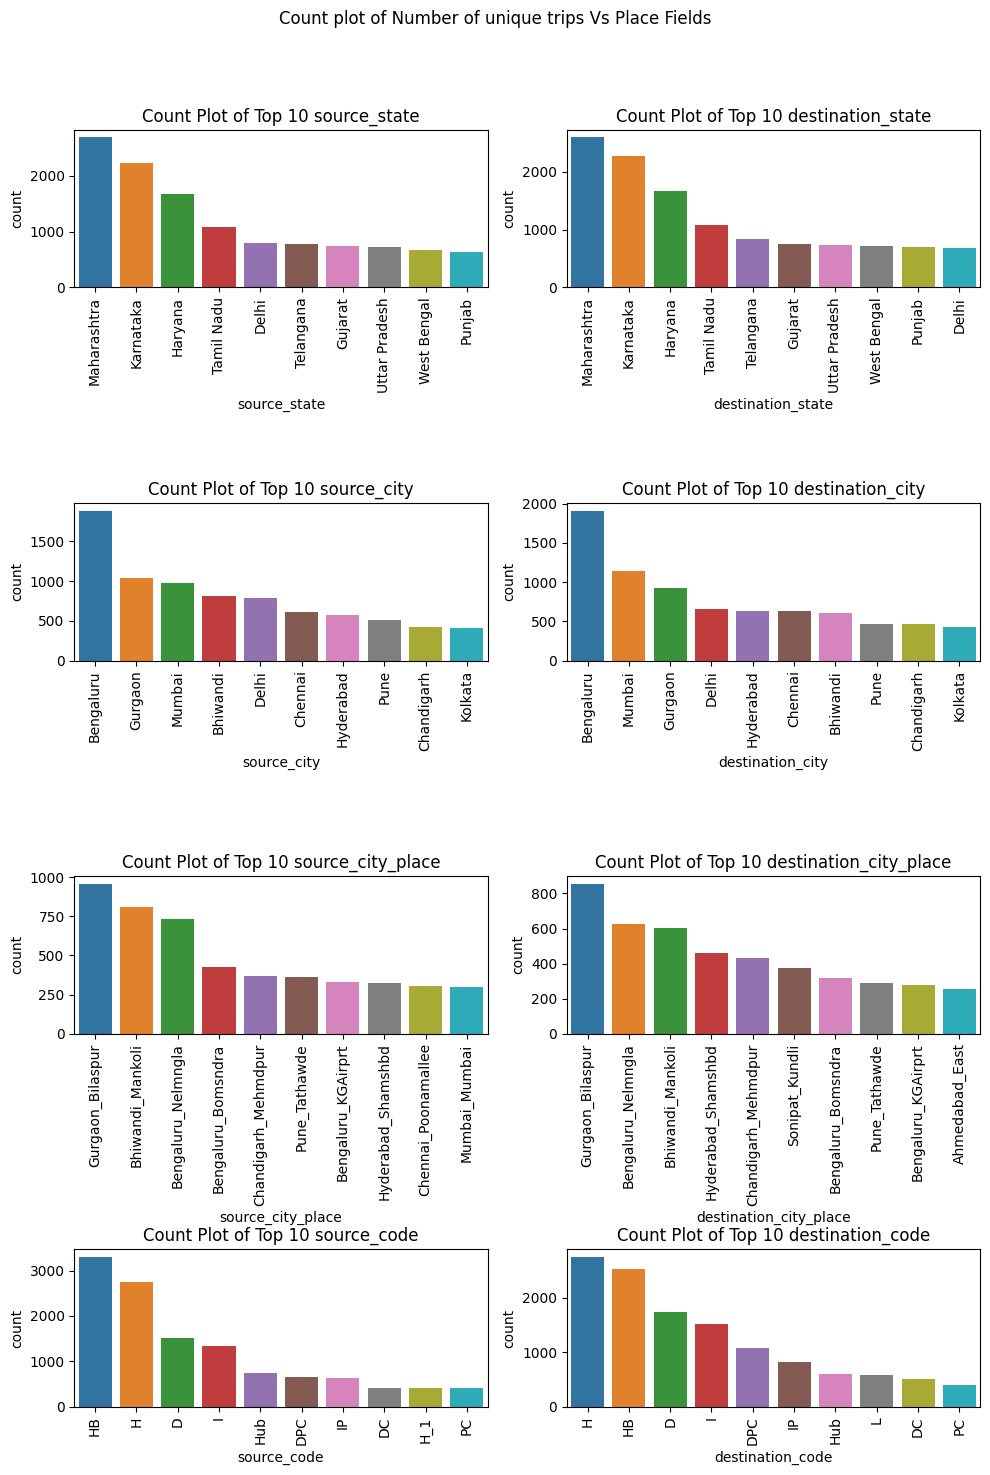

In [208]:
# understanding the number of trips (unique orders) Vs Place fields
fig = plt.figure(figsize = (10,15))
plt.suptitle("Count plot of Number of unique trips Vs Place Fields")
k = 1
for i in place_fields:
    plt.subplot(math.ceil(len(place_fields)/2),2,k)
    plt.title(f"Count Plot of Top 10 {i}")
    plt.xticks(rotation = 90)
    k += 1
    sns.countplot(data = trip, x = i, order=trip[i].value_counts().iloc[:10].index)
plt.subplots_adjust(hspace = 1)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [209]:
num_fields = ['actual_distance_to_destination','actual_time']
cat_fields = ['source_state','destination_state',
       'source_city','destination_city','source_city_place','destination_city_place', 'trip_day','trip_hour','trip_day_of_week']

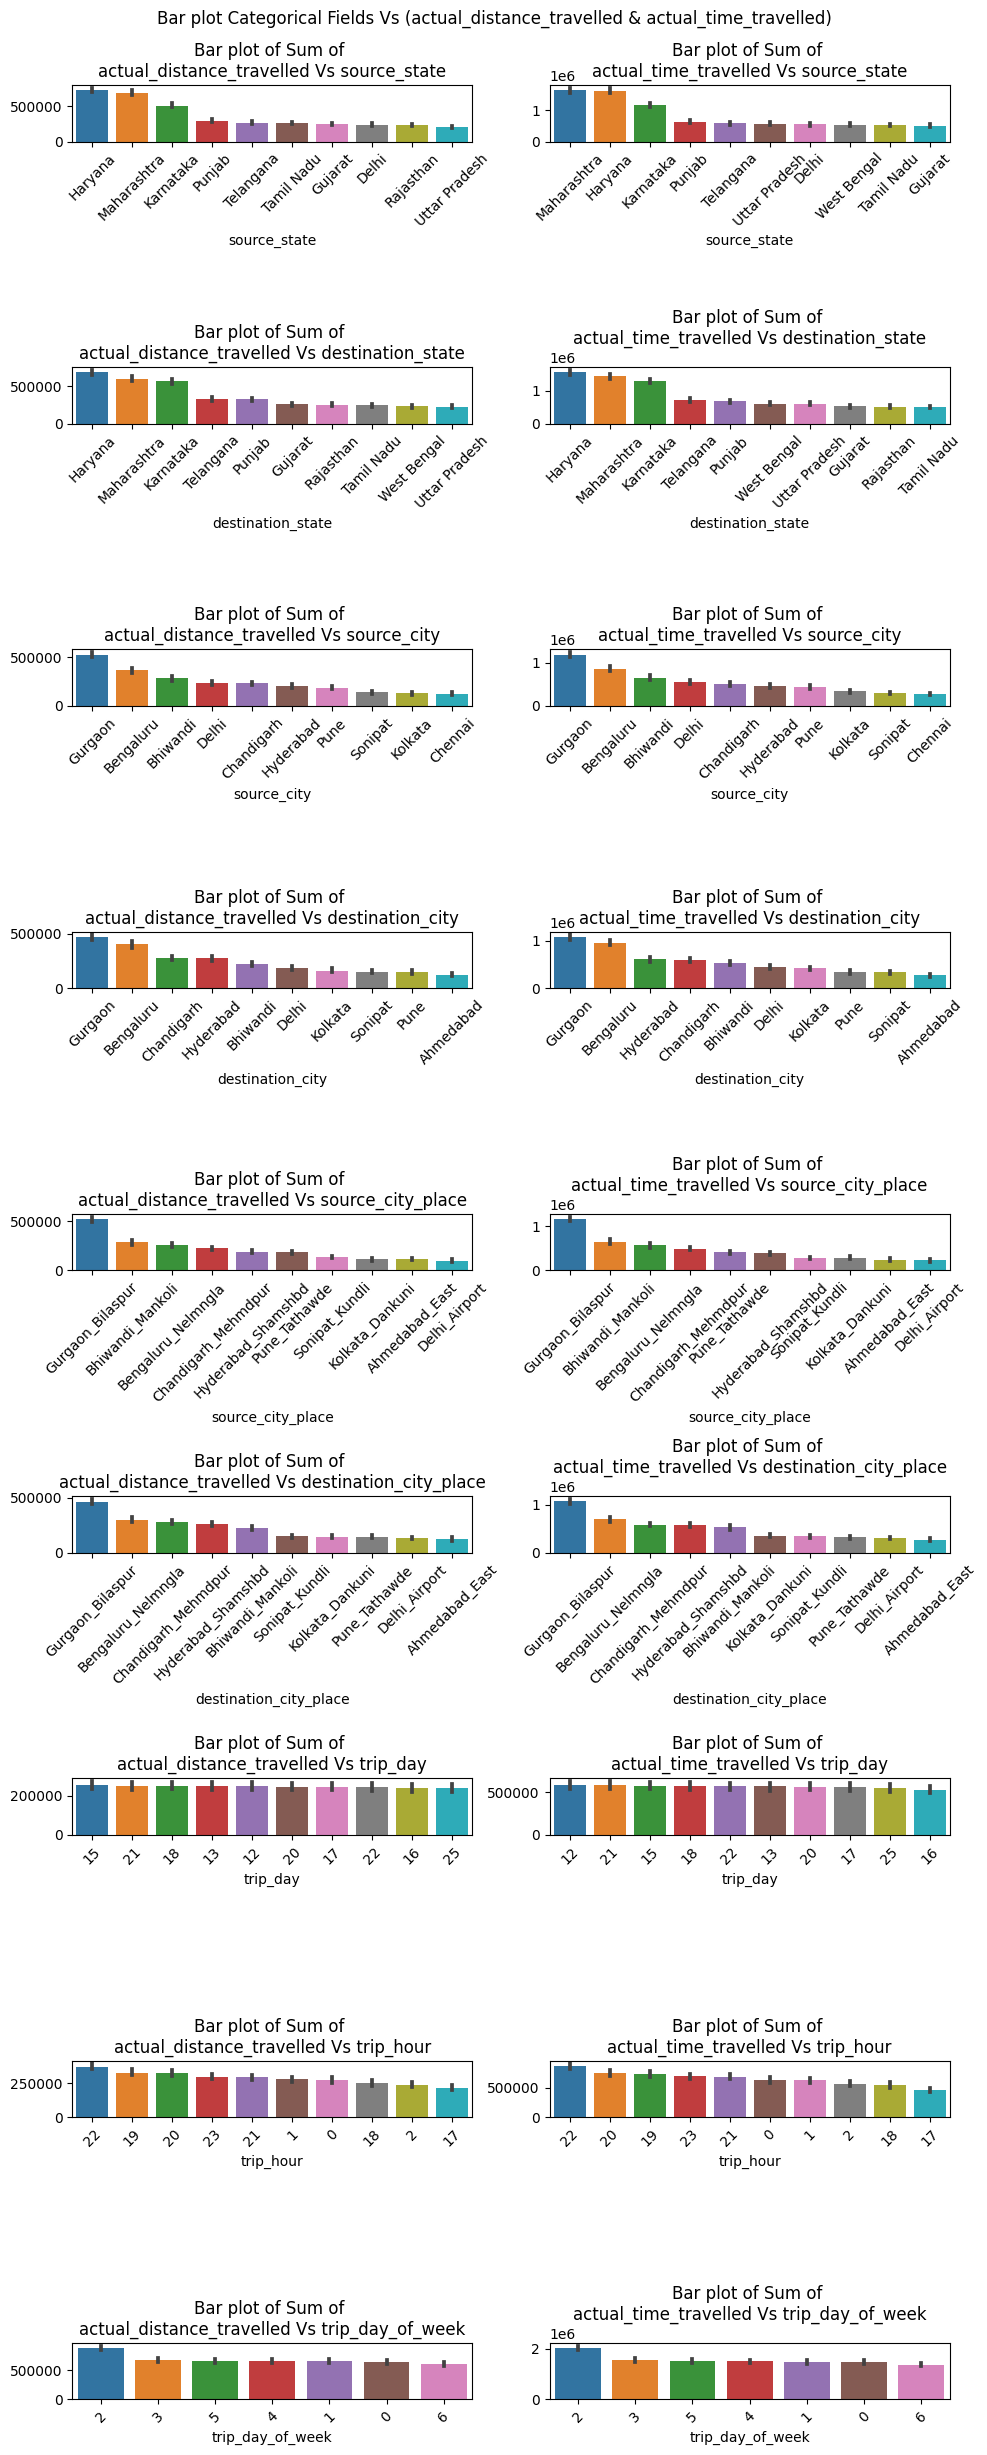

In [210]:
# understanding the actual_distance & actual_time per trip Vs Categorical Fields 
fig = plt.figure(figsize = (10,25))
plt.suptitle("Bar plot Categorical Fields Vs (actual_distance_travelled & actual_time_travelled)")
k = 1
for i in cat_fields:
    plt.subplot(math.ceil(len(cat_fields)),2,k)
    plt.title(f"Bar plot of Sum of \nactual_distance_travelled Vs {i}")
    plt.xticks(rotation = 45)
    k += 1
    sns.barplot(data = trip, x = i, y = num_fields[0], estimator= "sum",
                order=trip.groupby(i)[num_fields[0]].sum().sort_values(ascending=False).iloc[:10].index)
    plt.ylabel("")
    plt.subplot(math.ceil(len(cat_fields)),2,k)
    plt.title(f"Bar plot of Sum of \nactual_time_travelled Vs {i}")
    plt.xticks(rotation = 45)
    k += 1
    sns.barplot(data = trip, x = i, y = num_fields[1], estimator= "sum",
                order=trip.groupby(i)[num_fields[1]].sum().sort_values(ascending=False).iloc[:10].index)
    plt.ylabel("")
plt.subplots_adjust(hspace = 1)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [211]:
trip.head()

trip_uuid         trip_creation_time  \
0  trip-153671041653548748 2018-09-12 00:00:16.535741   
1  trip-153671042288605164 2018-09-12 00:00:22.886430   
2  trip-153671043369099517 2018-09-12 00:00:33.691250   
3  trip-153671046011330457 2018-09-12 00:01:00.113710   
4  trip-153671052974046625 2018-09-12 00:02:09.740725   

                                 route_schedule_uuid route_type source_center  \
0  thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...        FTL  IND462022AAA   
1  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...    Carting  IND572101AAA   
2  thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...        FTL  IND562132AAA   
3  thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...    Carting  IND400072AAB   
4  thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...        FTL  IND583101AAA   

            source_name destination_center       destination_name  \
0     Bhopal_Trnsport_H       IND000000ACB    Gurgaon_Bilaspur_HB   
1     Tumkur_Veersagr_I       IND562101AAA  Chikblapur_ShntiSgr_D   
2  Bangalore_Nelmngla_H       IND160002AAC  Chandigarh_Mehmdpur_H   
3            Mumbai Hub       IND401104AAA       Mumbai_MiraRd_IP   
4            Bellary_Dc       IND583101AAA             Bellary_Dc   

               od_start_time                od_end_time  \
0 2018-09-12 00:00:16.535741 2018-09-13 13:40:23.123744   
1 2018-09-12 00:00:22.886430 2018-09-12 03:01:59.598855   
2 2018-09-12 00:00:33.691250 2018-09-14 17:34:55.442454   
3 2018-09-12 00:01:00.113710 2018-09-12 01:41:29.809822   
4 2018-09-12 00:02:09.740725 2018-09-12 12:00:30.683231   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                  6426.0                     1077.146338       2434.5   
1                   906.0                      240.208306        399.0   
2                  6426.0                     1077.146338       2434.5   
3                   200.0                       28.529648         82.0   
4                  1586.0                      239.007304        556.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_distance  \
0    1184.75    1411.435175                811.0             492.533225   
1     210.00     269.430800                141.0              84.189400   
2    1184.75    1411.435175                811.0             492.533225   
3      24.00      31.647500                 59.0              19.876600   
4     207.00     266.291400                340.0             146.791900   

   segment_osrm_time    source_state source_city source_place source_code  \
0              415.0  Madhya Pradesh      Bhopal     Trnsport           H   
1               65.0       Karnataka      Tumkur     Veersagr           I   
2              415.0       Karnataka   Bengaluru     Nelmngla           H   
3               16.0     Maharashtra      Mumbai       Mumbai         Hub   
4              115.0       Karnataka     Bellary      Bellary          Dc   

  destination_state destination_city destination_place destination_code  \
0           Haryana          Gurgaon          Bilaspur               HB   
1         Karnataka       Chikblapur          ShntiSgr                D   
2            Punjab       Chandigarh          Mehmdpur                H   
3       Maharashtra           Mumbai            MiraRd               IP   
4         Karnataka          Bellary           Bellary               Dc   

  trip_year trip_month trip_day        trip_time trip_hour trip_week  \
0      2018          9       12  00:00:16.535741         0        37   
1      2018          9       12  00:00:22.886430         0        37   
2      2018          9       12  00:00:33.691250         0        37   
3      2018          9       12  00:01:00.113710         0        37   
4      2018          9       12  00:02:09.740725         0        37   

  trip_day_of_week  od_start_to_end   source_city_place destination_city_place  
0                2      6445.853574     Bhopal_Trnsport       Gurgaon_Bilaspur  
1           

<Axes: xlabel='route_type', ylabel='count'>

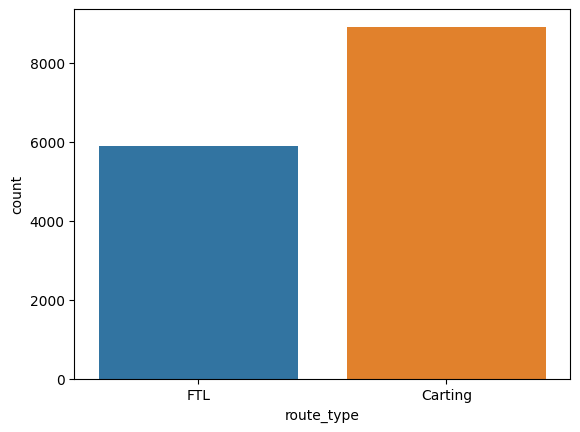

In [212]:
# comparison between route_type and numberical columns
sns.countplot(data = trip, x = "route_type")

> Carting type of route_type is dominating FTL route type in number of trips

<Axes: xlabel='route_type', ylabel='od_start_to_end'>

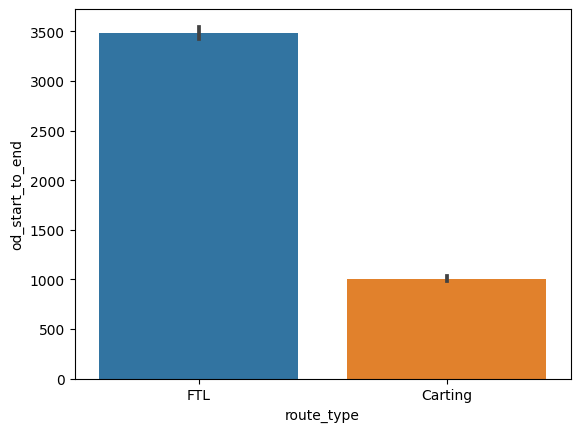

In [213]:
# Comparison between route_type and time taken from order start to end
sns.barplot(data =trip, x = "route_type", y= "od_start_to_end")

In [214]:
trip_modified = trip

In [215]:
trip_modified["diff_actual&osrm_time"] = trip_modified["actual_time"] - trip_modified["osrm_time"]

<Axes: xlabel='route_type', ylabel='diff_actual&osrm_time'>

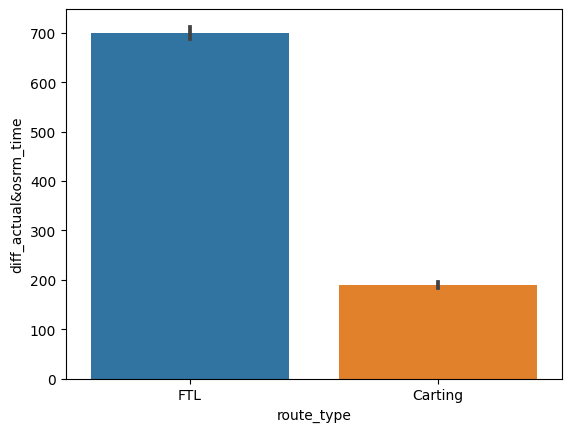

In [216]:
sns.barplot(data = trip_modified, x = "route_type", y = "diff_actual&osrm_time", estimator="mean")

In [218]:
trip_modified["diff_actual&osrm_distance"] = trip_modified["actual_distance_to_destination"] - trip_modified["osrm_distance"]

<Axes: xlabel='route_type', ylabel='diff_actual&osrm_distance'>

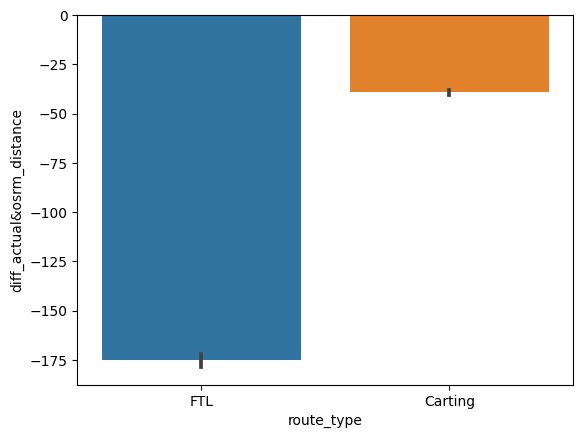

In [219]:
sns.barplot(data = trip_modified, x = "route_type", y = "diff_actual&osrm_distance", estimator="mean")

> FTL has less number of trips but contains more error in difference between actual time/distance and osrm time/distance

> Infrastructure of FTL should be modified to get perfect results.

# CHAPTER 6: CHECKING RELATIONSHIP BETWEEN AGGREGATED FIELDS USING HYPOTHESIS TESTING METHODS

## **Compare the difference between od_start_to_end and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.**

### Visual analysis

<Axes: ylabel='Density'>

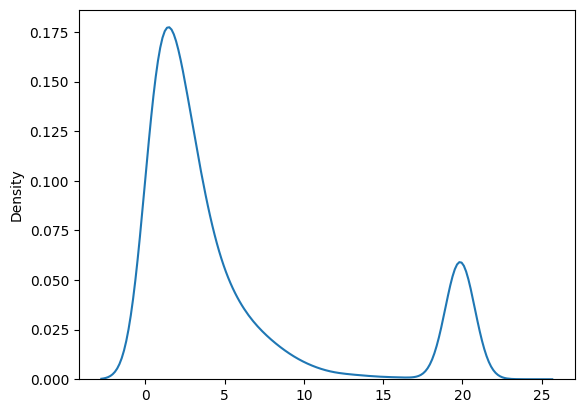

In [220]:
sns.kdeplot(data = trip["od_start_to_end"]-trip["start_scan_to_end_scan"])

<Axes: xlabel='start_scan_to_end_scan', ylabel='od_start_to_end'>

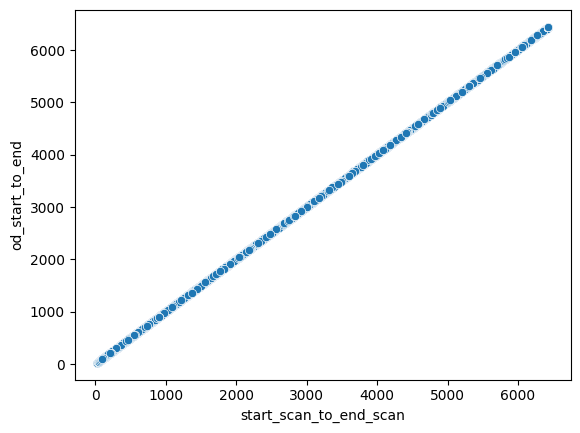

In [221]:
sns.scatterplot(data = trip, x = "start_scan_to_end_scan",y ="od_start_to_end")

<Axes: ylabel='Density'>

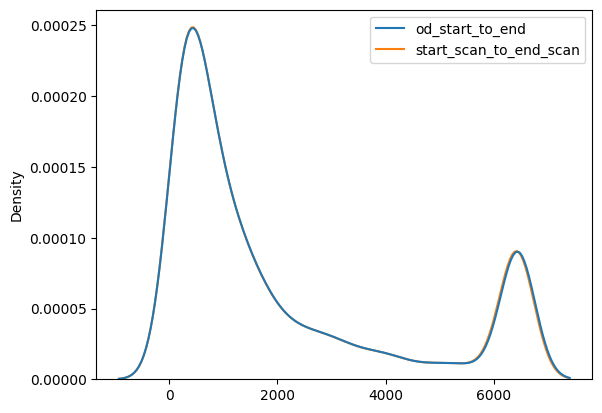

In [222]:
sns.kdeplot(data = trip[["od_start_to_end","start_scan_to_end_scan"]])

<Axes: ylabel='Density'>

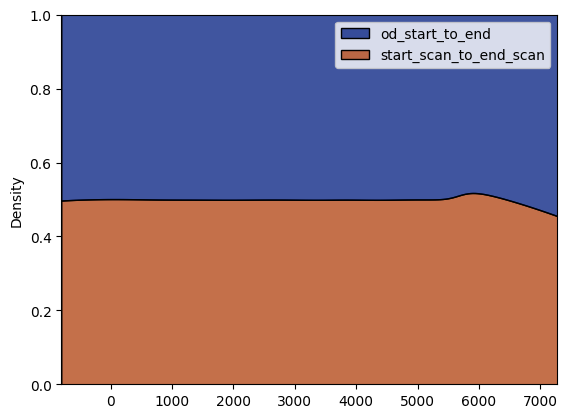

In [223]:
sns.kdeplot(data = trip[["od_start_to_end","start_scan_to_end_scan"]],fill = True,palette="dark",multiple="fill")

Graph indicates that there is no much difference between "od_start_to_end" and "start_scan_to_end_scan"

### Hypothesis formulation

> Null Hypothesis H0: No difference between  Mean of od_start_to_end and Start_scan_to_end_scan
\begin{align}
\mu_{od-start-to-end} = \mu_{Start-scan-to-end-scan}
\end{align}

> Alternate Hypothesis Ha: There is difference between Mean of  od_start_to_end and Start_scan_to_end_scan
\begin{align}
\mu_{od-start-to-end} \ne \mu_{Start-scan-to-end-scan}
\end{align}

> two-tailed test

> Significance level: 0.05

In [224]:
alpha = 0.05

### Selection of appropriate test

> `od_start_to_end` and `start_scan_to_end_scan` are independent as they are gathered in different manner.

> So here two independent samples are tested. samples are numerical and continous. 

> ttest comparing means of two independent samples is required so `ttest_ind` is appropriate (2sample ttest)

### Check the test assumptions

The two-samples independent t-test assume the following characteristics about the data:

In [225]:
data_group1 = trip["od_start_to_end"].values
data_group2 = trip["start_scan_to_end_scan"].values

#### Assumption 1: `Independence of the observations`- Each subject should belong to only one group. 

> There is no relationship between the observations in each group. (`gathered two columns in different manner, so independent`)

#### Assumption 2: Data groups should follow Normal distribution (atleast approximately)

##### `Shapiro test for normality check`

In [226]:
#Normality by shapiro test
shapiro(data_group1)

ShapiroResult(statistic=0.7589576840400696, pvalue=0.0)

In [227]:
shapiro(data_group2)

ShapiroResult(statistic=0.7590374946594238, pvalue=0.0)

p = 0 indicates that distribution is not normal. So Box cox transformation may require

<Axes: ylabel='Count'>

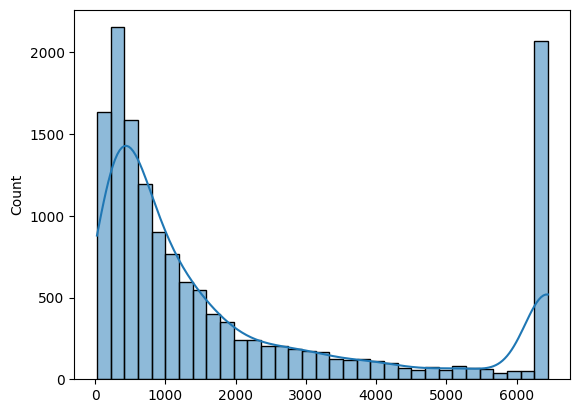

In [228]:
sns.histplot(data = data_group1,kde = True)

<Axes: ylabel='Count'>

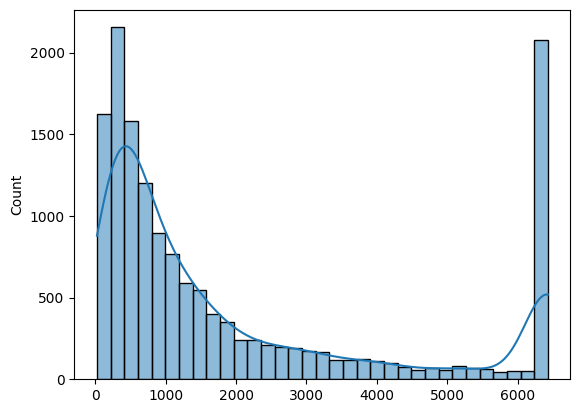

In [229]:
sns.histplot(data = data_group2,kde = True)

Above graph and shapiro test tells that data groups are not following NORMAL distribution

##### Box Cox Transformation

Lambda value used for Transformation: 0.03385185948347267


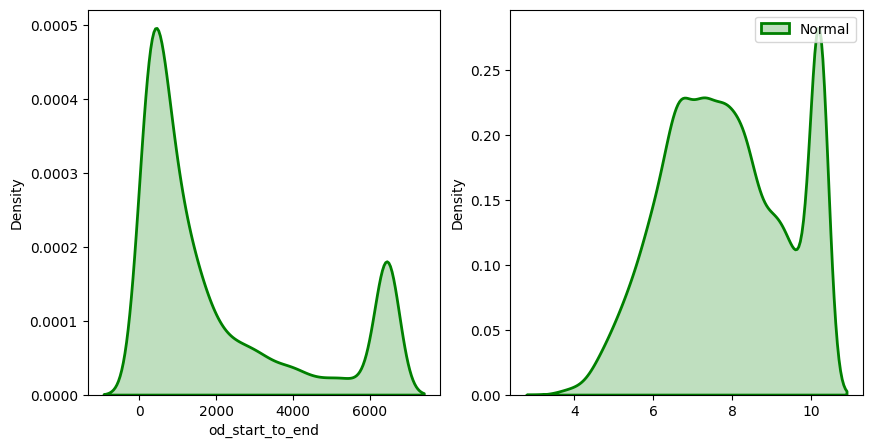

In [230]:
# generate non-normal data
original_data = trip["od_start_to_end"]

# transform training data & save lambda value
fitted_od_start_to_end, fitted_od_start_to_end_lambda = boxcox(original_data)

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
			kde_kws = {'shade': True, 'linewidth': 2},
			label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fitted_od_start_to_end, hist = False, kde = True,
			kde_kws = {'shade': True, 'linewidth': 2},
			label = "Normal", color ="green", ax = ax[1])

# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_od_start_to_end_lambda}")


Lambda value used for Transformation: 0.03492821561744983


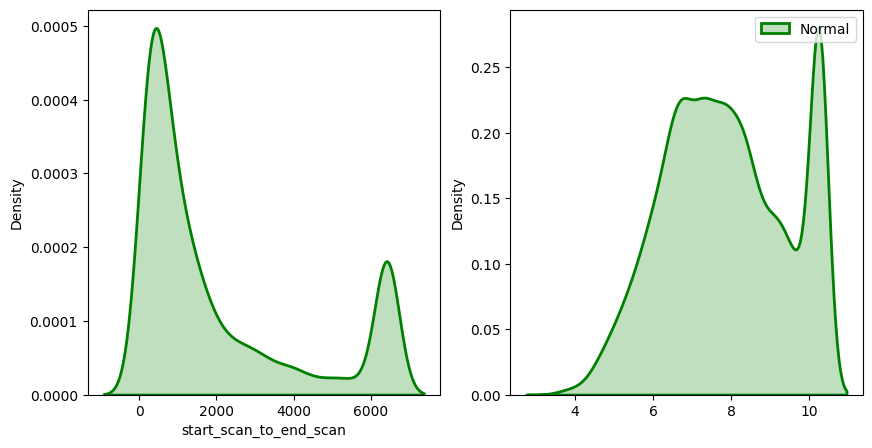

In [231]:
# generate non-normal data
original_data = trip["start_scan_to_end_scan"]

# transform training data & save lambda value
fitted_start_scan_to_end_scan, fitted_start_scan_to_end_scan_lambda = boxcox(original_data)

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
			kde_kws = {'shade': True, 'linewidth': 2},
			label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fitted_start_scan_to_end_scan, hist = False, kde = True,
			kde_kws = {'shade': True, 'linewidth': 2},
			label = "Normal", color ="green", ax = ax[1])

# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_start_scan_to_end_scan_lambda}")


In [232]:
data_group1 = fitted_od_start_to_end
data_group2 = fitted_start_scan_to_end_scan

#### Assumption 3: `No significant outliers` in the two groups (`No outliers according to box plots after bounding`)

<Axes: >

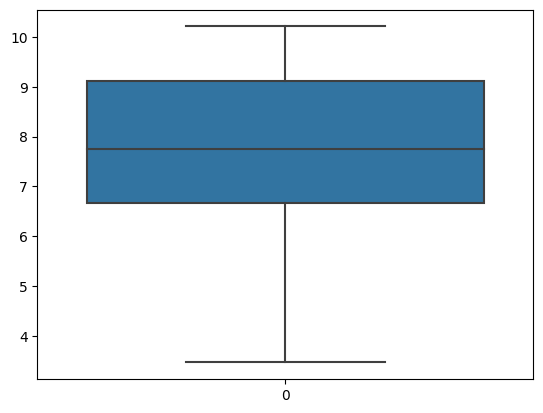

In [233]:
sns.boxplot(data_group1)

<Axes: >

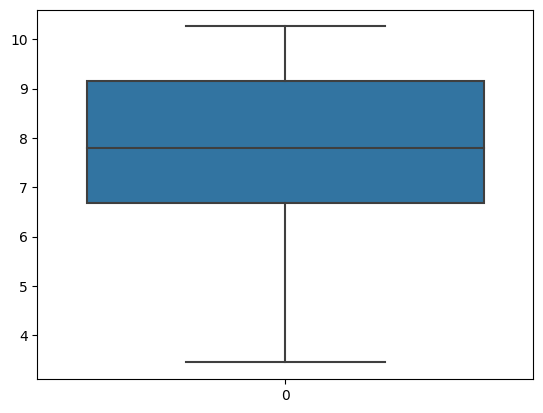

In [234]:
sns.boxplot(data_group2)

No outliers are present in both box plots

#### Assumption 4: `Equal variances` should be observed between two data groups

In [235]:
#homogeneity of variances
print("variance of od_start_to_end",np.var(data_group1),"\nvariance of start_scan_to_end_scan", np.var(data_group2))

variance of od_start_to_end 2.4135595113310835 
variance of start_scan_to_end_scan 2.454796393170503


Before conducting the two-sample T-Test we need to find if the given data groups have the same variance. If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have equal variance.

##### `Levene Test`

In [236]:
levene(data_group1,data_group2)

LeveneResult(statistic=1.2323684058451925, pvalue=0.26695596014718814)

p value> 0.05 indicates that data groups have equal variances

### Finding the p-value

In [237]:
tstat,p_val = ttest_ind(a=data_group1, b=data_group2, equal_var=True,alternative = "two-sided")

In [238]:
print("test statistic",tstat)
print("p value",p_val)

test statistic -1.5016668820636212
p value 0.1331938380802412


### Conclusion based on the p-value

In [239]:
if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that\n\
          There is difference between Mean of  od_start_to_end and Start_scan_to_end_scan")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis\n\
    i.e, No difference between  Mean of od_start_to_end and Start_scan_to_end_scan")

Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis
    i.e, No difference between  Mean of od_start_to_end and Start_scan_to_end_scan


## **Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

### Visual analysis

<Axes: ylabel='Density'>

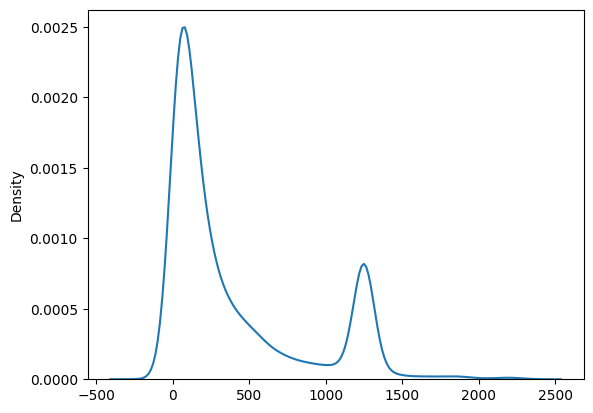

In [240]:
sns.kdeplot(data = trip["actual_time"]-trip["osrm_time"])

<Axes: xlabel='actual_time', ylabel='osrm_time'>

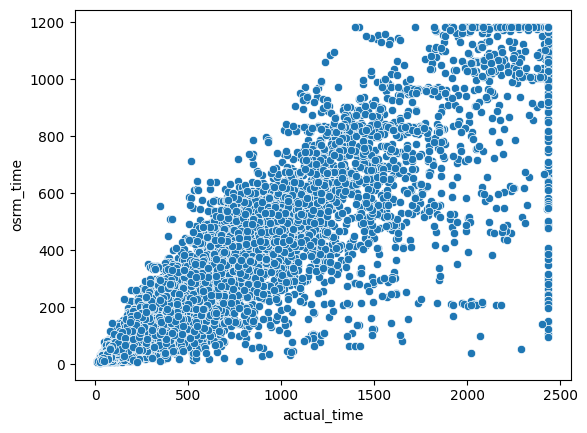

In [241]:
sns.scatterplot(data = trip, x = "actual_time",y ="osrm_time")

<Axes: ylabel='Density'>

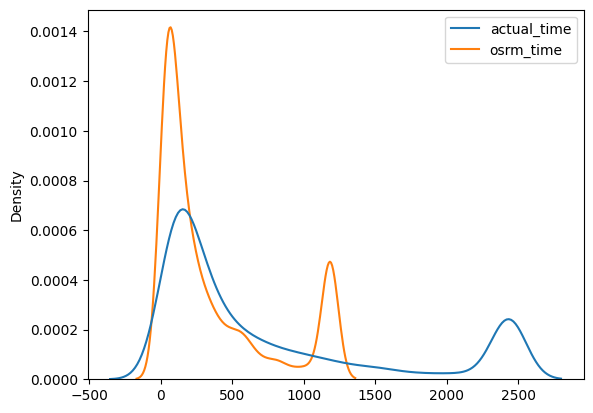

In [242]:
sns.kdeplot(data = trip[["actual_time","osrm_time"]])

<Axes: ylabel='Density'>

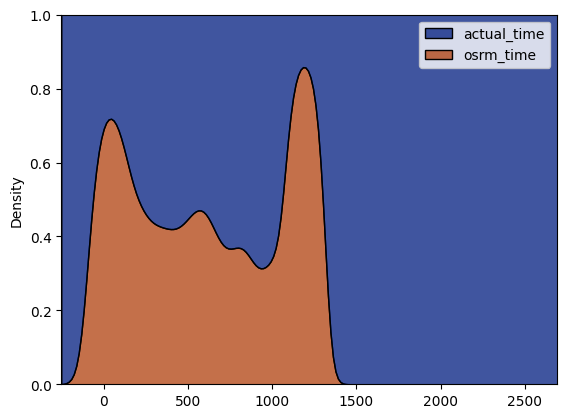

In [243]:
sns.kdeplot(data = trip[["actual_time","osrm_time"]],fill = True,palette="dark",multiple="fill")

Graph indicates that there is difference between "actual_time" and "osrm_time"

### Hypothesis formulation

> Null Hypothesis H0: No difference between  Mean of actual_time and osrm_time
\begin{align}
\mu_{actual-time} = \mu_{osrm-time}
\end{align}

> Alternate Hypothesis Ha: There is difference between Mean of  actual_time and osrm_time
\begin{align}
\mu_{actual-time} \ne \mu_{osrm-time}
\end{align}

> two-tailed test

> Significance level: 0.05

In [244]:
alpha = 0.05

### Selection of appropriate test

> `actual_time` and `osrm_time` are independent as they are gathered in different manner.

> So here two independent samples are tested. samples are numerical and continous. 

> ttest comparing means of two independent samples is required so `ttest_ind` is appropriate (2sample ttest)

### Check the test assumptions

The two-samples independent t-test assume the following characteristics about the data:

In [245]:
data_group1 = trip["actual_time"].values
data_group2 = trip["osrm_time"].values

#### Assumption 1: `Independence of the observations`- Each subject should belong to only one group. 

> There is no relationship between the observations in each group. (`gathered two columns in different manner, so independent`)

#### Assumption 2: Data groups should follow Normal distribution (atleast approximately)

##### `Shapiro test for normality check`

In [246]:
#Normality by shapiro test
shapiro(data_group1)

ShapiroResult(statistic=0.7551202774047852, pvalue=0.0)

In [247]:
shapiro(data_group2)

ShapiroResult(statistic=0.7560504078865051, pvalue=0.0)

p = 0 indicates that distribution is not normal. So Box cox transformation may require

<Axes: ylabel='Count'>

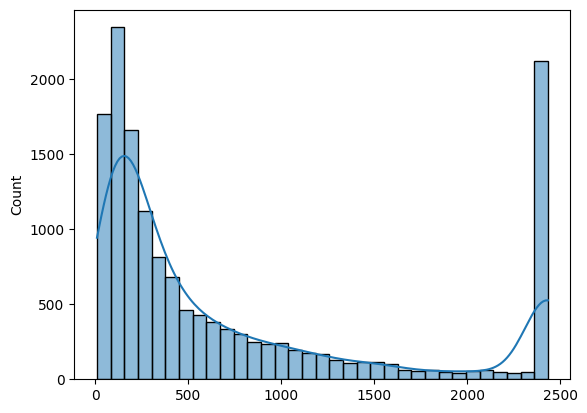

In [248]:
sns.histplot(data = data_group1,kde = True)

<Axes: ylabel='Count'>

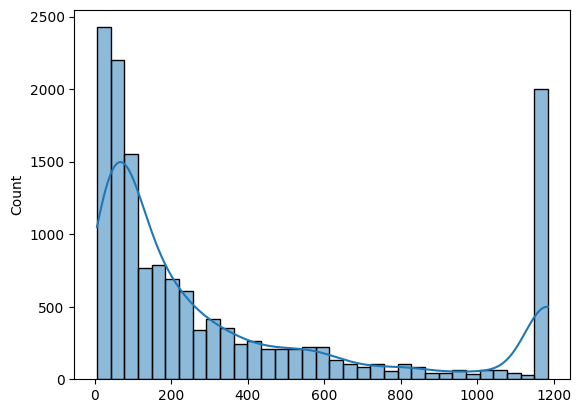

In [249]:
sns.histplot(data = data_group2,kde = True)

Above graph and shapiro test tells that data groups are not following NORMAL distribution

##### Box Cox Transformation

Lambda value used for Transformation: 0.011661865710665452


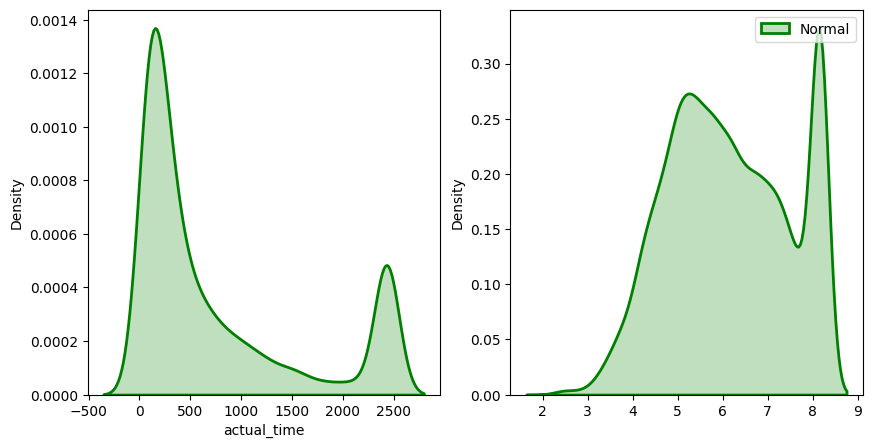

In [250]:
# generate non-normal data
original_data = trip["actual_time"]

# transform training data & save lambda value
fitted_actual_time, fitted_actual_time_lambda = boxcox(original_data)

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
			kde_kws = {'shade': True, 'linewidth': 2},
			label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fitted_actual_time, hist = False, kde = True,
			kde_kws = {'shade': True, 'linewidth': 2},
			label = "Normal", color ="green", ax = ax[1])

# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_actual_time_lambda}")


Lambda value used for Transformation: 0.008528277972301913


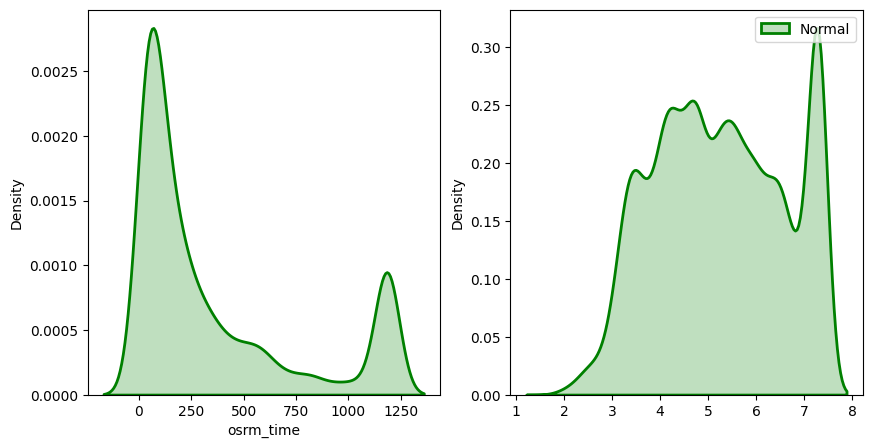

In [251]:
# generate non-normal data
original_data = trip["osrm_time"]

# transform training data & save lambda value
fitted_osrm_time, fitted_osrm_time_lambda = boxcox(original_data)

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
			kde_kws = {'shade': True, 'linewidth': 2},
			label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fitted_osrm_time, hist = False, kde = True,
			kde_kws = {'shade': True, 'linewidth': 2},
			label = "Normal", color ="green", ax = ax[1])

# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_osrm_time_lambda}")


In [252]:
data_group1 = fitted_actual_time
data_group2 = fitted_osrm_time

#### Assumption 3: `No significant outliers` in the two groups (`No outliers according to box plots after bounding`)

<Axes: >

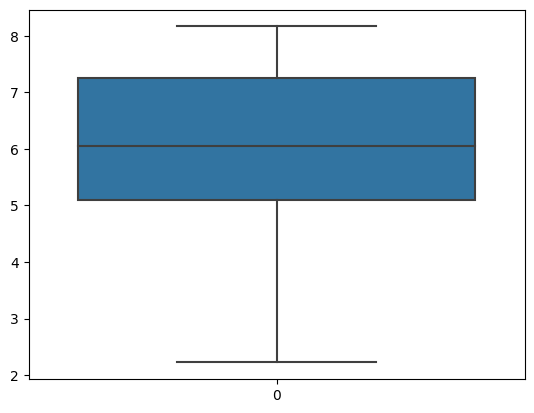

In [253]:
sns.boxplot(data_group1)

<Axes: >

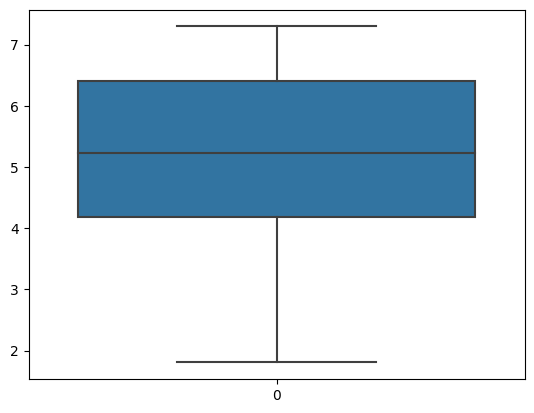

In [254]:
sns.boxplot(data_group2)

No outliers are present in both box plots

#### Assumption 4: `Equal variances` should be observed between two data groups

In [255]:
#homogeneity of variances
print("variance of actual_time",np.var(data_group1),"\nvariance of osrm_time", np.var(data_group2))

variance of actual_time 1.7942706805535242 
variance of osrm_time 1.8028476626407721


Before conducting the two-sample T-Test we need to find if the given data groups have the same variance. If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have equal variance.

##### `Levene Test`

In [256]:
levene(data_group1,data_group2)

LeveneResult(statistic=1.4295084618738148, pvalue=0.231854261737376)

p value> 0.05 indicates that data groups have equal variances

### Finding the p-value

In [257]:
tstat,p_val = ttest_ind(a=data_group1, b=data_group2, equal_var=True,alternative = "two-sided")

In [258]:
print("test statistic",tstat)
print("p value",p_val)

test statistic 56.2461278743142
p value 0.0


### Conclusion based on the p-value

In [259]:
if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that\n\
          There is difference between Mean of  actual_time and osrm_time")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis\n\
    i.e, No difference between  Mean of actual_time and osrm_time")


Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that
          There is difference between Mean of  actual_time and osrm_time


## **Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

### Visual analysis

<Axes: ylabel='Density'>

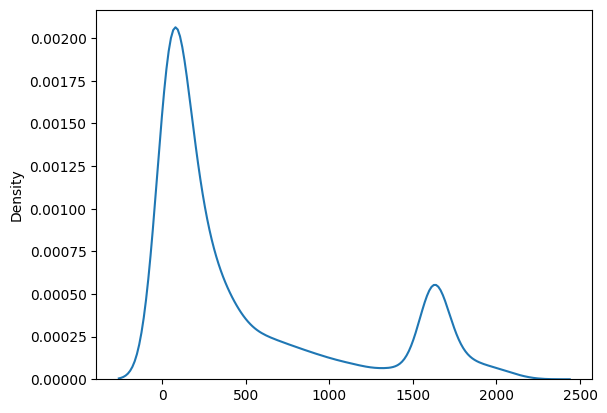

In [260]:
sns.kdeplot(data = trip["actual_time"]-trip["segment_actual_time"])

<Axes: xlabel='actual_time', ylabel='segment_actual_time'>

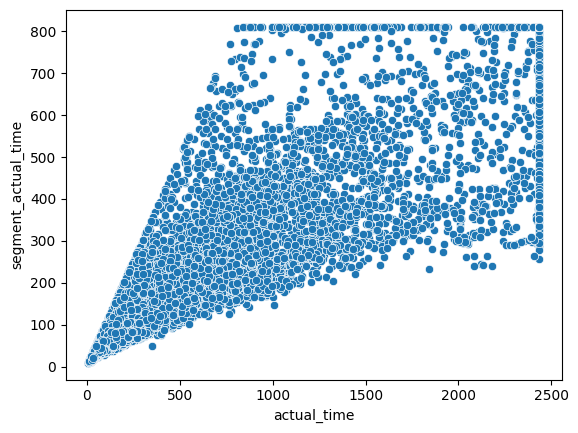

In [261]:
sns.scatterplot(data = trip, x = "actual_time",y ="segment_actual_time")

<Axes: ylabel='Density'>

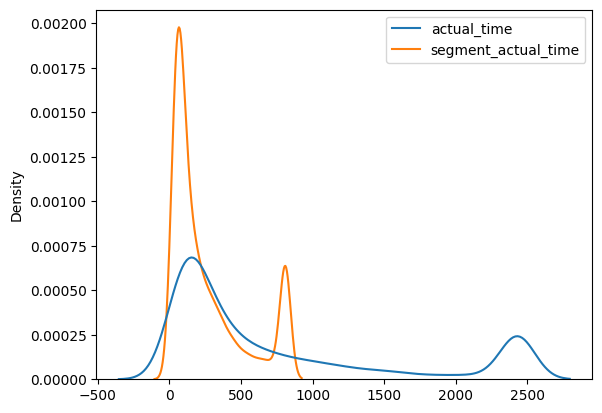

In [262]:
sns.kdeplot(data = trip[["actual_time","segment_actual_time"]])

<Axes: ylabel='Density'>

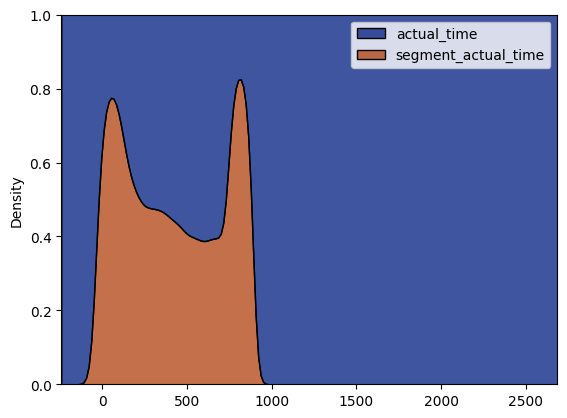

In [263]:
sns.kdeplot(data = trip[["actual_time","segment_actual_time"]],fill = True,palette="dark",multiple="fill")

Graph indicates that there is no much difference between "actual_time" and "segment_actual_time"

### Hypothesis formulation

> Null Hypothesis H0: No difference between  Mean of actual_time and segment_actual_time
\begin{align}
\mu_{actual-time} = \mu_{segment-actual-time}
\end{align}

> Alternate Hypothesis Ha: There is difference between Mean of  actual_time and segment_actual_time
\begin{align}
\mu_{actual-time} \ne \mu_{segment-actual-time}
\end{align}

> two-tailed test

> Significance level: 0.05

In [264]:
alpha = 0.05

### Selection of appropriate test

> `actual_time` and `segment_actual_time` are independent as they are gathered in different manner.

> So here two independent samples are tested. samples are numerical and continous. 

> ttest comparing means of two independent samples is required so `ttest_ind` is appropriate (2sample ttest)

### Check the test assumptions

The two-samples independent t-test assume the following characteristics about the data:

In [265]:
data_group1 = trip["actual_time"].values
data_group2 = trip["segment_actual_time"].values

#### Assumption 1: `Independence of the observations`- Each subject should belong to only one group. 

> There is no relationship between the observations in each group. (`gathered two columns in different manner, so independent`)

#### Assumption 2: Data groups should follow Normal distribution (atleast approximately)

##### `Shapiro test for normality check`

In [266]:
#Normality by shapiro test
shapiro(data_group1)

ShapiroResult(statistic=0.7551202774047852, pvalue=0.0)

In [267]:
shapiro(data_group2)

ShapiroResult(statistic=0.7881296873092651, pvalue=0.0)

p = 0 indicates that distribution is not normal. So Box cox transformation may require

<Axes: ylabel='Count'>

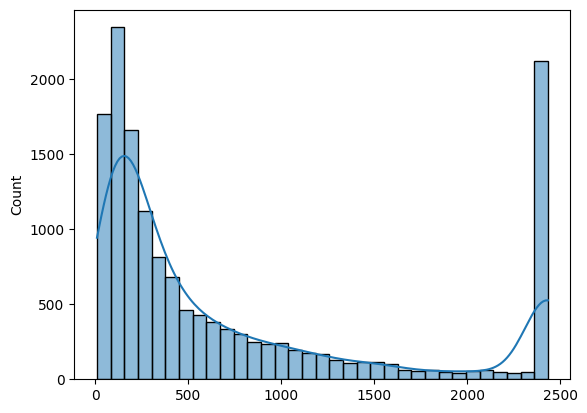

In [268]:
sns.histplot(data = data_group1,kde = True)

<Axes: ylabel='Count'>

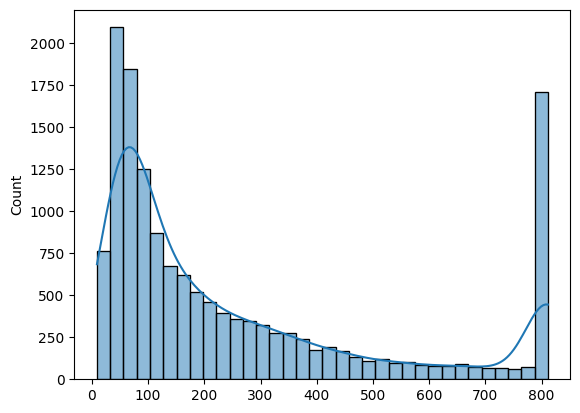

In [269]:
sns.histplot(data = data_group2,kde = True)

Above graph and shapiro test tells that data groups are not following NORMAL distribution

##### Box Cox Transformation

Lambda value used for Transformation: 0.011661865710665452


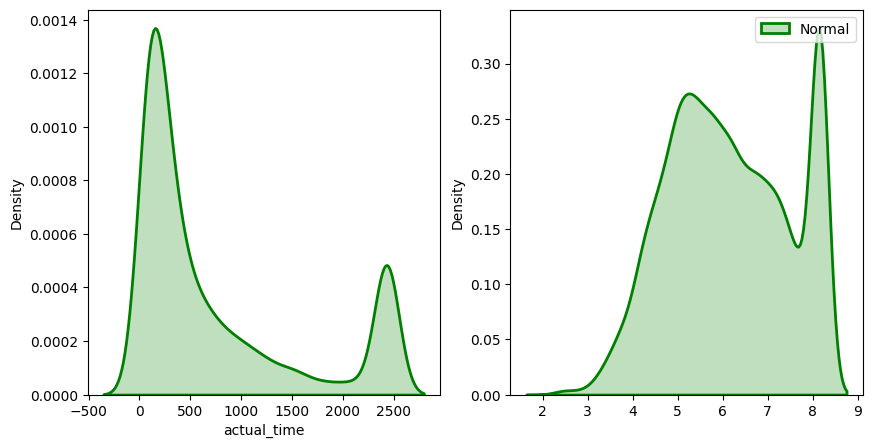

In [270]:
# generate non-normal data
original_data = trip["actual_time"]

# transform training data & save lambda value
fitted_actual_time, fitted_actual_time_lambda = boxcox(original_data)

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
			kde_kws = {'shade': True, 'linewidth': 2},
			label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fitted_actual_time, hist = False, kde = True,
			kde_kws = {'shade': True, 'linewidth': 2},
			label = "Normal", color ="green", ax = ax[1])

# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_actual_time_lambda}")


Lambda value used for Transformation: -0.0204494176331651


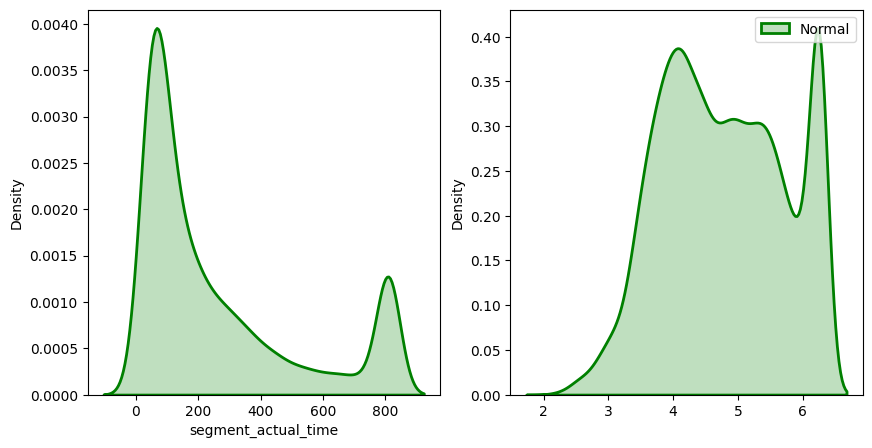

In [271]:
# generate non-normal data
original_data = trip["segment_actual_time"]

# transform training data & save lambda value
fitted_segment_actual_time, fitted_segment_actual_time_lambda = boxcox(original_data)

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
			kde_kws = {'shade': True, 'linewidth': 2},
			label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fitted_segment_actual_time, hist = False, kde = True,
			kde_kws = {'shade': True, 'linewidth': 2},
			label = "Normal", color ="green", ax = ax[1])

# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_segment_actual_time_lambda}")


In [272]:
data_group1 = fitted_actual_time
data_group2 = fitted_segment_actual_time

#### Assumption 3: `No significant outliers` in the two groups (`No outliers according to box plots after bounding`)

<Axes: >

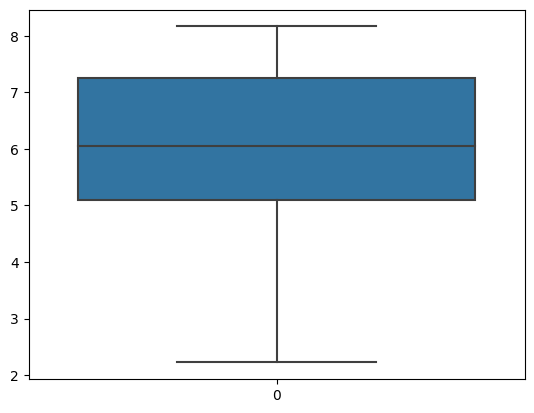

In [273]:
sns.boxplot(data_group1)

<Axes: >

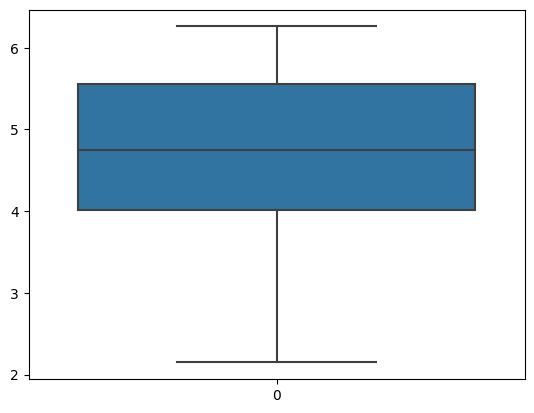

In [274]:
sns.boxplot(data_group2)

No outliers are present in both box plots

#### Assumption 4: `Equal variances` should be observed between two data groups

In [275]:
#homogeneity of variances
print("variance of actual_time",np.var(data_group1),"\nvariance of segment_actual_time", np.var(data_group2))

variance of actual_time 1.7942706805535242 
variance of segment_actual_time 0.9015998536012519


Before conducting the two-sample T-Test we need to find if the given data groups have the same variance. If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have equal variance.

##### `Levene Test`

In [276]:
levene(data_group1,data_group2)

LeveneResult(statistic=2065.7663648965936, pvalue=0.0)

p value< 0.05 indicates that data groups have un-equal variances

### Finding the p-value

In [277]:
tstat,p_val = ttest_ind(a=data_group1, b=data_group2, equal_var=False,alternative = "two-sided")

In [278]:
print("test statistic",tstat)
print("p value",p_val)

test statistic 100.65127174349226
p value 0.0


### Conclusion based on the p-value

In [279]:
if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that\n\
          There is difference between Mean of  actual_time and segment_actual_time")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis\n\
    i.e, No difference between  Mean of actual_time and segment_actual_time")


Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that
          There is difference between Mean of  actual_time and segment_actual_time


## **Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

### Visual analysis

<Axes: ylabel='Density'>

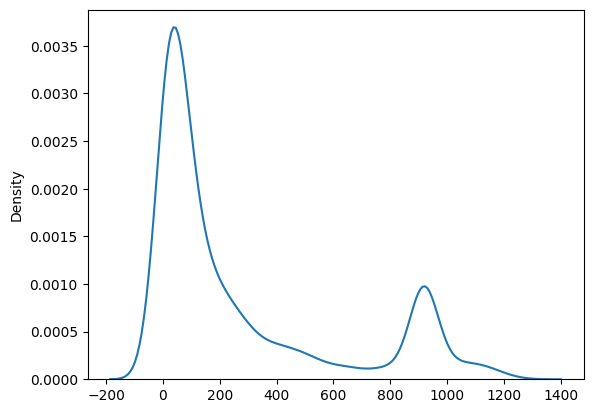

In [280]:
sns.kdeplot(data = trip["osrm_distance"]-trip["segment_osrm_distance"])

<Axes: xlabel='osrm_distance', ylabel='segment_osrm_distance'>

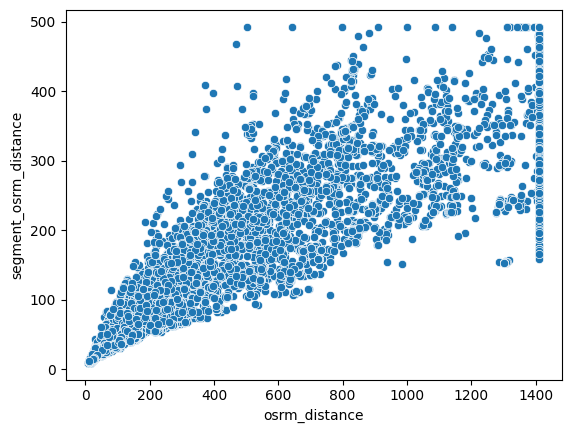

In [281]:
sns.scatterplot(data = trip, x = "osrm_distance",y ="segment_osrm_distance")

<Axes: ylabel='Density'>

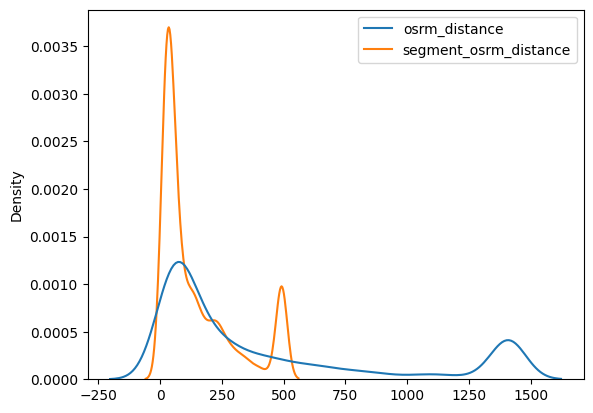

In [282]:
sns.kdeplot(data = trip[["osrm_distance","segment_osrm_distance"]])

<Axes: ylabel='Density'>

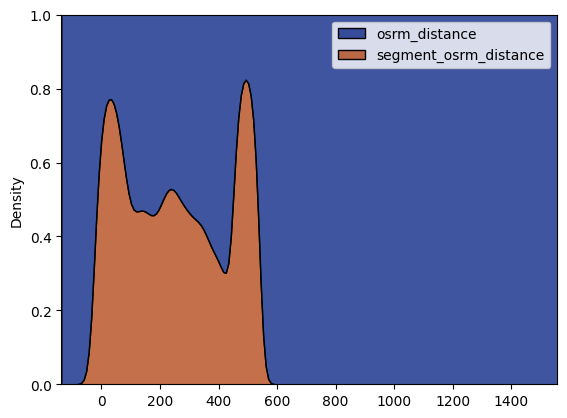

In [283]:
sns.kdeplot(data = trip[["osrm_distance","segment_osrm_distance"]],fill = True,palette="dark",multiple="fill")

Graph indicates that there is no much difference between "osrm_distance" and "segment_osrm_distance"

### Hypothesis formulation

> Null Hypothesis H0: No difference between  Mean of osrm_distance and segment_osrm_distance
\begin{align}
\mu_{osrm-distance} = \mu_{segment-osrm-distance}
\end{align}

> Alternate Hypothesis Ha: There is difference between Mean of  osrm_distance and segment_osrm_distance
\begin{align}
\mu_{osrm-distance} \ne \mu_{segment-osrm-distance}
\end{align}

> two-tailed test

> Significance level: 0.05

In [284]:
alpha = 0.05

### Selection of appropriate test

> `osrm_distance` and `segment_osrm_distance` are independent as they are gathered in different manner.

> So here two independent samples are tested. samples are numerical and continous. 

> ttest comparing means of two independent samples is required so `ttest_ind` is appropriate (2sample ttest)

### Check the test assumptions

The two-samples independent t-test assume the following characteristics about the data:

In [285]:
data_group1 = trip["osrm_distance"].values
data_group2 = trip["segment_osrm_distance"].values

#### Assumption 1: `Independence of the observations`- Each subject should belong to only one group. 

> There is no relationship between the observations in each group. (`gathered two columns in different manner, so independent`)

#### Assumption 2: Data groups should follow Normal distribution (atleast approximately)

##### `Shapiro test for normality check`

In [286]:
#Normality by shapiro test
shapiro(data_group1)

ShapiroResult(statistic=0.7446017265319824, pvalue=0.0)

In [287]:
shapiro(data_group2)

ShapiroResult(statistic=0.774498701095581, pvalue=0.0)

p = 0 indicates that distribution is not normal. So Box cox transformation may require

<Axes: ylabel='Count'>

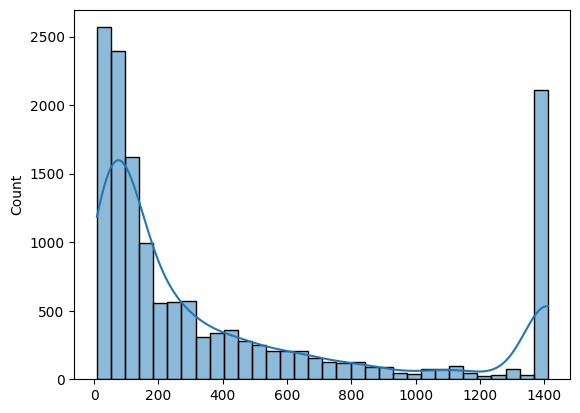

In [288]:
sns.histplot(data = data_group1,kde = True)

<Axes: ylabel='Count'>

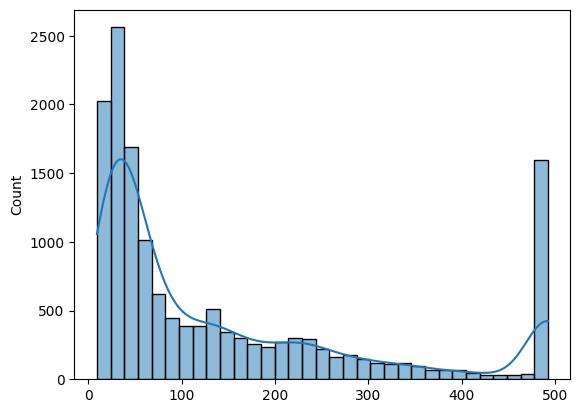

In [289]:
sns.histplot(data = data_group2,kde = True)

Above graph and shapiro test tells that data groups are not following NORMAL distribution

##### Box Cox Transformation

Lambda value used for Transformation: -0.010384880737814343


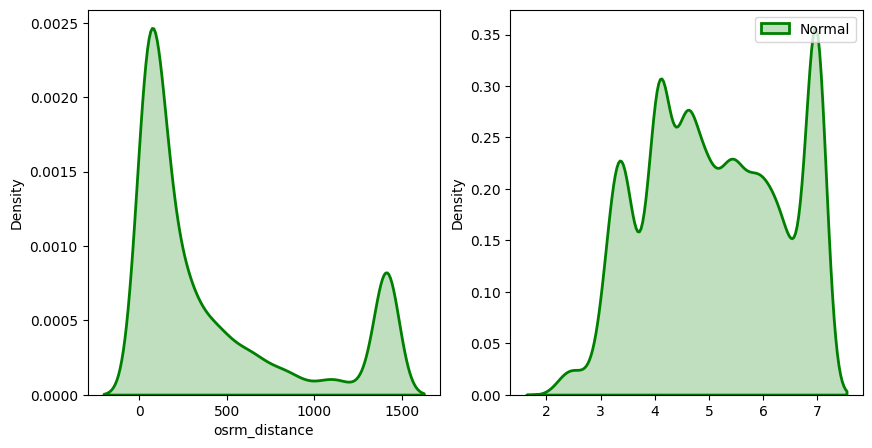

In [290]:
# generate non-normal data
original_data = trip["osrm_distance"]

# transform training data & save lambda value
fitted_osrm_distance, fitted_osrm_distance_lambda = boxcox(original_data)

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
			kde_kws = {'shade': True, 'linewidth': 2},
			label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fitted_osrm_distance, hist = False, kde = True,
			kde_kws = {'shade': True, 'linewidth': 2},
			label = "Normal", color ="green", ax = ax[1])

# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_osrm_distance_lambda}")


Lambda value used for Transformation: -0.07951251519098043


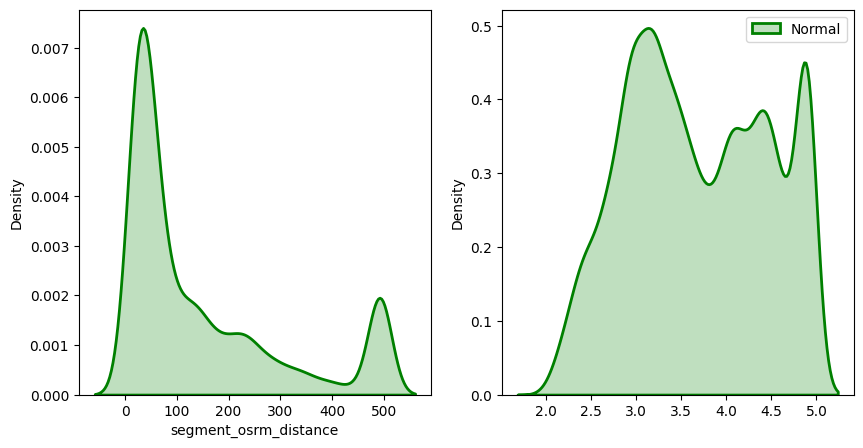

In [291]:
# generate non-normal data
original_data = trip["segment_osrm_distance"]

# transform training data & save lambda value
fitted_segment_osrm_distance, fitted_segment_osrm_distance_lambda = boxcox(original_data)

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
			kde_kws = {'shade': True, 'linewidth': 2},
			label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fitted_segment_osrm_distance, hist = False, kde = True,
			kde_kws = {'shade': True, 'linewidth': 2},
			label = "Normal", color ="green", ax = ax[1])

# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_segment_osrm_distance_lambda}")


In [292]:
data_group1 = fitted_osrm_distance
data_group2 = fitted_segment_osrm_distance

#### Assumption 3: `No significant outliers` in the two groups (`No outliers according to box plots after bounding`)

<Axes: >

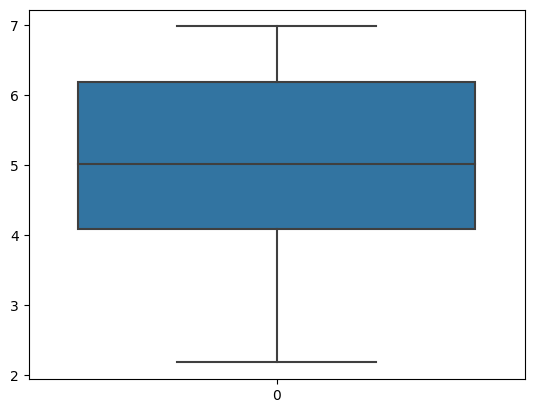

In [293]:
sns.boxplot(data_group1)

<Axes: >

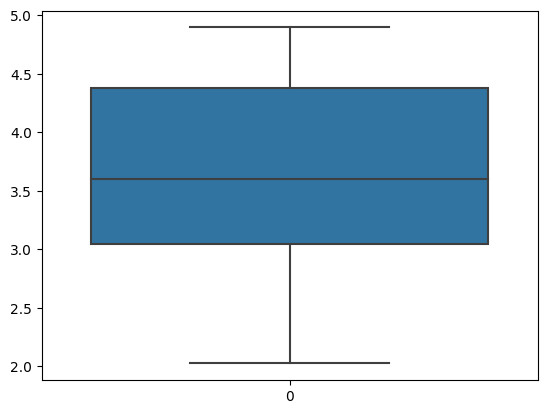

In [294]:
sns.boxplot(data_group2)

No outliers are present in both box plots

#### Assumption 4: `Equal variances` should be observed between two data groups

In [295]:
#homogeneity of variances
print("variance of osrm_distance",np.var(data_group1),"\nvariance of segment_osrm_distance", np.var(data_group2))

variance of osrm_distance 1.5789901882982178 
variance of segment_osrm_distance 0.6073281259815023


Before conducting the two-sample T-Test we need to find if the given data groups have the same variance. If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have equal variance.

##### `Levene Test`

In [296]:
levene(data_group1,data_group2)

LeveneResult(statistic=4127.760303333585, pvalue=0.0)

p value> 0.05 indicates that data groups have equal variances

### Finding the p-value

In [297]:
tstat,p_val = ttest_ind(a=data_group1, b=data_group2, equal_var=True,alternative = "two-sided")

In [298]:
print("test statistic",tstat)
print("p value",p_val)

test statistic 117.64922395212125
p value 0.0


### Conclusion based on the p-value

In [299]:
if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that\n\
          There is difference between Mean of  osrm_distance and segment_osrm_distance")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis\n\
    i.e, No difference between  Mean of osrm_distance and segment_osrm_distance")


Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that
          There is difference between Mean of  osrm_distance and segment_osrm_distance


## **Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

### Visual analysis

<Axes: ylabel='Density'>

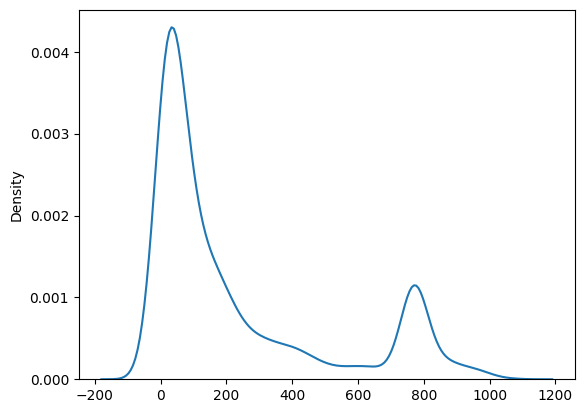

In [300]:
sns.kdeplot(data = trip["osrm_time"]-trip["segment_osrm_time"])

<Axes: xlabel='osrm_time', ylabel='segment_osrm_time'>

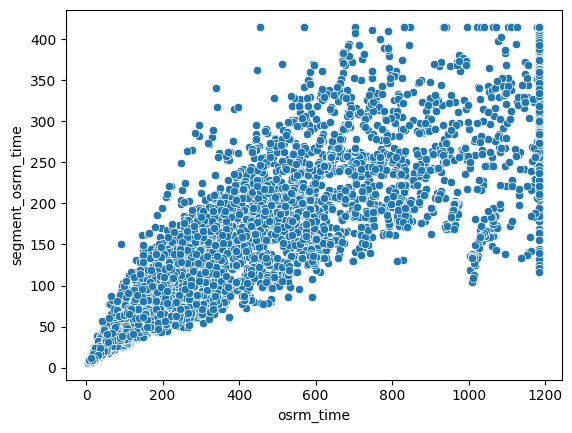

In [301]:
sns.scatterplot(data = trip, x = "osrm_time",y ="segment_osrm_time")

<Axes: ylabel='Density'>

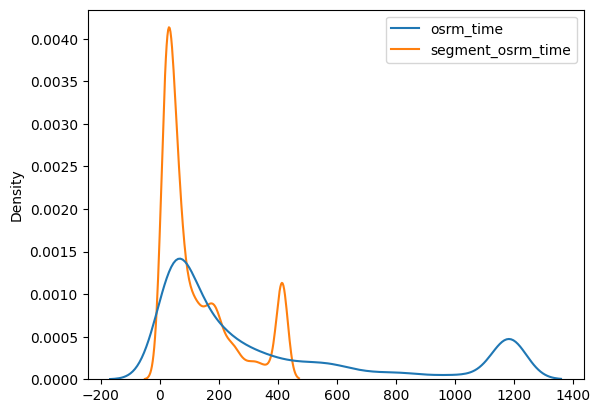

In [302]:
sns.kdeplot(data = trip[["osrm_time","segment_osrm_time"]])

<Axes: ylabel='Density'>

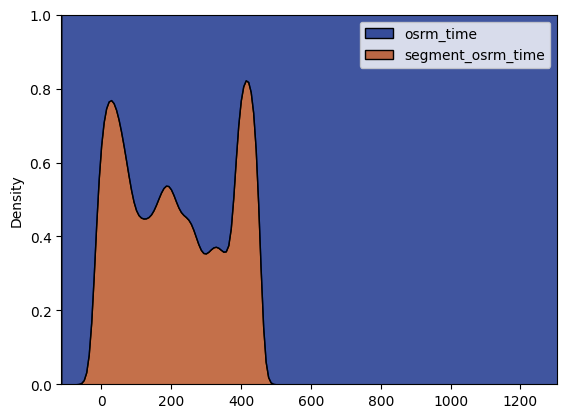

In [303]:
sns.kdeplot(data = trip[["osrm_time","segment_osrm_time"]],fill = True,palette="dark",multiple="fill")

Graph indicates that there is difference between "osrm_time" and "segment_osrm_time"

### Hypothesis formulation

> Null Hypothesis H0: No difference between  Mean of osrm_time and segment_osrm_time
\begin{align}
\mu_{osrm-time} = \mu_{segment-osrm-time}
\end{align}

> Alternate Hypothesis Ha: There is difference between Mean of  osrm_time and segment_osrm_time
\begin{align}
\mu_{osrm-time} \ne \mu_{segment-osrm-time}
\end{align}

> two-tailed test

> Significance level: 0.05

In [304]:
alpha = 0.05

### Selection of appropriate test

> `osrm_time` and `segment_osrm_time` are independent as they are gathered in different manner.

> So here two independent samples are tested. samples are numerical and continous. 

> ttest comparing means of two independent samples is required so `ttest_ind` is appropriate (2sample ttest)

### Check the test assumptions

The two-samples independent t-test assume the following characteristics about the data:

In [305]:
data_group1 = trip["osrm_time"].values
data_group2 = trip["segment_osrm_time"].values

#### Assumption 1: `Independence of the observations`- Each subject should belong to only one group. 

> There is no relationship between the observations in each group. (`gathered two columns in different manner, so independent`)

#### Assumption 2: Data groups should follow Normal distribution (atleast approximately)

##### `Shapiro test for normality check`

In [306]:
#Normality by shapiro test
shapiro(data_group1)

ShapiroResult(statistic=0.7560504078865051, pvalue=0.0)

In [307]:
shapiro(data_group2)

ShapiroResult(statistic=0.7843230962753296, pvalue=0.0)

p = 0 indicates that distribution is not normal. So Box cox transformation may require

<Axes: ylabel='Count'>

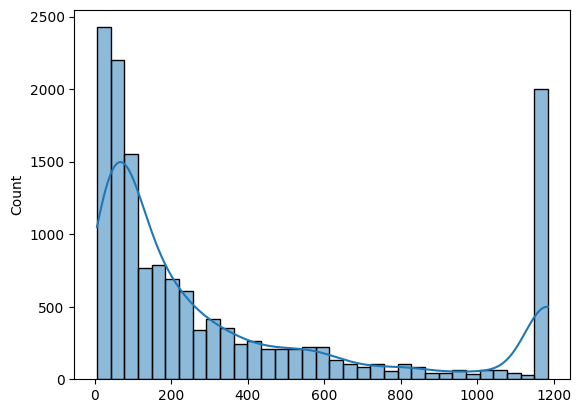

In [308]:
sns.histplot(data = data_group1,kde = True)

<Axes: ylabel='Count'>

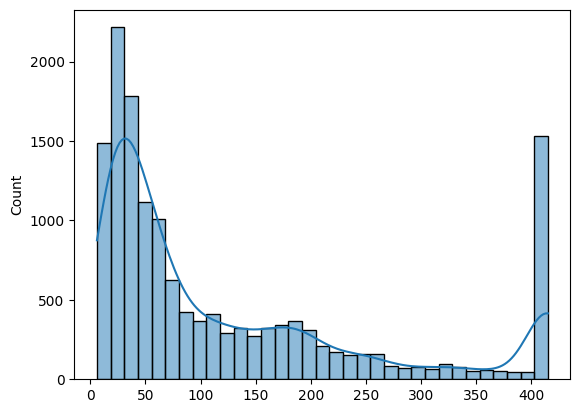

In [309]:
sns.histplot(data = data_group2,kde = True)

Above graph and shapiro test tells that data groups are not following NORMAL distribution

##### Box Cox Transformation

Lambda value used for Transformation: 0.008528277972301913


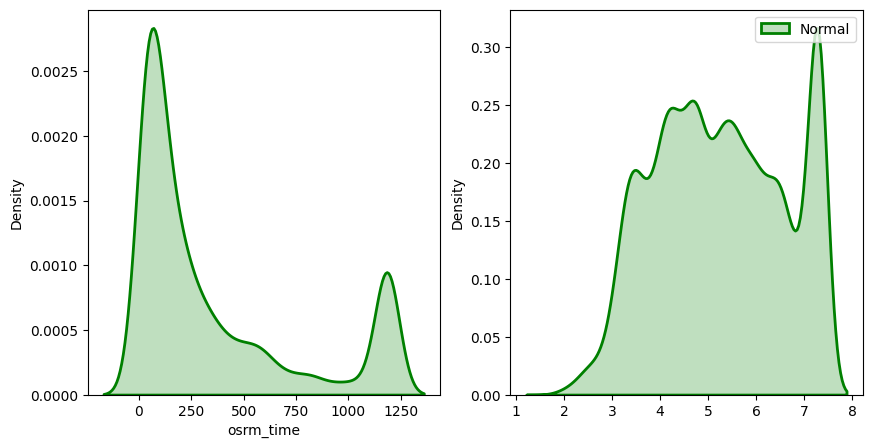

In [310]:
# generate non-normal data
original_data = trip["osrm_time"]

# transform training data & save lambda value
fitted_osrm_time, fitted_osrm_time_lambda = boxcox(original_data)

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
			kde_kws = {'shade': True, 'linewidth': 2},
			label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fitted_osrm_time, hist = False, kde = True,
			kde_kws = {'shade': True, 'linewidth': 2},
			label = "Normal", color ="green", ax = ax[1])

# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_osrm_time_lambda}")


Lambda value used for Transformation: -0.0534982654860404


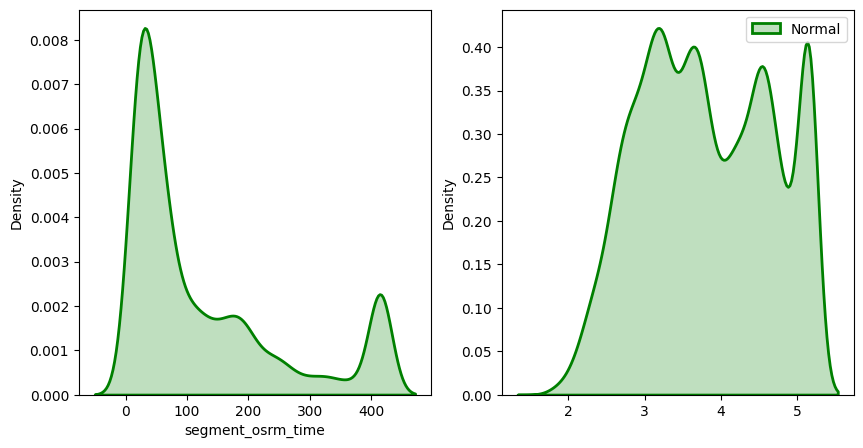

In [311]:
# generate non-normal data
original_data = trip["segment_osrm_time"]

# transform training data & save lambda value
fitted_segment_osrm_time, fitted_segment_osrm_time_lambda = boxcox(original_data)

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
			kde_kws = {'shade': True, 'linewidth': 2},
			label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fitted_segment_osrm_time, hist = False, kde = True,
			kde_kws = {'shade': True, 'linewidth': 2},
			label = "Normal", color ="green", ax = ax[1])

# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_segment_osrm_time_lambda}")


In [312]:
data_group1 = fitted_osrm_time
data_group2 = fitted_segment_osrm_time

#### Assumption 3: `No significant outliers` in the two groups (`No outliers according to box plots after bounding`)

<Axes: >

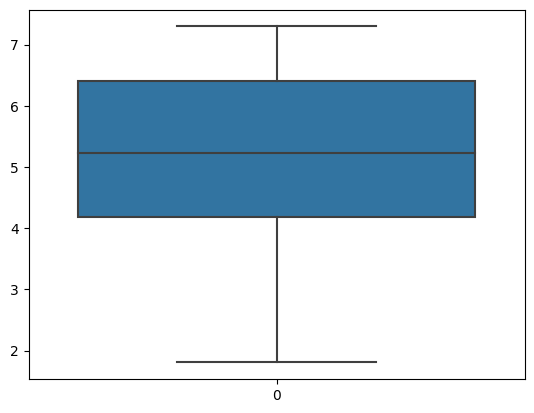

In [313]:
sns.boxplot(data_group1)

<Axes: >

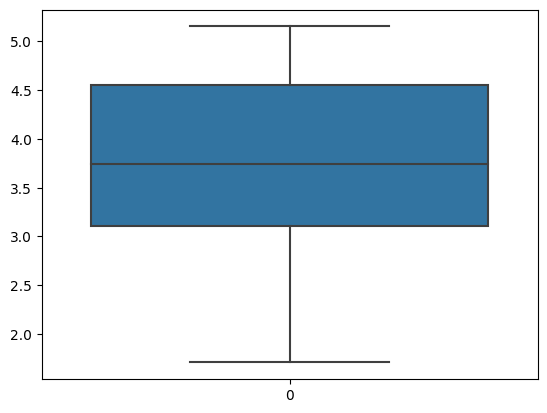

In [314]:
sns.boxplot(data_group2)

No outliers are present in both box plots

#### Assumption 4: `Equal variances` should be observed between two data groups

In [315]:
#homogeneity of variances
print("variance of osrm_time",np.var(data_group1),"\nvariance of segment_osrm_time", np.var(data_group2))

variance of osrm_time 1.8028476626407721 
variance of segment_osrm_time 0.7268752705977594


Before conducting the two-sample T-Test we need to find if the given data groups have the same variance. If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have equal variance.

##### `Levene Test`

In [316]:
levene(data_group1,data_group2)

LeveneResult(statistic=3703.8685880738626, pvalue=0.0)

p value< 0.05 indicates that data groups have un-equal variances

### Finding the p-value

In [317]:
tstat,p_val = ttest_ind(a=data_group1, b=data_group2, equal_var=False,alternative = "two-sided")

In [318]:
print("test statistic",tstat)
print("p value",p_val)

test statistic 111.25234272829276
p value 0.0


### Conclusion based on the p-value

In [319]:
if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that\n\
          There is difference between Mean of  osrm_time and segment_osrm_time")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis\n\
    i.e, No difference between  Mean of osrm_time and segment_osrm_time")


Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that
          There is difference between Mean of  osrm_time and segment_osrm_time


# CHAPTER 7: HANDLING CATEGORICAL VARIABLES

## **Do label and one-hot encoding of categorical variables (like route_type,states)**

### Can use Label encoder to  route_type encoding

In [320]:
#remove unwanted columns for encoding and standardization
trip_reduced = trip.drop(['trip_creation_time', 'route_schedule_uuid','source_center', 'source_name', 'destination_center',
       'destination_name','source_city', 'source_place', 'source_code','destination_city', 'destination_place', 'destination_code','source_city_place',
       'destination_city_place','od_start_time', 'od_end_time'],axis = 1)

In [321]:
# convert trip_uuid to category datatype
trip_reduced["trip_uuid"]=trip_reduced["trip_uuid"].str.replace('trip-',"",regex=True)
trip_reduced["trip_uuid"] = trip_reduced["trip_uuid"].astype('category')

In [322]:
# Encoding the route_type
labelencoder = LabelEncoder() 
# creating the instance
trip_reduced["route_type_cat"] = labelencoder.fit_transform(trip_reduced["route_type"])
#convert to category dtypes
trip_reduced["route_type"] = trip_reduced["route_type"].astype('category')
# get cat.codes
trip_reduced["route_type_cat"] = trip_reduced["route_type"].cat.codes
# Do onehot encoding
enc = OneHotEncoder(handle_unknown='ignore')
#create encoding dataframe
enc_df = pd.DataFrame(enc.fit_transform(trip_reduced[["route_type_cat"]]).toarray())
#merge with original df
trip_reduced = trip_reduced.join(enc_df)
#rename the merge encoders
trip_reduced.rename(columns ={0:"route_0",1:"route_1"},inplace=True)

In [323]:
#respective unique encodes
trip_reduced.groupby("route_type")["route_type_cat"].mean()

route_type
Carting    0.0
FTL        1.0
Name: route_type_cat, dtype: float64

In [324]:
#remove route type
trip_reduced = trip_reduced.drop(columns = ["route_type"])

In [325]:
trip_reduced.head()

trip_uuid  start_scan_to_end_scan  actual_distance_to_destination  \
0  153671041653548748                  6426.0                     1077.146338   
1  153671042288605164                   906.0                      240.208306   
2  153671043369099517                  6426.0                     1077.146338   
3  153671046011330457                   200.0                       28.529648   
4  153671052974046625                  1586.0                      239.007304   

   actual_time  osrm_time  osrm_distance  segment_actual_time  \
0       2434.5    1184.75    1411.435175                811.0   
1        399.0     210.00     269.430800                141.0   
2       2434.5    1184.75    1411.435175                811.0   
3         82.0      24.00      31.647500                 59.0   
4        556.0     207.00     266.291400                340.0   

   segment_osrm_distance  segment_osrm_time    source_state destination_state  \
0             492.533225              415.0  Madhya Pradesh           Haryana   
1              84.189400               65.0       Karnataka         Karnataka   
2             492.533225              415.0       Karnataka            Punjab   
3              19.876600               16.0     Maharashtra       Maharashtra   
4             146.791900              115.0       Karnataka         Karnataka   

  trip_year trip_month trip_day        trip_time trip_hour trip_week  \
0      2018          9       12  00:00:16.535741         0        37   
1      2018          9       12  00:00:22.886430         0        37   
2      2018          9       12  00:00:33.691250         0        37   
3      2018          9       12  00:01:00.113710         0        37   
4      2018          9       12  00:02:09.740725         0        37   

  trip_day_of_week  od_start_to_end  diff_actual&osrm_time  \
0                2      6445.853574                1249.75   
1                2       913.174079                 189.00   
2                2      6445.853574                1249.75   
3                2       200.989870                  58.00   
4                2      1588.710998                 349.00   

   diff_actual&osrm_distance  route_type_cat  route_0  route_1  
0                -334.288837               1      0.0      1.0  
1                 -29.222494               0      1.0      0.0  
2                -334.288837               1      0.0      1.0  
3                  -3.117852               0      1.0      0.0  
4                 -27.284096               1      0.0      1.0

### Can use dummy encoding for states as well as route type

In [326]:
#remove unwanted columns for encoding and standardization
trip_reduced = trip.drop(['trip_creation_time', 'route_schedule_uuid','source_center', 'source_name', 'destination_center',
       'destination_name','source_city', 'source_place', 'source_code','destination_city', 'destination_place', 'destination_code','source_city_place',
       'destination_city_place','od_start_time', 'od_end_time'],axis = 1)

In [327]:
# convert trip_uuid to category datatype
trip_reduced["trip_uuid"]=trip_reduced["trip_uuid"].str.replace('trip-',"",regex=True)
trip_reduced["trip_uuid"] = trip_reduced["trip_uuid"].astype('category')

In [328]:
categorical_cols = ["route_type","source_state","destination_state"]

trip_dummy_encoded = pd.get_dummies(trip_reduced, columns=categorical_cols)

In [329]:
trip_dummy_encoded.head()

trip_uuid  start_scan_to_end_scan  actual_distance_to_destination  \
0  153671041653548748                  6426.0                     1077.146338   
1  153671042288605164                   906.0                      240.208306   
2  153671043369099517                  6426.0                     1077.146338   
3  153671046011330457                   200.0                       28.529648   
4  153671052974046625                  1586.0                      239.007304   

   actual_time  osrm_time  osrm_distance  segment_actual_time  \
0       2434.5    1184.75    1411.435175                811.0   
1        399.0     210.00     269.430800                141.0   
2       2434.5    1184.75    1411.435175                811.0   
3         82.0      24.00      31.647500                 59.0   
4        556.0     207.00     266.291400                340.0   

   segment_osrm_distance  segment_osrm_time trip_year trip_month trip_day  \
0             492.533225              415.0      2018          9       12   
1              84.189400               65.0      2018          9       12   
2             492.533225              415.0      2018          9       12   
3              19.876600               16.0      2018          9       12   
4             146.791900              115.0      2018          9       12   

         trip_time trip_hour trip_week trip_day_of_week  od_start_to_end  \
0  00:00:16.535741         0        37                2      6445.853574   
1  00:00:22.886430         0        37                2       913.174079   
2  00:00:33.691250         0        37                2      6445.853574   
3  00:01:00.113710         0        37                2       200.989870   
4  00:02:09.740725         0        37                2      1588.710998   

   diff_actual&osrm_time  diff_actual&osrm_distance  route_type_Carting  \
0                1249.75                -334.288837                   0   
1                 189.00                 -29.222494                   1   
2                1249.75                -334.288837                   0   
3                  58.00                  -3.117852                   1   
4                 349.00                 -27.284096                   0   

   route_type_FTL  source_state_Andhra Pradesh  \
0               1                            0   
1               0                            0   
2               1                            0   
3               0                            0   
4               1                            0   

   source_state_Arunachal Pradesh  source_state_Assam  source_state_Bihar  \
0                               0                   0                   0   
1                               0                   0                   0   
2                               0                   0                   0   
3                               0                   0                   0   
4                               0                   0                   0   

   source_state_Chandigarh  source_state_Chhattisgarh  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   source_state_Dadra and Nagar Haveli  source_state_Delhi  source_state_Goa  \
0                                    0                   0                 0   
1                                    0                   0                 0   
2                                    0                   0                 0   
3                                    0                   0                 0   
4                                    0                   0                 0   

   source_state_Gujarat  source_state_Haryana  source_state_Himachal Pradesh  \
0                     0                     0                              0   
1              

# CHAPTER 8: COLUMN NORMALIZATION / COLUMN STANDARDIZATION

## **Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.**

In [330]:
num_cols

['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'od_start_to_end']

In [331]:
trip_dummy_encoded[trip_dummy_encoded.select_dtypes("object").columns]=trip_dummy_encoded[trip_dummy_encoded.select_dtypes("object").columns].astype("category")

In [332]:
trip_dummy_encoded.select_dtypes("object").columns

Index([], dtype='object')

In [333]:
scaler = StandardScaler()
scaler.fit(trip_dummy_encoded[num_cols])

StandardScaler()

In [334]:
trip_dummy_encoded[num_cols] = scaler.transform(trip_dummy_encoded[num_cols])

In [335]:
trip_dummy_encoded.head()

trip_uuid  start_scan_to_end_scan  actual_distance_to_destination  \
0  153671041653548748                2.053505                        2.026268   
1  153671042288605164               -0.499871                       -0.225054   
2  153671043369099517                2.053505                        2.026268   
3  153671046011330457               -0.826444                       -0.794459   
4  153671052974046625               -0.185325                       -0.228284   

   actual_time  osrm_time  osrm_distance  segment_actual_time  \
0     2.048228   2.095603       2.062086             2.141970   
1    -0.420272  -0.360525      -0.306451            -0.462704   
2     2.048228   2.095603       2.062086             2.141970   
3    -0.804706  -0.829198      -0.799618            -0.781485   
4    -0.229875  -0.368084      -0.312962             0.310923   

   segment_osrm_distance  segment_osrm_time trip_year trip_month trip_day  \
0               2.254747           2.259726      2018          9       12   
1              -0.401315          -0.473161      2018          9       12   
2               2.254747           2.259726      2018          9       12   
3              -0.819635          -0.855766      2018          9       12   
4               0.005882          -0.082749      2018          9       12   

         trip_time trip_hour trip_week trip_day_of_week  od_start_to_end  \
0  00:00:16.535741         0        37                2         2.054949   
1  00:00:22.886430         0        37                2        -0.497666   
2  00:00:33.691250         0        37                2         2.054949   
3  00:01:00.113710         0        37                2        -0.826246   
4  00:02:09.740725         0        37                2        -0.185993   

   diff_actual&osrm_time  diff_actual&osrm_distance  route_type_Carting  \
0                1249.75                -334.288837                   0   
1                 189.00                 -29.222494                   1   
2                1249.75                -334.288837                   0   
3                  58.00                  -3.117852                   1   
4                 349.00                 -27.284096                   0   

   route_type_FTL  source_state_Andhra Pradesh  \
0               1                            0   
1               0                            0   
2               1                            0   
3               0                            0   
4               1                            0   

   source_state_Arunachal Pradesh  source_state_Assam  source_state_Bihar  \
0                               0                   0                   0   
1                               0                   0                   0   
2                               0                   0                   0   
3                               0                   0                   0   
4                               0                   0                   0   

   source_state_Chandigarh  source_state_Chhattisgarh  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   source_state_Dadra and Nagar Haveli  source_state_Delhi  source_state_Goa  \
0                                    0                   0                 0   
1                                    0                   0                 0   
2                                    0                   0                 0   
3                                    0                   0                 0   
4                                    0                   0                 0   

   source_state_Gujarat  source_state_Haryana  source_state_Himachal Pradesh  \
0                     0                     0                              0   
1              

In [336]:
trip_dummy_encoded.describe(include = "all")

trip_uuid  start_scan_to_end_scan  \
count                14787            1.478700e+04   
unique               14787                     NaN   
top     153671041653548748                     NaN   
freq                     1                     NaN   
mean                   NaN           -6.535052e-17   
std                    NaN            1.000034e+00   
min                    NaN           -9.069307e-01   
25%                    NaN           -7.311548e-01   
50%                    NaN           -4.656408e-01   
75%                    NaN            3.827090e-01   
max                    NaN            2.053505e+00   

        actual_distance_to_destination   actual_time     osrm_time  \
count                     1.478700e+04  1.478700e+04  1.478700e+04   
unique                             NaN           NaN           NaN   
top                                NaN           NaN           NaN   
freq                               NaN           NaN           NaN   
mean                     -6.150637e-17 -7.688296e-17 -9.610370e-17   
std                       1.000034e+00  1.000034e+00  1.000034e+00   
min                      -8.469861e-01 -8.932347e-01 -8.745539e-01   
25%                      -7.378342e-01 -7.319424e-01 -7.359676e-01   
50%                      -5.109276e-01 -4.845467e-01 -4.688740e-01   
75%                       3.678066e-01  3.801257e-01  3.966605e-01   
max                       2.026268e+00  2.048228e+00  2.095603e+00   

        osrm_distance  segment_actual_time  segment_osrm_distance  \
count    1.478700e+04         1.478700e+04           1.478700e+04   
unique            NaN                  NaN                    NaN   
top               NaN                  NaN                    NaN   
freq              NaN                  NaN                    NaN   
mean    -8.072711e-17        -1.326231e-16          -1.287790e-16   
std      1.000034e+00         1.000034e+00           1.000034e+00   
min     -8.464379e-01        -9.758633e-01          -8.899078e-01   
25%     -7.291260e-01        -7.542717e-01          -7.370140e-01   
50%     -5.066860e-01        -4.393783e-01          -4.950128e-01   
75%      3.873589e-01         4.042250e-01           4.596904e-01   
max      2.062086e+00         2.141970e+00           2.254747e+00   

        segment_osrm_time  trip_year  trip_month  trip_day        trip_time  \
count        1.478700e+04    14787.0     14787.0   14787.0            14787   
unique                NaN        1.0         2.0      22.0            14787   
top                   NaN     2018.0         9.0      18.0  00:00:03.999520   
freq                  NaN    14787.0     13011.0     791.0                1   
mean        -7.496089e-17        NaN         NaN       NaN              NaN   
std          1.000034e+00        NaN         NaN       NaN              NaN   
min         -9.338480e-01        NaN         NaN       NaN              NaN   
25%         -7.464500e-01        NaN         NaN       NaN              NaN   
50%         -4.731613e-01        NaN         NaN       NaN              NaN   
75%          4.560203e-01        NaN         NaN       NaN              NaN   
max          2.259726e+00        NaN         NaN       NaN              NaN   

        trip_hour  trip_week  trip_day_of_week  od_start_to_end  \
count     14787.0    14787.0           14787.0     1.478700e+04   
unique       24.0        4.0               7.0              NaN   
top          22.0       38.0               2.0              NaN   
freq       1123.0     5001.0            2731.0              NaN   
mean          NaN        NaN               NaN    -6.535052e-17   
std           NaN        NaN               NaN     1.000034e+00   
min           NaN        NaN               NaN    -9.067512e-01   
25%           NaN        NaN               NaN    -7.307523e-01   
50%           NaN        NaN               NaN    -4.655021e-01   
75%           NaN        NaN               NaN     3.835283e-01   
max         

# CHAPTER 9: BUSINESS INSIGHTS

OBSERVATIONS:

> 14787 trips are registered in 2018 between september and october.

> In spearman Correlation is best fit for the data

> FTL has more effectiveness than Carting. It is better to prefer FTL route_type

> Maharastra, Karnataka and Haryana are TOP 3 States in the frequency of orders according to both sources and destinations. Busiest states

> Bengaluru, Gurgaon, Mumbai are TOP 3 Cities in the frequency of orders according to both sources and destinations. Busiest cities

> Gurgaon_Bilaspur, Bhiwandi_Mankoli, Bengaluru_Nelmngle are TOP 3 City_places in the frequency of orders according to both sources and destinations. Busiest places

> During Afternoons, Less number of orders are observed

> Day 2 : Monday has little spike in number of orders

> No difference between  Mean of od_start_to_end and Start_scan_to_end_scan

> There is difference between Mean of  actual_time and osrm_time

> There is difference between Mean of  actual_time and segment_actual_time

> There is difference between Mean of  osrm_distance and segment_osrm_distance

>  There is difference between Mean of  osrm_time and segment_osrm_time

> Final data set is good fit for Machine learnining applications

# CHAPTER 10: RECOMMENDATIONS

> Facilities, Infrastructure should be improved in Maharastra, Karnataka and Haryana states as they are Busiest.

> Facilities, Infrastructure should be improved in Bengaluru, Gurgaon, Mumbai cities as they are Busiest.

> Facilities, Infrastructure should be improved in Gurgaon_Bilaspur, Bhiwandi_Mankoli, Bengaluru_Nelmngle city_places as they are Busiest.

> More work force is needed during mornings and evenings of MONDAY

> Should plan for FTL infrastructure

> osrm machine should be updated such that it is well sync with actual time.

> segment data and actual data has mis-match. Should identify the faults and modify them.